# DISSERTATION - Data Driven Energy Cost Minimisation Based On Smart Meter Data Analytics

# Smart Meter Preprocessing

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [3]:
#Loading in the data
CentreCity0SMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Centre City.xlsx')
CentreCity1SMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Centre City.1.xlsx')
CitylabsSMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Citylabs 1.xlsx')
FaradaySMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Faraday.xlsx')
iCentrumSMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Icentrum.xlsx')
Mclaren0SMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Mclaren.xlsx')
Mclaren1SMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Mclaren.1.xlsx')
Mclaren3SMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Mclaren.3.xlsx')
BuildingInfoData= pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Physical Building Data/Building Information.xlsx')
OccupancyData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Occupancy Data/Inventory Changes Over Time - 2022.xlsx')
ManchesterWeatherData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Weather Data/Manchester Airport.xlsx')
BirminghamWeatherData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Weather Data/Birmingham Airport.xlsx')


C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2888638967.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  iCentrumSMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Icentrum.xlsx')
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2888638967.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  Mclaren0SMData = pd.read_excel('C:/Users/natha/OneDrive/Documents/NATHAN WORK/MSc Data Science/Dissertation/Data/Smart Meter Data/Mclaren.xlsx')


In [4]:
print("CentreCity0SMData:")
print(CentreCity0SMData.info())
print("CentreCity1SMData:")
print(CentreCity1SMData.info())
print("\nCitylabsSMData:")
print(CitylabsSMData.info())
print("\nFaradaySMData:")
print(FaradaySMData.info())
print("\niCentrumSMData:")
print(iCentrumSMData.info())
print("\nMclaren0SMData:")
print(Mclaren0SMData.info())
print("\nMclaren1SMData:")
print(Mclaren1SMData.info())
print("\nMclaren3SMData:")
print(Mclaren3SMData.info())

CentreCity0SMData:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Site    365 non-null    object 
 1   MPAN    365 non-null    int64  
 2   Date    365 non-null    object 
 3   00:00   365 non-null    float64
 4   00:30   365 non-null    float64
 5   01:00   365 non-null    float64
 6   01:30   365 non-null    float64
 7   02:00   365 non-null    float64
 8   02:30   365 non-null    float64
 9   03:00   365 non-null    float64
 10  03:30   365 non-null    float64
 11  04:00   365 non-null    float64
 12  04:30   365 non-null    float64
 13  05:00   365 non-null    float64
 14  05:30   365 non-null    float64
 15  06:00   365 non-null    float64
 16  06:30   365 non-null    float64
 17  07:00   365 non-null    float64
 18  07:30   365 non-null    float64
 19  08:00   365 non-null    float64
 20  08:30   365 non-null    float64
 21  09:00   365 non-null

In [5]:
#Adding day of the week

dfs_list = [CentreCity0SMData, CentreCity1SMData, CitylabsSMData, FaradaySMData, iCentrumSMData, Mclaren0SMData, Mclaren1SMData, Mclaren3SMData]
dfs_names = ['CentreCity0SMData', 'CentreCity1SMData', 'CitylabsSMData', 'FaradaySMData', 'iCentrumSMData', 'Mclaren0SMData', 'Mclaren1SMData', 'Mclaren3SMData']

#Iterate over the dataframes
for i in range(len(dfs_list)):
    #Convert the 'Date' column to datetime format
    dfs_list[i]['Date'] = pd.to_datetime(dfs_list[i]['Date'])

    #Creating DayOfWeek which contains the day of the week
    dfs_list[i]['DayOfWeek'] = dfs_list[i]['Date'].dt.day_name()
    dfs_list[i] = dfs_list[i][['Site', 'Date', 'DayOfWeek'] + [col for col in dfs_list[i].columns if col not in ['Site', 'Date', 'DayOfWeek']]]

#Assign the modified dataframes back to their original variables
CentreCity0SMData, CentreCity1SMData, CitylabsSMData, FaradaySMData, iCentrumSMData, Mclaren0SMData, Mclaren1SMData, Mclaren3SMData = dfs_list


In [6]:
print(CentreCity1SMData.columns)

Index([     'Site',      'Date', 'DayOfWeek',      'MPAN',     '00:00',
           '00:30',     '01:00',    01:30:00,     '02:00',     '02:30',
           '03:00',     '03:30',     '04:00',     '04:30',     '05:00',
           '05:30',     '06:00',     '06:30',     '07:00',     '07:30',
           '08:00',     '08:30',     '09:00',     '09:30',     '10:00',
           '10:30',     '11:00',     '11:30',     '12:00',     '12:30',
           '13:00',     '13:30',     '14:00',     '14:30',     '15:00',
           '15:30',     '16:00',     '16:30',     '17:00',     '17:30',
           '18:00',     '18:30',     '19:00',     '19:30',     '20:00',
           '20:30',     '21:00',     '21:30',     '22:00',     '22:30',
           '23:00',     '23:30',      'SP49',      'SP50',     'Total'],
      dtype='object')


In [7]:
#Fixing the 01:30:00 column in CentreCity1SMData
CentreCity1SMData.columns = CentreCity1SMData.columns.astype(str)
CentreCity1SMData = CentreCity1SMData.rename(columns={'01:30:00': '01:30'})
print(CentreCity1SMData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Site       365 non-null    object        
 1   Date       365 non-null    datetime64[ns]
 2   DayOfWeek  365 non-null    object        
 3   MPAN       365 non-null    int64         
 4   00:00      365 non-null    float64       
 5   00:30      365 non-null    float64       
 6   01:00      365 non-null    float64       
 7   01:30      365 non-null    float64       
 8   02:00      365 non-null    float64       
 9   02:30      365 non-null    float64       
 10  03:00      365 non-null    float64       
 11  03:30      365 non-null    float64       
 12  04:00      365 non-null    float64       
 13  04:30      365 non-null    float64       
 14  05:00      365 non-null    float64       
 15  05:30      365 non-null    float64       
 16  06:00      365 non-null    float64       
 1

In [8]:
#Checking for missing values
print("CentreCity0SMData missing values:")
print(CentreCity0SMData.isnull().sum())
print("CentreCity1SMData missing values:")
print(CentreCity1SMData.isnull().sum())
print("\nCitylabsSMData missing values:")
print(CitylabsSMData.isnull().sum())
print("\nFaradaySMData missing values:")
print(FaradaySMData.isnull().sum())
print("\niCentrumSMData missing values:")
print(iCentrumSMData.isnull().sum())
print("\nMclaren0SMData missing values:")
print(Mclaren0SMData.isnull().sum())
print("\nMclaren1SMData missing values:")
print(Mclaren1SMData.isnull().sum())
print("\nMclaren3SMData missing values:")
print(Mclaren3SMData.isnull().sum())

CentreCity0SMData missing values:
Site           0
Date           0
DayOfWeek      0
MPAN           0
00:00          0
00:30          0
01:00          0
01:30          0
02:00          0
02:30          0
03:00          0
03:30          0
04:00          0
04:30          0
05:00          0
05:30          0
06:00          0
06:30          0
07:00          0
07:30          0
08:00          0
08:30          0
09:00          0
09:30          0
10:00          0
10:30          0
11:00          0
11:30          0
12:00          0
12:30          0
13:00          0
13:30          0
14:00          0
14:30          0
15:00          0
15:30          0
16:00          0
16:30          0
17:00          0
17:30          0
18:00          0
18:30          0
19:00          0
19:30          0
20:00          0
20:30          0
21:00          0
21:30          0
22:00          0
22:30          0
23:00          1
23:30          1
SP49         364
SP50         364
Total          0
dtype: int64
CentreCity1SMData 

In [9]:
#Maclaren1SMData has missing values
missing_00_00_row = Mclaren1SMData[Mclaren1SMData['00:00'].isnull()]
print(missing_00_00_row)
#An entire row is missing

       Site       Date DayOfWeek           MPAN  00:00  00:30  01:00  01:30  \
16  Mclaren 2022-01-17    Monday  1422743100004    NaN    NaN    NaN    NaN   

    02:00  02:30  ...  20:30  21:00  21:30  22:00  22:30  23:00  23:30  SP49  \
16    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   

    SP50  Total  
16   NaN    NaN  

[1 rows x 55 columns]


In [10]:
#Now we want to check for zeros
print("CentreCity0SMData zeros:")
print((CentreCity0SMData == 0).sum())
print("CentreCity1SMData zeros:")
print((CentreCity1SMData == 0).sum())
print("\nCitylabsSMData zeros:")
print((CitylabsSMData == 0).sum())
print("\nFaradaySMData zeros:")
print((FaradaySMData == 0).sum())
print("\niCentrumSMData zeros:")
print((iCentrumSMData == 0).sum())
print("\nMclaren0SMData zeros:")
print((Mclaren0SMData == 0).sum())
print("\nMclaren1SMData zeros:")
print((Mclaren1SMData == 0).sum())
print("\nMclaren3SMData zeros:")
print((Mclaren3SMData == 0).sum())

CentreCity0SMData zeros:
Site         0
Date         0
DayOfWeek    0
MPAN         0
00:00        0
00:30        1
01:00        0
01:30        7
02:00        0
02:30        0
03:00        0
03:30        0
04:00        0
04:30        0
05:00        0
05:30        0
06:00        0
06:30        0
07:00        0
07:30        0
08:00        0
08:30        0
09:00        0
09:30        0
10:00        0
10:30        0
11:00        0
11:30        0
12:00        0
12:30        0
13:00        0
13:30        0
14:00        0
14:30        0
15:00        0
15:30        0
16:00        0
16:30        0
17:00        1
17:30        1
18:00        1
18:30        1
19:00        1
19:30        0
20:00        0
20:30        0
21:00        0
21:30        0
22:00        0
22:30        0
23:00        0
23:30        0
SP49         0
SP50         0
Total        0
dtype: int64
CentreCity1SMData zeros:
Site         0
Date         0
DayOfWeek    0
MPAN         0
00:00        0
00:30        0
01:00        0
01:30  

In [11]:
#Zeros in:
#CC0 00:30, 01:30 (multiple), 17:00, 17:30, 18:00, 18:30, 19:00
#CC1 09:00 - 13:00 (2 each), 13:30
#iCentrum - 08:30 (1), many between 09:30 and 16:30
#Mc0 11:00
#Mc3 - 02:30

In [12]:
rows_with_zeros = iCentrumSMData[iCentrumSMData.eq(0).any(axis=1)]
rows_with_zeros

Site       Date  DayOfWeek           MPAN  00:00  00:30  01:00  \
77   Icentrum 2022-03-19   Saturday  2600000982183   17.0   17.3   17.4   
78   Icentrum 2022-03-20     Sunday  2600000982183   16.5   16.5   17.1   
84   Icentrum 2022-03-26   Saturday  2600000982183   14.9   14.9   15.1   
99   Icentrum 2022-04-10     Sunday  2600000982183   18.7   18.4   18.5   
104  Icentrum 2022-04-15     Friday  2600000982183   10.7   10.6   10.6   
105  Icentrum 2022-04-16   Saturday  2600000982183   10.6   10.6   10.7   
106  Icentrum 2022-04-17     Sunday  2600000982183   10.6   10.6   10.9   
107  Icentrum 2022-04-18     Monday  2600000982183   10.4   10.5   10.3   
119  Icentrum 2022-04-30   Saturday  2600000982183   13.2   12.8   12.9   
127  Icentrum 2022-05-08     Sunday  2600000982183   12.7   12.4   12.3   
133  Icentrum 2022-05-14   Saturday  2600000982183   11.4   11.5   11.4   
134  Icentrum 2022-05-15     Sunday  2600000982183   10.5    9.7   10.3   
140  Icentrum 2022-05-21   Saturday  2600000982183    9.9    8.7    8.4   
141  Icentrum 2022-05-22     Sunday  2600000982183   11.6   11.0    9.9   
146  Icentrum 2022-05-27     Friday  2600000982183   12.7   13.5   12.8   
152  Icentrum 2022-06-02   Thursday  2600000982183   11.2   11.7   11.3   
153  Icentrum 2022-06-03     Friday  2600000982183   11.6   11.9   11.6   
154  Icentrum 2022-06-04   Saturday  2600000982183   11.1   11.0   11.0   
161  Icentrum 2022-06-11   Saturday  2600000982183   10.3   10.4   10.1   
162  Icentrum 2022-06-12     Sunday  2600000982183    9.1    9.3    9.2   
175  Icentrum 2022-06-25   Saturday  2600000982183    9.7    9.6    9.8   
176  Icentrum 2022-06-26     Sunday  2600000982183   10.0    9.9    9.9   
182  Icentrum 2022-07-02   Saturday  2600000982183   11.0   11.0   11.0   
183  Icentrum 2022-07-03     Sunday  2600000982183   10.3   10.2   10.1   
189  Icentrum 2022-07-09   Saturday  2600000982183   11.0   11.0   10.7   
190  Icentrum 2022-07-10     Sunday  2600000982183   10.9   11.0   10.8   
193  Icentrum 2022-07-13  Wednesday  2600000982183   11.2   11.4   11.3   
196  Icentrum 2022-07-16   Saturday  2600000982183   10.2   10.2   10.3   
197  Icentrum 2022-07-17     Sunday  2600000982183   10.3   10.2   10.4   
198  Icentrum 2022-07-18     Monday  2600000982183   10.3   10.2   10.4   
199  Icentrum 2022-07-19    Tuesday  2600000982183   11.4   11.5   11.7   
203  Icentrum 2022-07-23   Saturday  2600000982183   10.4   10.8   10.6   
211  Icentrum 2022-07-31     Sunday  2600000982183   11.3   11.3   11.3   
217  Icentrum 2022-08-06   Saturday  2600000982183   11.0   11.7   11.6   
218  Icentrum 2022-08-07     Sunday  2600000982183   12.0   10.9   11.0   
223  Icentrum 2022-08-12     Friday  2600000982183   12.4   11.5   11.1   
224  Icentrum 2022-08-13   Saturday  2600000982183   10.8   10.9   10.8   
225  Icentrum 2022-08-14     Sunday  2600000982183   10.6   10.9   10.8   
231  Icentrum 2022-08-20   Saturday  2600000982183   10.6   10.6   10.3   
232  Icentrum 2022-08-21     Sunday  2600000982183   12.8   12.4   10.9   
238  Icentrum 2022-08-27   Saturday  2600000982183    9.2    9.2    9.3   
239  Icentrum 2022-08-28     Sunday  2600000982183    9.3    9.1    9.0   
245  Icentrum 2022-09-03   Saturday  2600000982183   10.0    9.8    9.8   
246  Icentrum 2022-09-04     Sunday  2600000982183    9.9    9.6    9.8   
259  Icentrum 2022-09-17   Saturday  2600000982183   13.5   13.1   13.3   
266  Icentrum 2022-09-24   Saturday  2600000982183    8.7    8.7    8.9   
267  Icentrum 2022-09-25     Sunday  2600000982183    9.9   10.1   10.1   

     01:30  02:00  02:30  ...  20:30  21:00  21:30  22:00  22:30  23:00  \
77    16.4   16.8   16.6  ...   16.7   16.7   16.5   16.8   17.3   16.8   
78    16.7   16.8   17.4  ...   18.5   18.2   16.8   16.8   17.6   16.4   
84    15.5   15.4   15.3  ...   14.5   14.9   14.6   14.8   14.9   15.0   
99    18.7   18.4   18.8  ...   17.5   17.6   18.9   17.4   17.3   17.4   
104   10.5   10.5   10.5  ...   1

In [13]:
#Dealing with 0 and NaN values
import numpy as np

dfs_list = [
    CentreCity0SMData, CentreCity1SMData, CitylabsSMData, FaradaySMData, 
    iCentrumSMData, Mclaren0SMData, Mclaren1SMData, 
    Mclaren3SMData
]

time_columns = [
    '00:00', '00:30', '01:00', '01:30', '02:00', '02:30',
    '03:00', '03:30', '04:00', '04:30', '05:00', '05:30',
    '06:00', '06:30', '07:00', '07:30', '08:00', '08:30',
    '09:00', '09:30', '10:00', '10:30', '11:00', '11:30',
    '12:00', '12:30', '13:00', '13:30', '14:00', '14:30',
    '15:00', '15:30', '16:00', '16:30', '17:00', '17:30',
    '18:00', '18:30', '19:00', '19:30', '20:00', '20:30',
    '21:00', '21:30', '22:00', '22:30', '23:00', '23:30'
]

#Iterate over dataframes
for df in dfs_list:
    for time in time_columns:
        #Find the average value for this time and DayOfWeek, ignoring zeros and NaNs
        avg_values = df[df[time] > 0].groupby('DayOfWeek')[time].mean()
        
        #Replace zero or missing values with the average value for that time and DayOfWeek
        for index, row in df[df[time].isin([0, np.nan])].iterrows():
            day_of_week = row['DayOfWeek']
            if day_of_week in avg_values:  
                df.at[index, time] = avg_values[day_of_week]

#Assign the modified dataframes back to their original variables
CentreCity0SMData, CentreCity1SMData, CitylabsSMData, FaradaySMData, iCentrumSMData, Mclaren0SMData, Mclaren1SMData, Mclaren3SMData = dfs_list


In [14]:
#Mclaren1SMData had missing values, no longer
missing_00_00_row = Mclaren1SMData[Mclaren1SMData['00:00'].isnull()]
print(missing_00_00_row)

Empty DataFrame
Columns: [Site, Date, DayOfWeek, MPAN, 00:00, 00:30, 01:00, 01:30, 02:00, 02:30, 03:00, 03:30, 04:00, 04:30, 05:00, 05:30, 06:00, 06:30, 07:00, 07:30, 08:00, 08:30, 09:00, 09:30, 10:00, 10:30, 11:00, 11:30, 12:00, 12:30, 13:00, 13:30, 14:00, 14:30, 15:00, 15:30, 16:00, 16:30, 17:00, 17:30, 18:00, 18:30, 19:00, 19:30, 20:00, 20:30, 21:00, 21:30, 22:00, 22:30, 23:00, 23:30, SP49, SP50, Total]
Index: []

[0 rows x 55 columns]


In [15]:
#Now we want to check for zeros
print("CentreCity0SMData zeros:")
print((CentreCity0SMData == 0).sum())
print("CentreCity1SMData zeros:")
print((CentreCity1SMData == 0).sum())
print("\nCitylabsSMData zeros:")
print((CitylabsSMData == 0).sum())
print("\nFaradaySMData zeros:")
print((FaradaySMData == 0).sum())
print("\niCentrumSMData zeros:")
print((iCentrumSMData == 0).sum())
print("\nMclaren0SMData zeros:")
print((Mclaren0SMData == 0).sum())
print("\nMclaren1SMData zeros:")
print((Mclaren1SMData == 0).sum())
print("\nMclaren3SMData zeros:")
print((Mclaren3SMData == 0).sum())
#No longer any


CentreCity0SMData zeros:
Site         0
Date         0
DayOfWeek    0
MPAN         0
00:00        0
00:30        0
01:00        0
01:30        0
02:00        0
02:30        0
03:00        0
03:30        0
04:00        0
04:30        0
05:00        0
05:30        0
06:00        0
06:30        0
07:00        0
07:30        0
08:00        0
08:30        0
09:00        0
09:30        0
10:00        0
10:30        0
11:00        0
11:30        0
12:00        0
12:30        0
13:00        0
13:30        0
14:00        0
14:30        0
15:00        0
15:30        0
16:00        0
16:30        0
17:00        0
17:30        0
18:00        0
18:30        0
19:00        0
19:30        0
20:00        0
20:30        0
21:00        0
21:30        0
22:00        0
22:30        0
23:00        0
23:30        0
SP49         0
SP50         0
Total        0
dtype: int64
CentreCity1SMData zeros:
Site         0
Date         0
DayOfWeek    0
MPAN         0
00:00        0
00:30        0
01:00        0
01:30  

In [16]:
dataframes = [CitylabsSMData, FaradaySMData, iCentrumSMData] 

for df in dataframes:
    if 'MPAN' in df.columns:
        df.drop('MPAN', axis=1, inplace=True)

Combining the readings for the same buildings

In [17]:
#Define the columns to drop
columns_to_drop = ['Site', 'Date', 'DayOfWeek', 'MPAN']

#Make a copy of the original dataframes before dropping the columns
Mclaren0SMData_copy = Mclaren0SMData.copy()
Mclaren1SMData_copy = Mclaren1SMData.copy()
Mclaren3SMData_copy = Mclaren3SMData.copy()

Mclaren0SMData_copy.drop(columns=columns_to_drop, axis=1, inplace=True)
Mclaren1SMData_copy.drop(columns=columns_to_drop, axis=1, inplace=True)
Mclaren3SMData_copy.drop(columns=columns_to_drop, axis=1, inplace=True)

#Add the corresponding values from the copies
MclarenSMData = Mclaren0SMData_copy.add(Mclaren1SMData_copy, fill_value=0).add(Mclaren3SMData_copy, fill_value=0)

#Add back the 'Site' and 'Date' columns from the original data
MclarenSMData['Site'] = Mclaren0SMData['Site']
MclarenSMData['Date'] = Mclaren0SMData['Date']
MclarenSMData['DayOfWeek'] = Mclaren0SMData['DayOfWeek']


#Rearrange the columns
cols = ['Site', 'Date', 'DayOfWeek'] + [col for col in MclarenSMData if col not in ['Site', 'Date', 'DayOfWeek']]
MclarenSMData = MclarenSMData[cols]

print(MclarenSMData.head())


      Site       Date  DayOfWeek  00:00  00:30  01:00  01:30  02:00  02:30  \
0  Mclaren 2022-01-01   Saturday   63.6   63.8   64.9   61.2   66.4   69.1   
1  Mclaren 2022-01-02     Sunday   69.6   71.9   69.9   71.4   72.9   70.9   
2  Mclaren 2022-01-03     Monday   90.6   86.6   88.4   90.5   92.2   90.2   
3  Mclaren 2022-01-04    Tuesday   88.7   87.3   86.7   85.6   89.3   87.0   
4  Mclaren 2022-01-05  Wednesday  137.2  144.2  138.6  143.8  137.8  142.8   

   03:00  ...  20:30  21:00  21:30  22:00  22:30  23:00  23:30  SP49  SP50  \
0   64.5  ...   69.3   71.9   73.5   70.2   67.0   67.4   71.1   NaN   NaN   
1   70.6  ...   89.6   90.8   86.2   84.6   87.8   83.5   83.7   NaN   NaN   
2   85.6  ...   84.6   88.0   81.8   91.5   88.2   90.3   92.1   NaN   NaN   
3   90.1  ...  136.4  135.8  135.9  136.8  133.6  131.9  133.3   NaN   NaN   
4  151.0  ...  129.1  122.1  126.1  126.2  118.9  120.2  122.2   NaN   NaN   

    Total  
0  3263.0  
1  3731.6  
2  4710.1  
3  7118.3  
4 

In [18]:
#Make a copy of the original dataframes before dropping the columns
CentreCity0SMData_copy = CentreCity0SMData.copy()
CentreCity1SMData_copy = CentreCity1SMData.copy()

CentreCity0SMData_copy.drop(columns=columns_to_drop, axis=1, inplace=True)
CentreCity1SMData_copy.drop(columns=columns_to_drop, axis=1, inplace=True)

#Add the corresponding values from the copies
CentreCitySMData = CentreCity0SMData_copy.add(CentreCity1SMData_copy, fill_value=0)

#Add back the 'Site' and 'Date' columns from the original data
CentreCitySMData['Site'] = CentreCity0SMData['Site']
CentreCitySMData['Date'] = CentreCity0SMData['Date']
CentreCitySMData['DayOfWeek'] = CentreCity0SMData['DayOfWeek']

#Rearrange the columns
cols = ['Site', 'Date', 'DayOfWeek'] + [col for col in CentreCitySMData if col not in ['Site', 'Date', 'DayOfWeek']]
CentreCitySMData = CentreCitySMData[cols]

print(CentreCitySMData.head())


          Site       Date  DayOfWeek  00:00      00:30  01:00  01:30  02:00  \
0  Centre City 2022-01-01   Saturday   56.9  56.000000   56.3   58.4   60.1   
1  Centre City 2022-01-02     Sunday   61.5  57.603922   58.8   57.3   56.8   
2  Centre City 2022-01-03     Monday   64.0  61.300000   66.7   67.8   69.0   
3  Centre City 2022-01-04    Tuesday   68.1  67.300000   62.5   66.4   68.2   
4  Centre City 2022-01-05  Wednesday  107.0  98.400000  104.0  106.1   97.4   

   02:30  03:00  ...  20:30  21:00  21:30  22:00  22:30  23:00  23:30  SP49  \
0   56.1   57.4  ...   57.8   56.5   55.9   62.9   59.8   66.1   62.8   NaN   
1   54.5   58.2  ...   58.0   60.2   61.3   66.7   65.5   67.8   62.9   NaN   
2   63.3   65.3  ...   58.5   61.5   59.9   63.4   63.4   72.6   68.5   NaN   
3   61.9   69.8  ...   97.3   99.3   97.2  103.4  101.4  107.4  107.5   NaN   
4   98.8  105.9  ...   86.3   89.7   88.1   92.3   93.5  102.4  103.3   NaN   

   SP50   Total  
0   NaN  3472.1  
1   NaN  2902.

In [19]:
#Fixing GMT to BST timezone change

def shift_time(df):
    #df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    #Get the row for 2022-03-27
    time_change_row = df[df['Date'] == '2022-03-27'].copy()

    #The time slots we are interested in
    time_slots = [f"{str(hour).zfill(2)}:{str(minute).zfill(2)}" for hour in range(24) for minute in [0, 30]]

    #Shift all the values from '22:00' to '01:00' to the right
    for i in range(45, 1, -1):  # 22:00 is the 46th column (0-indexed), 01:00 is the 2nd column
        time_change_row[time_slots[i+2]] = time_change_row[time_slots[i]]

    #We set '01:00' and '01:30' to 0
    time_change_row['01:00'] = 0
    time_change_row['01:30'] = 0

    #Replace the original row with our modified row
    df.loc[df['Date'] == '2022-03-27', :] = time_change_row

    return df

CentreCitySMData = shift_time(CentreCitySMData)
CitylabsSMData = shift_time(CitylabsSMData)
FaradaySMData = shift_time(FaradaySMData)
iCentrumSMData = shift_time(iCentrumSMData)
MclarenSMData = shift_time(MclarenSMData)


In [20]:
#Fixing BST to GMT timezone change
dataframes = [CentreCitySMData, CitylabsSMData, FaradaySMData, iCentrumSMData, MclarenSMData]

for df in dataframes:
    #df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    #Get the row for 2022-10-30
    time_change_row = df[df['Date'] == '2022-10-30']

    #Add the SP49 value to the '01:00' value and the SP50 value to the '01:30' value
    time_change_row['01:00'] += time_change_row['SP49']
    time_change_row['01:30'] += time_change_row['SP50']

    #Replace the original row with our modified row
    df.loc[df['Date'] == '2022-10-30', :] = time_change_row


C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2535678684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_change_row['01:00'] += time_change_row['SP49']
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2535678684.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_change_row['01:30'] += time_change_row['SP50']


In [21]:
dataframes = [CentreCitySMData, CitylabsSMData, FaradaySMData, iCentrumSMData, MclarenSMData]

for df in dataframes:
    if 'SP49' in df.columns:
        df.drop('SP49', axis=1, inplace=True)
    if 'SP50' in df.columns:
        df.drop('SP50', axis=1, inplace=True)


for df in dataframes:
    #Drop the 'Total' column
    df.drop(['Total'], axis=1, inplace=True)

    #Define columns to sum for the new total. We excluding the non-numerical ones
    cols_to_sum = df.columns.difference(['Site', 'Date', 'DayOfWeek'])

    #Create the new 'Total' column by summing the defined columns
    df['Total'] = df[cols_to_sum].sum(axis=1)



In [22]:
CentreCitySMData

Site       Date  DayOfWeek  00:00      00:30  01:00  01:30  02:00  \
0    Centre City 2022-01-01   Saturday   56.9  56.000000   56.3   58.4   60.1   
1    Centre City 2022-01-02     Sunday   61.5  57.603922   58.8   57.3   56.8   
2    Centre City 2022-01-03     Monday   64.0  61.300000   66.7   67.8   69.0   
3    Centre City 2022-01-04    Tuesday   68.1  67.300000   62.5   66.4   68.2   
4    Centre City 2022-01-05  Wednesday  107.0  98.400000  104.0  106.1   97.4   
..           ...        ...        ...    ...        ...    ...    ...    ...   
360  Centre City 2022-12-27    Tuesday   72.9  72.100000   74.9   78.7   85.3   
361  Centre City 2022-12-28  Wednesday   62.2  66.500000   69.9   69.4   66.7   
362  Centre City 2022-12-29   Thursday   67.8  66.700000   65.1   68.4   72.8   
363  Centre City 2022-12-30     Friday   68.4  69.500000   66.8   72.7   71.8   
364  Centre City 2022-12-31   Saturday   67.8  66.400000   64.7   66.2   66.4   

     02:30  03:00  ...  19:30  20:00  20:30  21:00  21:30  22:00  22:30  \
0     56.1   57.4  ...   60.6   56.9   57.8   56.5   55.9   62.9   59.8   
1     54.5   58.2  ...   60.5   59.1   58.0   60.2   61.3   66.7   65.5   
2     63.3   65.3  ...   63.8   61.2   58.5   61.5   59.9   63.4   63.4   
3     61.9   69.8  ...   97.3   97.2   97.3   99.3   97.2  103.4  101.4   
4     98.8  105.9  ...   93.3   86.0   86.3   89.7   88.1   92.3   93.5   
..     ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
360   83.8   77.7  ...   67.5   64.1   65.2   66.6   63.9   63.8   68.7   
361   64.8   64.1  ...   68.2   67.2   64.4   67.4   65.9   68.8   68.3   
362   70.9   62.7  ...   68.9   72.2   67.7   65.1   69.4   70.6   72.0   
363   72.8   68.2  ...   65.4   61.8   61.8   65.4   68.7   66.7   61.5   
364   63.7   62.9  ...   69.3   64.1   59.9   61.6   61.5   63.6   65.5   

     23:00  23:30        Total  
0     66.1   62.8  3472.100000  
1     67.8   62.9  2903.003922  
2     72.6   68.5  5502.300000  
3    107.4  107.5  7483.300000  
4    102.4  103.3  8135.000000  
..     ...    ...          ...  
360   67.7   66.3  5512.800000  
361   66.2   72.2  5173.000000  
362   69.2   70.2  5314.800000  
363   64.9   66.2  5638.700000  
364   67.1   67.2  4179.300000  

[365 rows x 52 columns]

# Building Info Preprocessing

In [23]:
BuildingInfoData
#Information for each of the buldings. Some of the columns *seem* not particularly useful

RegionSplit                     PropertyName        City  \
0              Birmingham                      Centre City  Birmingham   
1              Birmingham                    Faraday Wharf  Birmingham   
2              Birmingham                         iCentrum  Birmingham   
3              Birmingham                          Mclaren  Birmingham   
4  Manchester City Centre                     Citylabs 1.0  Manchester   
5  Manchester City Centre  K-Site (Bruntwood Construction)         NaN   
6  Manchester City Centre                              Neo  Manchester   

   CurrentUsedNumberOfWorkstations  CurrentUsedSizeSqFt  Floors  \
0                                0               224522    26.0   
1                                0                23659     NaN   
2                               83                15103     NaN   
3                                0                89606    22.0   
4                                0                92308     5.0   
5                                0                    0     0.0   
6                              187                43153    13.0   

   GrossInternalArea IsTheBuildingListed               LandRegistryNumber  \
0           208706.0                  No                          WM76604   
1                NaN                  No                         MM105870   
2                NaN                 Yes                         MM105871   
3           117000.0                  No            WM930827 and WM930818   
4            92253.0                  No                        MAN231342   
5                NaN                  No                                0   
6            56561.0                  No  GM829990, GM599638 and GM889519   

  OwnershipTitleType  ... EnergyEfficencyRating  Showers Lockers  CycleStore  \
0           Freehold  ...                     D      7.0     0.0        20.0   
1          Leasehold  ...                     C      NaN     NaN         NaN   
2          Leasehold  ...                     A      NaN     NaN         NaN   
3          Leasehold  ...                     B      2.0     0.0        20.0   
4          Leasehold  ...                     B      NaN     NaN         NaN   
5           Freehold  ...                   NaN      NaN     NaN         NaN   
6          Leasehold  ...                     B     12.0     0.0        13.0   

   NumberOfLeasedSuites  NumberOfOccupiedLeasedSuites  \
0                    36                            30   
1                    86                            20   
2                    40                            11   
3                    57                            33   
4                    23                            15   
5                     0                             0   
6                    15                            11   

   NumberOfVacantLeasedSuites  NetLettableArea  YearConstructed  EPCRating  
0                           6           225297           1975.0          D  
1                          66            45989              NaN          C  
2                          29            26024              NaN          A  
3                          24           113413           1972.0          D  
4                           8            92693              NaN          B  
5                           0                0           1990.0          C  
6                           4            54847           1970.0          B  

[7 rows x 22 columns]

In [24]:
#We only use the City

# Occupancy Data Preprocessing

In [25]:
#Looking at the occupancy dataframe
OccupancyData

PropertyName            InventoryName         InventoryId  InventoryKey  \
0    Centre City  10th Floor, Centre City  aAn0O00000000L8SAI          1035   
1    Centre City  10th Floor, Centre City  aAn0O00000000L8SAI          1035   
2    Centre City         11A, Centre City  aAn0O00000000L9SAI          1037   
3    Centre City         11A, Centre City  aAn0O00000000L9SAI          1037   
4    Centre City         11A, Centre City  aAn0O00000000L9SAI          1037   
..           ...                      ...                 ...           ...   
539          Neo           8th Floor, Neo  aAn0O00000000VfSAI          2173   
540          Neo           9th Floor, Neo  aAn0O00000000VgSAI          2177   
541          Neo           9th Floor, Neo  aAn0O00000000VgSAI          2177   
542          Neo     Customer Lounge, Neo  aAn0O00000000VbSAI          2157   
543          Neo             Storage, Neo  aAn0O00000000VcSAI          2161   

    AvailableFromDate  SizeSqFt  Workstations SuiteStatus    SalesStatus  \
0          2022-09-07      7461           NaN      Actual  Not Available   
1          2023-09-07      7461           NaN      Actual  Not Available   
2          2021-10-20      4397           NaN      Actual  Not Available   
3          2022-10-20      4397           NaN      Actual  Not Available   
4          2023-10-20      4397           NaN      Actual  Not Available   
..                ...       ...           ...         ...            ...   
539        2023-07-01      4732           NaN      Actual  Not Available   
540        2027-09-22      4524           NaN      Actual  Not Available   
541        2028-03-16      4524           NaN      Actual  Not Available   
542        2027-02-01      1600           NaN      Actual  Not Available   
543               NaT      2500           NaN      Actual      Available   

    CreatedDate   Quanta  propertykey RecordTypeName               StartDate  \
0    2018-06-22   Office           77   Actual Suite 2022-02-21 15:40:36.873   
1    2018-06-22   Office           77   Actual Suite 2022-05-26 21:00:09.773   
2    2018-06-22   Office           77   Actual Suite 2022-02-21 15:40:36.873   
3    2018-06-22   Office           77   Actual Suite 2022-03-22 21:00:11.563   
4    2018-06-22   Office           77   Actual Suite 2022-09-21 21:00:08.480   
..          ...      ...          ...            ...                     ...   
539  2018-06-22   Office           32   Actual Suite 2022-08-04 21:00:07.907   
540  2018-06-22   Office           32   Actual Suite 2022-02-21 15:40:36.873   
541  2018-06-22   Office           32   Actual Suite 2022-08-15 21:00:09.483   
542  2018-06-22   Office           32   Actual Suite 2022-02-21 15:40:36.873   
543  2018-06-22  Storage           32   Actual Suite 2022-02-21 15:40:36.873   

                    EndDate  isActive  InventorySCDKey CustomerAccID  
0   2022-05-26 21:00:09.773         0             8477           NaN  
1   2023-03-22 09:34:23.813         0            23781           NaN  
2   2022-03-22 21:00:11.563         0             8478           NaN  
3   2022-09-21 21:00:08.480         0            21286           NaN  
4   2023-03-22 09:34:23.813         0            27826           NaN  
..                      ...       ...              ...           ...  
539 2023-01-20 21:00:08.407         0            26265           NaN  
540 2022-08-15 21:00:09.483         0             2732           NaN  
541 2023-01-20 21:00:08.407         0            26655           NaN  
542 2023-03-22 09:34:23.813         0             2727           NaN  
543                     NaT         1             2728           NaN  

[544 rows x 18 columns]

In [26]:
#Columns to be removed
cols_to_remove = ['InventoryId', 'InventoryKey', 'AvailableFromDate', 'CreatedDate', 
                  'propertykey', 'RecordTypeName', 'InventorySCDKey', 'CustomerAccID']

OccupancyData = OccupancyData.drop(cols_to_remove, axis=1)


In [27]:
#Creating the Occupied column
OccupancyData['Occupied'] = 0
OccupancyData.loc[(OccupancyData['SuiteStatus'] == 'Actual') & (OccupancyData['SalesStatus'] == 'Not Available'), 'Occupied'] = 1


In [28]:
#All of the quantas:
unique_values = OccupancyData['Quanta'].unique()
print(unique_values)

['Office' 'Storage' 'Retail' 'RetLic' 'SerLic']


In [29]:
#Filtering out undeeded rows
OccupancyData = OccupancyData[~OccupancyData['Quanta'].isin(['Storage', 'Retail', 'RetLic'])]


In [30]:
#All of the quantas:
unique_values = OccupancyData['Quanta'].unique()
print(unique_values)

['Office' 'SerLic']


In [31]:
#Replace all NaT values with the first day of 2023
OccupancyData['EndDate'] = OccupancyData['EndDate'].fillna(pd.Timestamp('2023-01-01'))

Doing CentreCity

In [32]:
CentreCityOccupancy = OccupancyData[OccupancyData['PropertyName'] == 'Centre City']

In [33]:
CentreCityOccupancy

PropertyName                     InventoryName  SizeSqFt  Workstations  \
0   Centre City           10th Floor, Centre City      7461           NaN   
1   Centre City           10th Floor, Centre City      7461           NaN   
2   Centre City                  11A, Centre City      4397           NaN   
3   Centre City                  11A, Centre City      4397           NaN   
4   Centre City                  11A, Centre City      4397           NaN   
5   Centre City                  11B, Centre City      1388           NaN   
6   Centre City                  11C, Centre City      1500           NaN   
7   Centre City                  11C, Centre City      1500           NaN   
8   Centre City                  12A, Centre City      3727           NaN   
9   Centre City                  12A, Centre City      3727           NaN   
10  Centre City                  12B, Centre City      3595           NaN   
11  Centre City                  12B, Centre City      3595           NaN   
12  Centre City                  12C, Centre City       851           NaN   
13  Centre City                  16A, Centre City      1410           NaN   
14  Centre City                 16AB, Centre City      5114           NaN   
15  Centre City                  16B, Centre City      3704           NaN   
16  Centre City                  16C, Centre City      2339           NaN   
17  Centre City                  16C, Centre City      2339           NaN   
18  Centre City                  16C, Centre City      2339           NaN   
19  Centre City                  16C, Centre City      2339           NaN   
20  Centre City                 17th, Centre City      7473           NaN   
21  Centre City                 17th, Centre City      7473           NaN   
22  Centre City                 18th, Centre City      7473           NaN   
23  Centre City                 18th, Centre City      7473           NaN   
24  Centre City           19th Floor, Centre City      7401           NaN   
25  Centre City           19th Floor, Centre City      7401           NaN   
27  Centre City            1st Floor, Centre City     19000           NaN   
28  Centre City                 20th, Centre City      7453           NaN   
29  Centre City                 20th, Centre City      7453           NaN   
30  Centre City                 20th, Centre City      7453           NaN   
31  Centre City                   2A, Centre City     13354           NaN   
32  Centre City                   2B, Centre City      8838           NaN   
33  Centre City            3rd Floor, Centre City     23192           NaN   
34  Centre City            4th Floor, Centre City     23045           NaN   
35  Centre City                   5A, Centre City     10562           NaN   
36  Centre City                   5A, Centre City     10562           NaN   
37  Centre City                   5B, Centre City      4553           NaN   
38  Centre City                   5B, Centre City      4553           NaN   
39  Centre City                   7A, Centre City      4370           NaN   
40  Centre City                   7B, Centre City      1087           NaN   
41  Centre City                   7B, Centre City      1087           NaN   
42  Centre City                   7C, Centre City      1905           NaN   
43  Centre City                   7C, Centre City      1905           NaN   
44  Centre City                   7C, Centre City      1905           NaN   
45  Centre City                   7C, Centre City      1905           NaN   
46  Centre City                   7C, Centre City      1905           NaN   
47  Centre City                   8A, Centre City      3639           NaN   
48  Centre City                   8B, Centre City      3750           NaN   
49  Centre City                   8B, Centre City      3750           NaN   
50  Centre City                   8B, Centre City      3750           NaN   
51  Centre City  9th, 13-15th Floors, Centre City     29864           NaN   

In [34]:
from datetime import datetime


#Create a new DataFrame for the entire year 2022
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
CentreCityOccupancyPercentage = pd.DataFrame(dates, columns=['Date'])

#Initialize new column for TotalOfficeSize
CentreCityOccupancyPercentage['TotalOfficeSize'] = 0

#Calculate the total office size for each date
for idx, row in CentreCityOccupancyPercentage.iterrows():
    date = row['Date']
    
    #Filter the rows where the date is within the occupancy period and SuiteStatus is not 'Obsolete'
    current_office_size = CentreCityOccupancy[(CentreCityOccupancy['StartDate'] <= date) & 
                                              (CentreCityOccupancy['EndDate'] >= date) & 
                                              (CentreCityOccupancy['SuiteStatus'] != 'Obsolete')]['SizeSqFt'].sum()
    
    #Store the total office size
    CentreCityOccupancyPercentage.loc[idx, 'TotalOfficeSize'] = current_office_size

#Initialize new columns for TotalOccupiedOfficeSize and OccupancyPercentage
CentreCityOccupancyPercentage['TotalOccupiedOfficeSize'] = 0
CentreCityOccupancyPercentage['OccupancyPercentage'] = 0

#Calculate the total occupied office size and occupancy percentage for each date
for idx, row in CentreCityOccupancyPercentage.iterrows():
    date = row['Date']
    
    #Filter the rows where the date is within the occupancy period, SuiteStatus is not 'Obsolete', and Occupied = 1
    occupied_office_size = CentreCityOccupancy[(CentreCityOccupancy['StartDate'] <= date) & 
                                               (CentreCityOccupancy['EndDate'] >= date) & 
                                               (CentreCityOccupancy['SuiteStatus'] != 'Obsolete') & 
                                               (CentreCityOccupancy['Occupied'] == 1)]['SizeSqFt'].sum()
    
    #Store the total occupied office size
    CentreCityOccupancyPercentage.loc[idx, 'TotalOccupiedOfficeSize'] = occupied_office_size
    
    #Calculate and store the occupancy percentage
    CentreCityOccupancyPercentage.loc[idx, 'OccupancyPercentage'] = (occupied_office_size / row['TotalOfficeSize']) * 100 if row['TotalOfficeSize'] != 0 else 0

CentreCityOccupancyPercentage


Date  TotalOfficeSize  TotalOccupiedOfficeSize  OccupancyPercentage
0   2022-01-01                0                        0                  0.0
1   2022-01-02                0                        0                  0.0
2   2022-01-03                0                        0                  0.0
3   2022-01-04                0                        0                  0.0
4   2022-01-05                0                        0                  0.0
..         ...              ...                      ...                  ...
360 2022-12-27           224083                   224083                100.0
361 2022-12-28           224083                   224083                100.0
362 2022-12-29           224083                   224083                100.0
363 2022-12-30           224083                   224083                100.0
364 2022-12-31           224083                   224083                100.0

[365 rows x 4 columns]

In [35]:
CitylabsOccupancy = OccupancyData[OccupancyData['PropertyName'] == 'Citylabs 1.0']

#Create a new DataFrame for the entire year 2022
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
CitylabsOccupancyPercentage = pd.DataFrame(dates, columns=['Date'])

#Initialize new column for TotalOfficeSize
CitylabsOccupancyPercentage['TotalOfficeSize'] = 0

#Calculate the total office size for each date
for idx, row in CitylabsOccupancyPercentage.iterrows():
    date = row['Date']
    
    #Filter the rows where the date is within the occupancy period and SuiteStatus is not 'Obsolete'
    current_office_size = CitylabsOccupancy[(CitylabsOccupancy['StartDate'] <= date) & 
                                            (CitylabsOccupancy['EndDate'] >= date) & 
                                            (CitylabsOccupancy['SuiteStatus'] != 'Obsolete')]['SizeSqFt'].sum()
    
    #Store the total office size
    CitylabsOccupancyPercentage.loc[idx, 'TotalOfficeSize'] = current_office_size

#Initialize new columns for TotalOccupiedOfficeSize and OccupancyPercentage
CitylabsOccupancyPercentage['TotalOccupiedOfficeSize'] = 0
CitylabsOccupancyPercentage['OccupancyPercentage'] = 0

#Calculate the total occupied office size and occupancy percentage for each date
for idx, row in CitylabsOccupancyPercentage.iterrows():
    date = row['Date']
    
    #Filter the rows where the date is within the occupancy period, SuiteStatus is not 'Obsolete', and Occupied = 1
    occupied_office_size = CitylabsOccupancy[(CitylabsOccupancy['StartDate'] <= date) & 
                                             (CitylabsOccupancy['EndDate'] >= date) & 
                                             (CitylabsOccupancy['SuiteStatus'] != 'Obsolete') & 
                                             (CitylabsOccupancy['Occupied'] == 1)]['SizeSqFt'].sum()
    
    #Store the total occupied office size
    CitylabsOccupancyPercentage.loc[idx, 'TotalOccupiedOfficeSize'] = occupied_office_size
    
    #Calculate and store the occupancy percentage
    CitylabsOccupancyPercentage.loc[idx, 'OccupancyPercentage'] = (occupied_office_size / row['TotalOfficeSize']) * 100 if row['TotalOfficeSize'] != 0 else 0


In [36]:
FaradayOccupancy = OccupancyData[OccupancyData['PropertyName'] == 'Faraday Wharf']

#Create a new DataFrame for the entire year 2022
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
FaradayOccupancyPercentage = pd.DataFrame(dates, columns=['Date'])

#Initialize new columns
FaradayOccupancyPercentage['TotalOfficeSize'] = 0
FaradayOccupancyPercentage['TotalOccupiedOfficeSize'] = 0
FaradayOccupancyPercentage['OccupancyPercentage'] = 0
FaradayOccupancyPercentage['WorkstationPercentage'] = 0

#Calculate the occupancy and workstation percentages for each date
for idx, row in FaradayOccupancyPercentage.iterrows():
    date = row['Date']

    #Filter rows where the date is within the occupancy period and SuiteStatus is not 'Obsolete'
    filtered = FaradayOccupancy[(FaradayOccupancy['StartDate'] <= date) & 
                                (FaradayOccupancy['EndDate'] >= date) & 
                                (FaradayOccupancy['SuiteStatus'] != 'Obsolete')]

    #Calculate the total office size
    total_office_size = filtered['SizeSqFt'].sum()
    
    #Calculate the total occupied office size
    occupied_office_size = filtered[filtered['Occupied'] == 1]['SizeSqFt'].sum()

    #Calculate the total size of workstations
    workstation_size = filtered[pd.notnull(filtered['Workstations'])]['SizeSqFt'].sum()
    
    #Store the calculated values
    FaradayOccupancyPercentage.loc[idx, 'TotalOfficeSize'] = total_office_size
    FaradayOccupancyPercentage.loc[idx, 'TotalOccupiedOfficeSize'] = occupied_office_size
    FaradayOccupancyPercentage.loc[idx, 'OccupancyPercentage'] = (occupied_office_size / total_office_size) * 100 if total_office_size != 0 else 0
    FaradayOccupancyPercentage.loc[idx, 'WorkstationPercentage'] = (workstation_size / total_office_size) * 100 if total_office_size != 0 else 0



In [37]:
iCentrumOccupancy = OccupancyData[OccupancyData['PropertyName'] == 'iCentrum']

#Create a new DataFrame for the entire year 2022
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
iCentrumOccupancyPercentage = pd.DataFrame(dates, columns=['Date'])

#Initialize new column for TotalOfficeSize
iCentrumOccupancyPercentage['TotalOfficeSize'] = 0

#Calculate the total office size for each date
for idx, row in iCentrumOccupancyPercentage.iterrows():
    date = row['Date']
    
    #Filter the rows where the date is within the occupancy period and SuiteStatus is not 'Obsolete'
    current_office_size = iCentrumOccupancy[(iCentrumOccupancy['StartDate'] <= date) & 
                                            (iCentrumOccupancy['EndDate'] >= date) & 
                                            (iCentrumOccupancy['SuiteStatus'] != 'Obsolete')]['SizeSqFt'].sum()
    
    #Store the total office size
    iCentrumOccupancyPercentage.loc[idx, 'TotalOfficeSize'] = current_office_size

#Initialize new columns for TotalOccupiedOfficeSize and OccupancyPercentage
iCentrumOccupancyPercentage['TotalOccupiedOfficeSize'] = 0
iCentrumOccupancyPercentage['OccupancyPercentage'] = 0

#Calculate the total occupied office size and occupancy percentage for each date
for idx, row in iCentrumOccupancyPercentage.iterrows():
    date = row['Date']
    
    #Filter the rows where the date is within the occupancy period, SuiteStatus is not 'Obsolete', and Occupied = 1
    occupied_office_size = iCentrumOccupancy[(iCentrumOccupancy['StartDate'] <= date) & 
                                             (iCentrumOccupancy['EndDate'] >= date) & 
                                             (iCentrumOccupancy['SuiteStatus'] != 'Obsolete') & 
                                             (iCentrumOccupancy['Occupied'] == 1)]['SizeSqFt'].sum()
    
    #Store the total occupied office size
    iCentrumOccupancyPercentage.loc[idx, 'TotalOccupiedOfficeSize'] = occupied_office_size
    
    #Calculate and store the occupancy percentage
    iCentrumOccupancyPercentage.loc[idx, 'OccupancyPercentage'] = (occupied_office_size / row['TotalOfficeSize']) * 100 if row['TotalOfficeSize'] != 0 else 0


In [38]:
MclarenOccupancy = OccupancyData[OccupancyData['PropertyName'] == 'Mclaren']

#Create a new DataFrame for the entire year 2022
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
MclarenOccupancyPercentage = pd.DataFrame(dates, columns=['Date'])

#Initialize new columns
MclarenOccupancyPercentage['TotalOfficeSize'] = 0
MclarenOccupancyPercentage['TotalOccupiedOfficeSize'] = 0
MclarenOccupancyPercentage['OccupancyPercentage'] = 0
MclarenOccupancyPercentage['WorkstationPercentage'] = 0

#Calculate the occupancy and workstation percentages for each date
for idx, row in MclarenOccupancyPercentage.iterrows():
    date = row['Date']

    #Filter rows where the date is within the occupancy period and SuiteStatus is not 'Obsolete'
    filtered = MclarenOccupancy[(MclarenOccupancy['StartDate'] <= date) & 
                                (MclarenOccupancy['EndDate'] >= date) & 
                                (MclarenOccupancy['SuiteStatus'] != 'Obsolete')]

    #Calculate the total office size
    total_office_size = filtered['SizeSqFt'].sum()
    
    #Calculate the total occupied office size
    occupied_office_size = filtered[filtered['Occupied'] == 1]['SizeSqFt'].sum()

    #Calculate the total size of workstations
    workstation_size = filtered[pd.notnull(filtered['Workstations'])]['SizeSqFt'].sum()
    
    #Store the calculated values
    MclarenOccupancyPercentage.loc[idx, 'TotalOfficeSize'] = total_office_size
    MclarenOccupancyPercentage.loc[idx, 'TotalOccupiedOfficeSize'] = occupied_office_size
    MclarenOccupancyPercentage.loc[idx, 'OccupancyPercentage'] = (occupied_office_size / total_office_size) * 100 if total_office_size != 0 else 0
    MclarenOccupancyPercentage.loc[idx, 'WorkstationPercentage'] = (workstation_size / total_office_size) * 100 if total_office_size != 0 else 0

In [39]:
#Which buildings have workstations?
#Check for not NaN values in 'Workstations' column
workstation_occupancy = OccupancyData[pd.notnull(OccupancyData['Workstations'])]

#Get unique 'PropertyName' values
unique_property_names = workstation_occupancy['PropertyName'].unique()

unique_property_names


array(['Faraday Wharf', 'Mclaren', 'Neo'], dtype=object)

In [40]:
#Merge the SM and Occupancy dataframes
buildings = ['CentreCity', 'Citylabs', 'Faraday', 'iCentrum', 'Mclaren']

for city in buildings:
    SMData = globals()[f'{city}SMData']
    OccupancyPercentage = globals()[f'{city}OccupancyPercentage']
    globals()[f'{city}SMData'] = pd.merge(SMData, OccupancyPercentage, on='Date', how='outer')




# Weather Data Preprocessing

In [41]:
ManchesterWeatherData

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2022-01-01  12.7  11.0  14.0   NaN   NaN  185.0  14.5  46.3  1010.8   NaN
1    2022-01-02   9.3   8.0  11.0   NaN   NaN  196.0  13.5  40.8  1004.9   NaN
2    2022-01-03   8.2   7.0  10.0   NaN   NaN  212.0  15.5  40.8  1002.0   NaN
3    2022-01-04   3.2   1.0   7.0   NaN   NaN  306.0  14.2  33.3  1002.0   NaN
4    2022-01-05   2.8  -2.0   5.0   NaN   NaN  293.0  12.7  29.6  1013.6   NaN
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
360  2022-12-27   5.5   1.0   9.0   6.5   NaN  187.0  12.7  53.7  1011.9   NaN
361  2022-12-28   8.1   5.0  11.0   3.3   NaN  189.0  14.8  44.5   994.1   NaN
362  2022-12-29   6.2   4.0   9.0   3.5   NaN  210.0  16.9  46.3   994.9   NaN
363  2022-12-30   8.4   5.0  11.0   1.7   NaN  191.0  17.4  55.5   989.9   NaN
364  2022-12-31   8.9   7.0  11.0  12.3   NaN  179.0   7.8  29.6   994.2   NaN

[365 rows x 11 columns]

In [42]:
BirminghamWeatherData

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2022-01-01  12.8  12.0  14.0   NaN   NaN  185.0  15.3  37.0  1013.3   NaN
1    2022-01-02   9.9   8.0  12.0   NaN   NaN  215.0  13.4  35.2  1006.9   NaN
2    2022-01-03   8.0   6.0   9.0   NaN   NaN  214.0  12.3  35.2  1004.2   NaN
3    2022-01-04   3.8   2.0   7.0   NaN   NaN  307.0  16.1  27.8  1001.8   NaN
4    2022-01-05   2.6  -2.0   6.0   NaN   NaN  294.0  15.0  29.6  1013.7   NaN
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
360  2022-12-27   6.1   2.0   9.0   5.8   NaN  196.0  16.9  50.0  1014.7   NaN
361  2022-12-28   9.3   8.0  11.0   2.4   NaN  201.0  17.2  44.5   996.5   NaN
362  2022-12-29   7.0   5.0   9.0   0.0   NaN  221.0  16.8  42.6   997.3   NaN
363  2022-12-30   8.8   6.0  12.0   2.7   NaN  190.0  19.4  38.9   992.5   NaN
364  2022-12-31  10.5   9.0  12.0   7.4   NaN  195.0  13.9  35.2   995.6   NaN

[365 rows x 11 columns]

In [43]:
from pandas import to_datetime

buildings = ['CentreCity', 'Faraday', 'iCentrum', 'Mclaren']

for city in buildings:
    SMData = globals()[f'{city}SMData']
    WeatherData = globals()['BirminghamWeatherData']
    #Convert 'date' column in WeatherData to datetime64[ns] type
    WeatherData['date'] = to_datetime(WeatherData['date'])
    globals()[f'{city}SMData'] = pd.merge(SMData, WeatherData, left_on='Date', right_on='date', how='outer')

#Merging ManchesterWeatherData with CitylabsSMData
CitylabsSMData = globals()['CitylabsSMData']
ManchesterWeatherData = globals()['ManchesterWeatherData']
#Convert 'date' column in ManchesterWeatherData to datetime64[ns] type
ManchesterWeatherData['date'] = to_datetime(ManchesterWeatherData['date'])
globals()['CitylabsSMData'] = pd.merge(CitylabsSMData, ManchesterWeatherData, left_on='Date', right_on='date', how='outer')


In [44]:
print(CentreCitySMData.columns)

Index(['Site', 'Date', 'DayOfWeek', '00:00', '00:30', '01:00', '01:30',
       '02:00', '02:30', '03:00', '03:30', '04:00', '04:30', '05:00', '05:30',
       '06:00', '06:30', '07:00', '07:30', '08:00', '08:30', '09:00', '09:30',
       '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30',
       '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30',
       '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30',
       '22:00', '22:30', '23:00', '23:30', 'Total', 'TotalOfficeSize',
       'TotalOccupiedOfficeSize', 'OccupancyPercentage', 'date', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'],
      dtype='object')


In [45]:
#Removing unusable columns
columns_to_remove = ['date', 'tmin', 'tmax', 'snow', 'wdir', 'wpgt', 'pres', 'prcp', 'wspd', 'tsun']

sm_datasets = ['CentreCitySMData', 'CitylabsSMData', 'FaradaySMData', 'iCentrumSMData', 'MclarenSMData']

for dataset in sm_datasets:
    df = globals()[dataset]
    df.drop(columns_to_remove, axis=1, errors='ignore', inplace=True)


In [46]:
#Doing an NaN count
sm_datasets = ['CentreCitySMData', 'CitylabsSMData', 'FaradaySMData', 'iCentrumSMData', 'MclarenSMData']

for dataset in sm_datasets:
    df = globals()[dataset]
    print(f"NaN count in {dataset}:")
    print(df.isna().sum())
    print("\n")


NaN count in CentreCitySMData:
Site                       0
Date                       0
DayOfWeek                  0
00:00                      0
00:30                      0
01:00                      0
01:30                      0
02:00                      0
02:30                      0
03:00                      0
03:30                      0
04:00                      0
04:30                      0
05:00                      0
05:30                      0
06:00                      0
06:30                      0
07:00                      0
07:30                      0
08:00                      0
08:30                      0
09:00                      0
09:30                      0
10:00                      0
10:30                      0
11:00                      0
11:30                      0
12:00                      0
12:30                      0
13:00                      0
13:30                      0
14:00                      0
14:30                      0
15:00       

In [47]:
CentreCitySMData

Site       Date  DayOfWeek  00:00      00:30  01:00  01:30  02:00  \
0    Centre City 2022-01-01   Saturday   56.9  56.000000   56.3   58.4   60.1   
1    Centre City 2022-01-02     Sunday   61.5  57.603922   58.8   57.3   56.8   
2    Centre City 2022-01-03     Monday   64.0  61.300000   66.7   67.8   69.0   
3    Centre City 2022-01-04    Tuesday   68.1  67.300000   62.5   66.4   68.2   
4    Centre City 2022-01-05  Wednesday  107.0  98.400000  104.0  106.1   97.4   
..           ...        ...        ...    ...        ...    ...    ...    ...   
360  Centre City 2022-12-27    Tuesday   72.9  72.100000   74.9   78.7   85.3   
361  Centre City 2022-12-28  Wednesday   62.2  66.500000   69.9   69.4   66.7   
362  Centre City 2022-12-29   Thursday   67.8  66.700000   65.1   68.4   72.8   
363  Centre City 2022-12-30     Friday   68.4  69.500000   66.8   72.7   71.8   
364  Centre City 2022-12-31   Saturday   67.8  66.400000   64.7   66.2   66.4   

     02:30  03:00  ...  21:30  22:00  22:30  23:00  23:30        Total  \
0     56.1   57.4  ...   55.9   62.9   59.8   66.1   62.8  3472.100000   
1     54.5   58.2  ...   61.3   66.7   65.5   67.8   62.9  2903.003922   
2     63.3   65.3  ...   59.9   63.4   63.4   72.6   68.5  5502.300000   
3     61.9   69.8  ...   97.2  103.4  101.4  107.4  107.5  7483.300000   
4     98.8  105.9  ...   88.1   92.3   93.5  102.4  103.3  8135.000000   
..     ...    ...  ...    ...    ...    ...    ...    ...          ...   
360   83.8   77.7  ...   63.9   63.8   68.7   67.7   66.3  5512.800000   
361   64.8   64.1  ...   65.9   68.8   68.3   66.2   72.2  5173.000000   
362   70.9   62.7  ...   69.4   70.6   72.0   69.2   70.2  5314.800000   
363   72.8   68.2  ...   68.7   66.7   61.5   64.9   66.2  5638.700000   
364   63.7   62.9  ...   61.5   63.6   65.5   67.1   67.2  4179.300000   

     TotalOfficeSize  TotalOccupiedOfficeSize  OccupancyPercentage  tavg  
0                  0                        0                  0.0  12.8  
1                  0                        0                  0.0   9.9  
2                  0                        0                  0.0   8.0  
3                  0                        0                  0.0   3.8  
4                  0                        0                  0.0   2.6  
..               ...                      ...                  ...   ...  
360           224083                   224083                100.0   6.1  
361           224083                   224083                100.0   9.3  
362           224083                   224083                100.0   7.0  
363           224083                   224083                100.0   8.8  
364           224083                   224083                100.0  10.5  

[365 rows x 56 columns]

In [48]:
#Identifying the NaN rows
sm_datasets = ['CentreCitySMData', 'CitylabsSMData', 'FaradaySMData', 'iCentrumSMData', 'MclarenSMData']

for dataset in sm_datasets:
    df = globals()[dataset]
    missing_tavg_rows = df[df['tavg'].isna()]
    print(f"Rows with missing 'tavg' in {dataset}:")
    print(missing_tavg_rows[['Date', 'tavg']])
    print("\n")


Rows with missing 'tavg' in CentreCitySMData:
         Date  tavg
85 2022-03-27   NaN


Rows with missing 'tavg' in CitylabsSMData:
         Date  tavg
85 2022-03-27   NaN


Rows with missing 'tavg' in FaradaySMData:
         Date  tavg
85 2022-03-27   NaN


Rows with missing 'tavg' in iCentrumSMData:
         Date  tavg
85 2022-03-27   NaN


Rows with missing 'tavg' in MclarenSMData:
         Date  tavg
85 2022-03-27   NaN




In [49]:
sm_datasets = ['CentreCitySMData', 'CitylabsSMData', 'FaradaySMData', 'iCentrumSMData', 'MclarenSMData']

#Convert the string to datetime
target_date = pd.to_datetime('2022-03-27')

for dataset in sm_datasets:
    df = globals()[dataset]

    #Check if the target date is in the dataframe
    if target_date in df['Date'].values:
        #Get the index of the target date
        target_index = df[df['Date'] == target_date].index[0]

        #Check if the value is NaN
        if pd.isna(df.loc[target_index, 'tavg']):
            #Create a rolling window centered on the target date
            window = df.loc[target_index-3:target_index+3, 'tavg']

            #Calculate the mean of the window (excluding the target date)
            mean = window[window.index != target_index].mean()

            #Fill the NaN value
            df.loc[target_index, 'tavg'] = mean


In [50]:
#Checking they have been filled
sm_datasets = ['CentreCitySMData', 'CitylabsSMData', 'FaradaySMData', 'iCentrumSMData', 'MclarenSMData']

for dataset in sm_datasets:
    df = globals()[dataset]
    missing_tavg_rows = df[df['tavg'].isna()]
    print(f"Rows with missing 'tavg' in {dataset}:")
    print(missing_tavg_rows[['Date', 'tavg']])
    print("\n")


Rows with missing 'tavg' in CentreCitySMData:
Empty DataFrame
Columns: [Date, tavg]
Index: []


Rows with missing 'tavg' in CitylabsSMData:
Empty DataFrame
Columns: [Date, tavg]
Index: []


Rows with missing 'tavg' in FaradaySMData:
Empty DataFrame
Columns: [Date, tavg]
Index: []


Rows with missing 'tavg' in iCentrumSMData:
Empty DataFrame
Columns: [Date, tavg]
Index: []


Rows with missing 'tavg' in MclarenSMData:
Empty DataFrame
Columns: [Date, tavg]
Index: []




In [51]:
dataframe_names = ['CentreCitySMData', 'CitylabsSMData', 'FaradaySMData', 'iCentrumSMData', 'MclarenSMData']

#We need these dataframes as they are for later
#Copy the original dataframes with new names
for name in dataframe_names:
    new_name = name.replace('SMData', '2022Data')
    globals()[new_name] = globals()[name].copy()


In [52]:
CentreCitySMData

Site       Date  DayOfWeek  00:00      00:30  01:00  01:30  02:00  \
0    Centre City 2022-01-01   Saturday   56.9  56.000000   56.3   58.4   60.1   
1    Centre City 2022-01-02     Sunday   61.5  57.603922   58.8   57.3   56.8   
2    Centre City 2022-01-03     Monday   64.0  61.300000   66.7   67.8   69.0   
3    Centre City 2022-01-04    Tuesday   68.1  67.300000   62.5   66.4   68.2   
4    Centre City 2022-01-05  Wednesday  107.0  98.400000  104.0  106.1   97.4   
..           ...        ...        ...    ...        ...    ...    ...    ...   
360  Centre City 2022-12-27    Tuesday   72.9  72.100000   74.9   78.7   85.3   
361  Centre City 2022-12-28  Wednesday   62.2  66.500000   69.9   69.4   66.7   
362  Centre City 2022-12-29   Thursday   67.8  66.700000   65.1   68.4   72.8   
363  Centre City 2022-12-30     Friday   68.4  69.500000   66.8   72.7   71.8   
364  Centre City 2022-12-31   Saturday   67.8  66.400000   64.7   66.2   66.4   

     02:30  03:00  ...  21:30  22:00  22:30  23:00  23:30        Total  \
0     56.1   57.4  ...   55.9   62.9   59.8   66.1   62.8  3472.100000   
1     54.5   58.2  ...   61.3   66.7   65.5   67.8   62.9  2903.003922   
2     63.3   65.3  ...   59.9   63.4   63.4   72.6   68.5  5502.300000   
3     61.9   69.8  ...   97.2  103.4  101.4  107.4  107.5  7483.300000   
4     98.8  105.9  ...   88.1   92.3   93.5  102.4  103.3  8135.000000   
..     ...    ...  ...    ...    ...    ...    ...    ...          ...   
360   83.8   77.7  ...   63.9   63.8   68.7   67.7   66.3  5512.800000   
361   64.8   64.1  ...   65.9   68.8   68.3   66.2   72.2  5173.000000   
362   70.9   62.7  ...   69.4   70.6   72.0   69.2   70.2  5314.800000   
363   72.8   68.2  ...   68.7   66.7   61.5   64.9   66.2  5638.700000   
364   63.7   62.9  ...   61.5   63.6   65.5   67.1   67.2  4179.300000   

     TotalOfficeSize  TotalOccupiedOfficeSize  OccupancyPercentage  tavg  
0                  0                        0                  0.0  12.8  
1                  0                        0                  0.0   9.9  
2                  0                        0                  0.0   8.0  
3                  0                        0                  0.0   3.8  
4                  0                        0                  0.0   2.6  
..               ...                      ...                  ...   ...  
360           224083                   224083                100.0   6.1  
361           224083                   224083                100.0   9.3  
362           224083                   224083                100.0   7.0  
363           224083                   224083                100.0   8.8  
364           224083                   224083                100.0  10.5  

[365 rows x 56 columns]

# EDA

# Smart Meter Data EDA

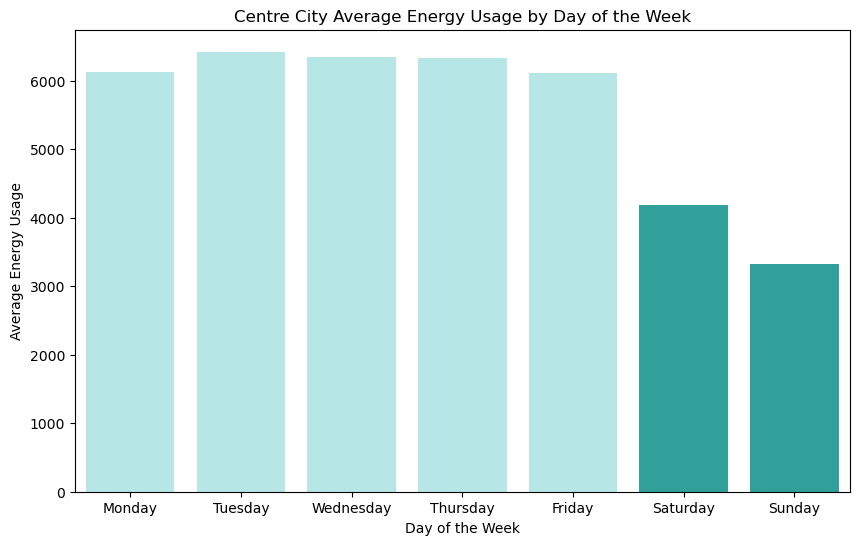

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate the average energy usage by day of the week
average_energy_usage = CentreCitySMData.groupby('DayOfWeek')['Total'].mean().reset_index()

#Define colors for each day of the week
colors = ['paleturquoise', 'paleturquoise', 'paleturquoise', 'paleturquoise', 'paleturquoise', 'lightseagreen', 'lightseagreen']

#Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Total', data=average_energy_usage, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
plt.title('Centre City Average Energy Usage by Day of the Week')
plt.ylabel('Average Energy Usage')
plt.xlabel('Day of the Week')

plt.savefig('1.png', dpi=300, bbox_inches='tight')

plt.show()





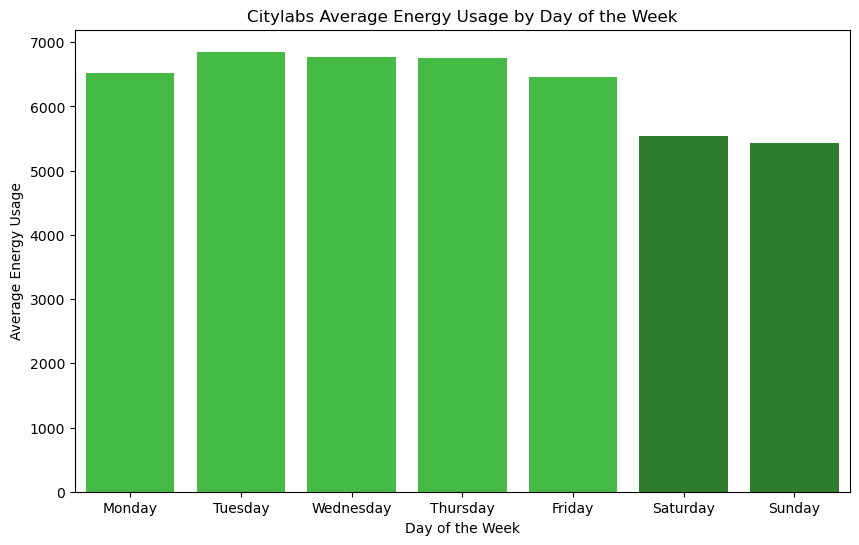

In [54]:
#Calculate the average energy usage by day of the week
average_energy_usage = CitylabsSMData.groupby('DayOfWeek')['Total'].mean().reset_index()

#Define colors for each day of the week
colors = ['limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'forestgreen', 'forestgreen']

#Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Total', data=average_energy_usage, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
plt.title('Citylabs Average Energy Usage by Day of the Week')
plt.ylabel('Average Energy Usage')
plt.xlabel('Day of the Week')
plt.savefig('2.png', dpi=300, bbox_inches='tight')
plt.show()



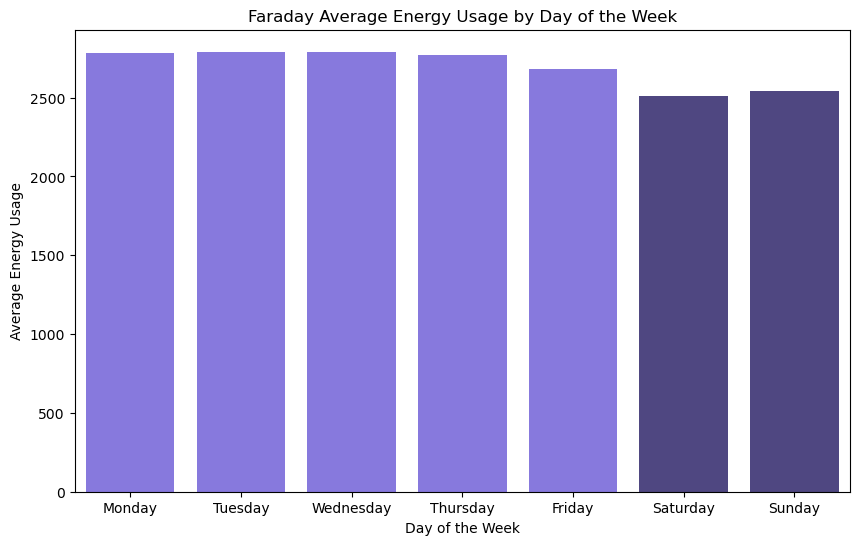

In [55]:
#Calculate the average energy usage by day of the week
average_energy_usage = FaradaySMData.groupby('DayOfWeek')['Total'].mean().reset_index()

#Define colors for each day of the week
colors = ['mediumslateblue', 'mediumslateblue', 'mediumslateblue', 'mediumslateblue', 'mediumslateblue', 'darkslateblue', 'darkslateblue']

#Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Total', data=average_energy_usage, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
plt.title('Faraday Average Energy Usage by Day of the Week')
plt.ylabel('Average Energy Usage')
plt.xlabel('Day of the Week')
plt.savefig('3.png', dpi=300, bbox_inches='tight')
plt.show()



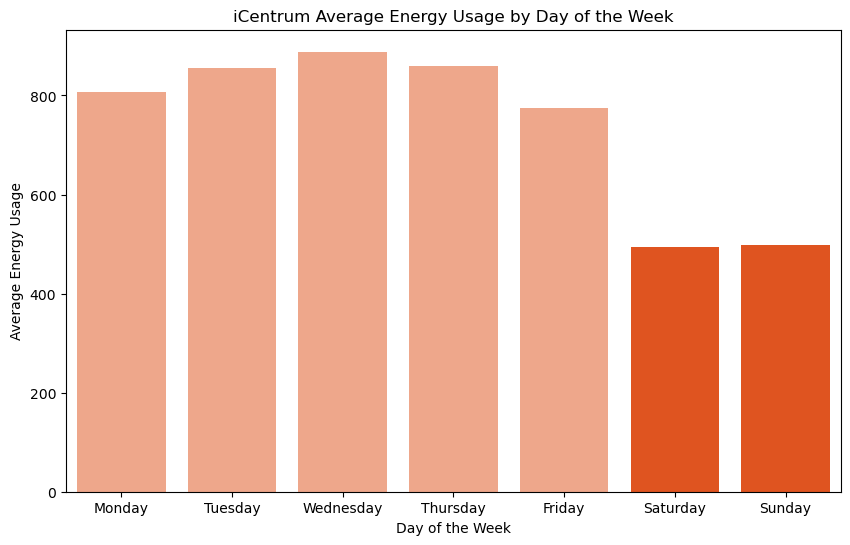

In [56]:
#Calculate the average energy usage by day of the week
average_energy_usage = iCentrumSMData.groupby('DayOfWeek')['Total'].mean().reset_index()

#Define colors for each day of the week
colors = ['lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'orangered', 'orangered']

#Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Total', data=average_energy_usage, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
plt.title('iCentrum Average Energy Usage by Day of the Week')
plt.ylabel('Average Energy Usage')
plt.xlabel('Day of the Week')
plt.savefig('4.png', dpi=300, bbox_inches='tight')
plt.show()


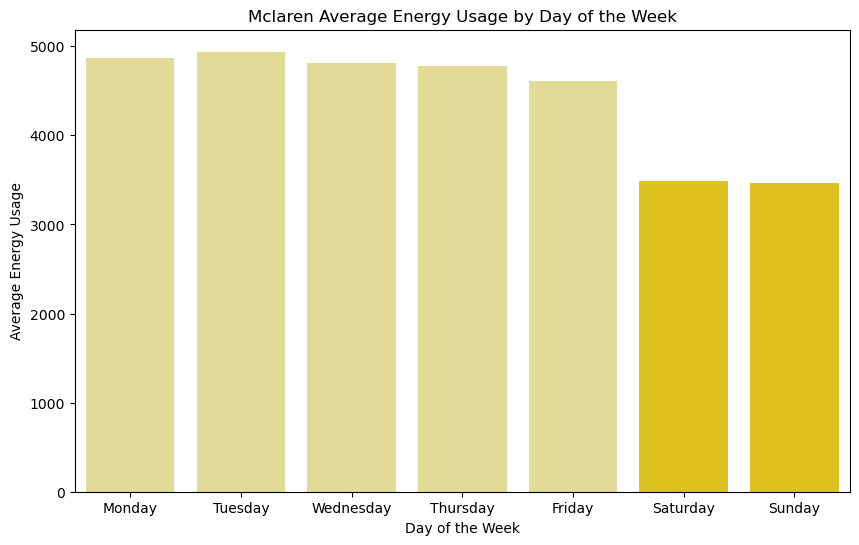

In [57]:
#Calculate the average energy usage by day of the week
average_energy_usage = MclarenSMData.groupby('DayOfWeek')['Total'].mean().reset_index()

#Define colors for each day of the week
colors = ['khaki', 'khaki', 'khaki', 'khaki', 'khaki', 'gold', 'gold']

#Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Total', data=average_energy_usage, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
plt.title('Mclaren Average Energy Usage by Day of the Week')
plt.ylabel('Average Energy Usage')
plt.xlabel('Day of the Week')
plt.savefig('5.png', dpi=300, bbox_inches='tight')
plt.show()


In [58]:
#List of DataFrames
dfs = [CentreCitySMData, CitylabsSMData, FaradaySMData, iCentrumSMData, MclarenSMData]

#List of site names
sites = ['CentreCity', 'Citylabs', 'Faraday', 'iCentrum', 'Mclaren']

#Initialize an empty DataFrame to store results
average_usage_all = pd.DataFrame(columns=['Site', 'WeekdayAverage', 'WeekendAverage'])

#Iterate over each DataFrame
for site, df in zip(sites, dfs):
    #Calculate average energy usage for weekdays
    weekday_avg = df.loc[df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'Total'].mean()

    #Calculate average energy usage for weekends
    weekend_avg = df.loc[df['DayOfWeek'].isin(['Saturday', 'Sunday']), 'Total'].mean()

    #Create a temporary DataFrame to store the results for this site
    average_usage_site = pd.DataFrame({
        'Site': [site],
        'WeekdayAverage': [weekday_avg],
        'WeekendAverage': [weekend_avg]
    })

    #Append the results to the main DataFrame
    average_usage_all = average_usage_all.append(average_usage_site, ignore_index=True)

average_usage_all


C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2583727.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_usage_all = average_usage_all.append(average_usage_site, ignore_index=True)
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2583727.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_usage_all = average_usage_all.append(average_usage_site, ignore_index=True)
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2583727.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_usage_all = average_usage_all.append(average_usage_site, ignore_index=True)
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2583727.py:26: FutureWarning: The frame.append method is deprecated and will be removed from panda

Site  WeekdayAverage  WeekendAverage
0  CentreCity     6269.997677     3762.936031
1    Citylabs     6672.013077     5490.728571
2     Faraday     2761.965769     2524.741905
3    iCentrum      836.975453      495.810697
4     Mclaren     4800.680520     3473.903866

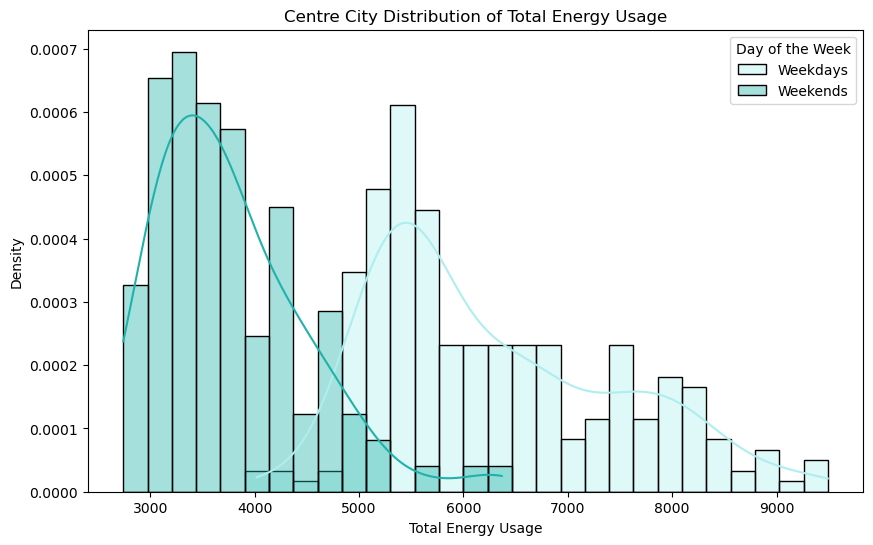

In [59]:
import numpy as np

#Filter out weekday and weekend data
weekday_data = CentreCitySMData[CentreCitySMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total']
weekend_data = CentreCitySMData[CentreCitySMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Total']


#Calculate the overall minimum and maximum values
min_value = min(weekday_data.min(), weekend_data.min())
max_value = max(weekday_data.max(), weekend_data.max())

#Define the bins
bins = np.linspace(min_value, max_value, 30)

#Plot the histograms
plt.figure(figsize=(10, 6))
sns.histplot(weekday_data, color='paleturquoise', alpha=0.4, label='Weekdays', kde=True, stat='density', bins=bins)
sns.histplot(weekend_data, color='lightseagreen', alpha=0.4, label='Weekends', kde=True, stat='density', bins=bins)
plt.legend(title='Day of the Week')
plt.title('Centre City Distribution of Total Energy Usage')
plt.xlabel('Total Energy Usage')
plt.ylabel('Density')
plt.savefig('6.png', dpi=300, bbox_inches='tight')
plt.show()


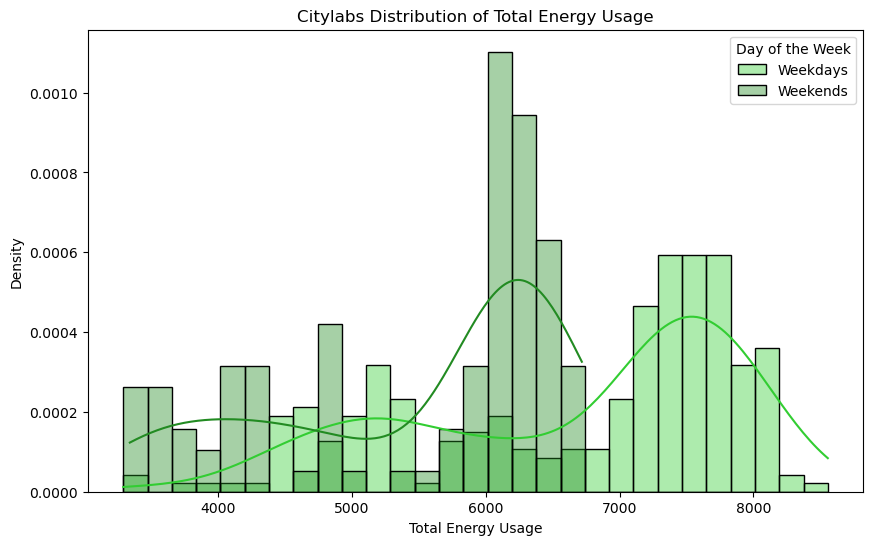

In [60]:
#Filter out weekday and weekend data
weekday_data = CitylabsSMData[CitylabsSMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total']
weekend_data = CitylabsSMData[CitylabsSMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Total']


#Calculate the overall minimum and maximum values
min_value = min(weekday_data.min(), weekend_data.min())
max_value = max(weekday_data.max(), weekend_data.max())

#Define the bins
bins = np.linspace(min_value, max_value, 30)

#Plot the histograms
plt.figure(figsize=(10, 6))
sns.histplot(weekday_data, color='limegreen', alpha=0.4, label='Weekdays', kde=True, stat='density', bins=bins)
sns.histplot(weekend_data, color='forestgreen', alpha=0.4, label='Weekends', kde=True, stat='density', bins=bins)
plt.legend(title='Day of the Week')
plt.title('Citylabs Distribution of Total Energy Usage')
plt.xlabel('Total Energy Usage')
plt.ylabel('Density')
plt.savefig('7.png', dpi=300, bbox_inches='tight')
plt.show()


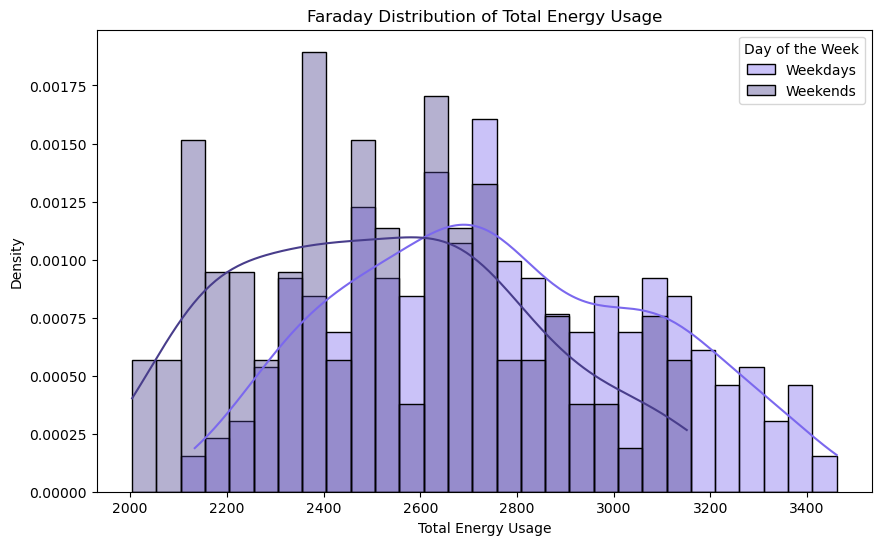

In [61]:
#Filter out weekday and weekend data
weekday_data = FaradaySMData[FaradaySMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total']
weekend_data = FaradaySMData[FaradaySMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Total']


#Calculate the overall minimum and maximum values
min_value = min(weekday_data.min(), weekend_data.min())
max_value = max(weekday_data.max(), weekend_data.max())

#Define the bins
bins = np.linspace(min_value, max_value, 30)

#Plot the histograms
plt.figure(figsize=(10, 6))
sns.histplot(weekday_data, color='mediumslateblue', alpha=0.4, label='Weekdays', kde=True, stat='density', bins=bins)
sns.histplot(weekend_data, color='darkslateblue', alpha=0.4, label='Weekends', kde=True, stat='density', bins=bins)
plt.legend(title='Day of the Week')
plt.title('Faraday Distribution of Total Energy Usage')
plt.xlabel('Total Energy Usage')
plt.ylabel('Density')
plt.savefig('8.png', dpi=300, bbox_inches='tight')
plt.show()


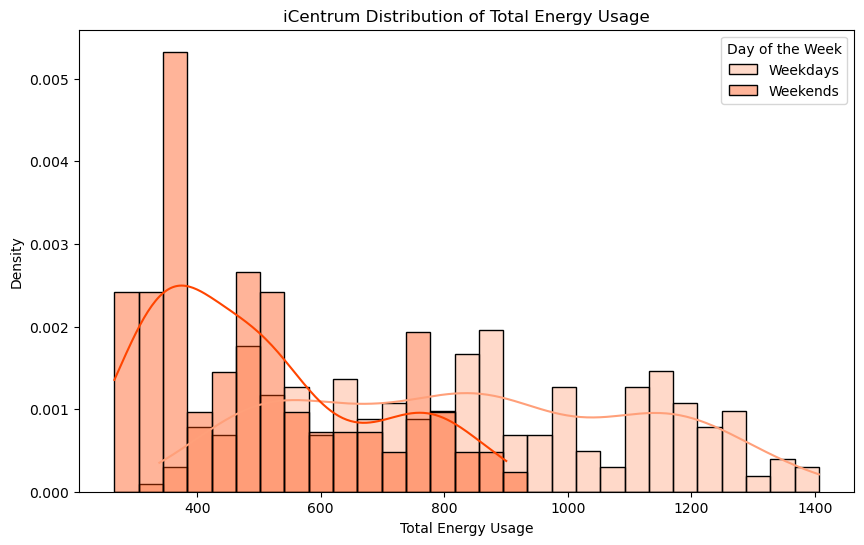

In [62]:
#Filter out weekday and weekend data
weekday_data = iCentrumSMData[CentreCitySMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total']
weekend_data = iCentrumSMData[CentreCitySMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Total']


#Calculate the overall minimum and maximum values
min_value = min(weekday_data.min(), weekend_data.min())
max_value = max(weekday_data.max(), weekend_data.max())

#Define the bins
bins = np.linspace(min_value, max_value, 30)

#Plot the histograms
plt.figure(figsize=(10, 6))
sns.histplot(weekday_data, color='lightsalmon', alpha=0.4, label='Weekdays', kde=True, stat='density', bins=bins)
sns.histplot(weekend_data, color='orangered', alpha=0.4, label='Weekends', kde=True, stat='density', bins=bins)
plt.legend(title='Day of the Week')
plt.title('iCentrum Distribution of Total Energy Usage')
plt.xlabel('Total Energy Usage')
plt.ylabel('Density')
plt.savefig('9.png', dpi=300, bbox_inches='tight')
plt.show()


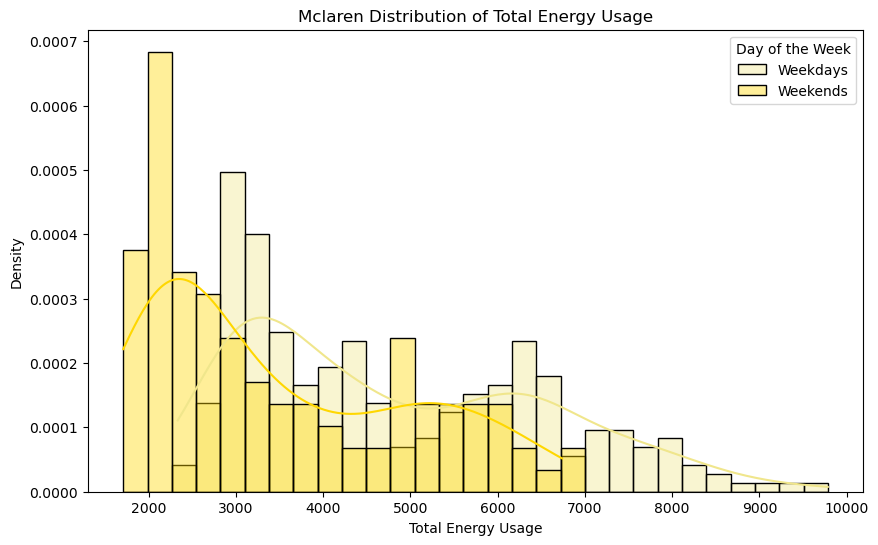

In [63]:
#Filter out weekday and weekend data
weekday_data = MclarenSMData[MclarenSMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total']
weekend_data = MclarenSMData[MclarenSMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Total']


#Calculate the overall minimum and maximum values
min_value = min(weekday_data.min(), weekend_data.min())
max_value = max(weekday_data.max(), weekend_data.max())

#Define the bins
bins = np.linspace(min_value, max_value, 30)

#Plot the histograms
plt.figure(figsize=(10, 6))
sns.histplot(weekday_data, color='khaki', alpha=0.4, label='Weekdays', kde=True, stat='density', bins=bins)
sns.histplot(weekend_data, color='gold', alpha=0.4, label='Weekends', kde=True, stat='density', bins=bins)
plt.legend(title='Day of the Week')
plt.title('Mclaren Distribution of Total Energy Usage')
plt.xlabel('Total Energy Usage')
plt.ylabel('Density')
plt.savefig('10.png', dpi=300, bbox_inches='tight')
plt.show()


Looking at statistical tests now, specifically the KS test

In [64]:
from scipy import stats

KSTestResults = pd.DataFrame(columns=['Building', 'KS Statistic', 'P-Value'])

def perform_ks_test(building_data, building_name):
    weekday_data = building_data[building_data['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total']
    weekend_data = building_data[building_data['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Total']

    weekday_values = weekday_data.values
    weekend_values = weekend_data.values

    # Performing the KS test
    ks_statistic, p_value = stats.ks_2samp(weekday_values, weekend_values)
    results_dict = {'Building': building_name, 'KS Statistic': ks_statistic, 'P-Value': p_value}

    # Append the results to the DataFrame
    return KSTestResults.append(results_dict, ignore_index=True)


In [65]:
#Run for all dataframes
KSTestResults = perform_ks_test(CentreCitySMData, 'CentreCity')
KSTestResults = perform_ks_test(CitylabsSMData, 'Citylabs')
KSTestResults = perform_ks_test(FaradaySMData, 'Faraday')
KSTestResults = perform_ks_test(iCentrumSMData, 'iCentrum')
KSTestResults = perform_ks_test(MclarenSMData, 'Mclaren')

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\717626696.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return KSTestResults.append(results_dict, ignore_index=True)
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\717626696.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return KSTestResults.append(results_dict, ignore_index=True)
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\717626696.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return KSTestResults.append(results_dict, ignore_index=True)
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\717626696.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return KS

In [66]:
KSTestResults

Building  KS Statistic       P-Value
0  CentreCity      0.906410  1.675686e-67
1    Citylabs      0.603846  4.228792e-26
2     Faraday      0.286996  6.109454e-06
3    iCentrum      0.522161  3.048045e-19
4     Mclaren      0.441575  1.083255e-13

Now looking at the averages over a day

In [67]:
dataframes = [CentreCitySMData, CitylabsSMData, FaradaySMData, iCentrumSMData, MclarenSMData]

for df in dataframes:
    df.rename(columns={'tavg': 'Average Temperature'}, inplace=True)

In [68]:
#Create a DataFrame for the weekdays
CentreCityWeekdaySMData = CentreCitySMData[CentreCitySMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

#Create a DataFrame for the weekends
CentreCityWeekendSMData = CentreCitySMData[CentreCitySMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]

In [69]:
CentreCitySMData

Site       Date  DayOfWeek  00:00      00:30  01:00  01:30  02:00  \
0    Centre City 2022-01-01   Saturday   56.9  56.000000   56.3   58.4   60.1   
1    Centre City 2022-01-02     Sunday   61.5  57.603922   58.8   57.3   56.8   
2    Centre City 2022-01-03     Monday   64.0  61.300000   66.7   67.8   69.0   
3    Centre City 2022-01-04    Tuesday   68.1  67.300000   62.5   66.4   68.2   
4    Centre City 2022-01-05  Wednesday  107.0  98.400000  104.0  106.1   97.4   
..           ...        ...        ...    ...        ...    ...    ...    ...   
360  Centre City 2022-12-27    Tuesday   72.9  72.100000   74.9   78.7   85.3   
361  Centre City 2022-12-28  Wednesday   62.2  66.500000   69.9   69.4   66.7   
362  Centre City 2022-12-29   Thursday   67.8  66.700000   65.1   68.4   72.8   
363  Centre City 2022-12-30     Friday   68.4  69.500000   66.8   72.7   71.8   
364  Centre City 2022-12-31   Saturday   67.8  66.400000   64.7   66.2   66.4   

     02:30  03:00  ...  21:30  22:00  22:30  23:00  23:30        Total  \
0     56.1   57.4  ...   55.9   62.9   59.8   66.1   62.8  3472.100000   
1     54.5   58.2  ...   61.3   66.7   65.5   67.8   62.9  2903.003922   
2     63.3   65.3  ...   59.9   63.4   63.4   72.6   68.5  5502.300000   
3     61.9   69.8  ...   97.2  103.4  101.4  107.4  107.5  7483.300000   
4     98.8  105.9  ...   88.1   92.3   93.5  102.4  103.3  8135.000000   
..     ...    ...  ...    ...    ...    ...    ...    ...          ...   
360   83.8   77.7  ...   63.9   63.8   68.7   67.7   66.3  5512.800000   
361   64.8   64.1  ...   65.9   68.8   68.3   66.2   72.2  5173.000000   
362   70.9   62.7  ...   69.4   70.6   72.0   69.2   70.2  5314.800000   
363   72.8   68.2  ...   68.7   66.7   61.5   64.9   66.2  5638.700000   
364   63.7   62.9  ...   61.5   63.6   65.5   67.1   67.2  4179.300000   

     TotalOfficeSize  TotalOccupiedOfficeSize  OccupancyPercentage  \
0                  0                        0                  0.0   
1                  0                        0                  0.0   
2                  0                        0                  0.0   
3                  0                        0                  0.0   
4                  0                        0                  0.0   
..               ...                      ...                  ...   
360           224083                   224083                100.0   
361           224083                   224083                100.0   
362           224083                   224083                100.0   
363           224083                   224083                100.0   
364           224083                   224083                100.0   

     Average Temperature  
0                   12.8  
1                    9.9  
2                    8.0  
3                    3.8  
4                    2.6  
..                   ...  
360                  6.1  
361                  9.3  
362                  7.0  
363                  8.8  
364                 10.5  

[365 rows x 56 columns]

In [70]:
#Renaming the tavg column

dataframes = [CentreCitySMData, CitylabsSMData, FaradaySMData, iCentrumSMData, MclarenSMData]

for df in dataframes:
    df.rename(columns={'tavg': 'Average Temperature'}, inplace=True)


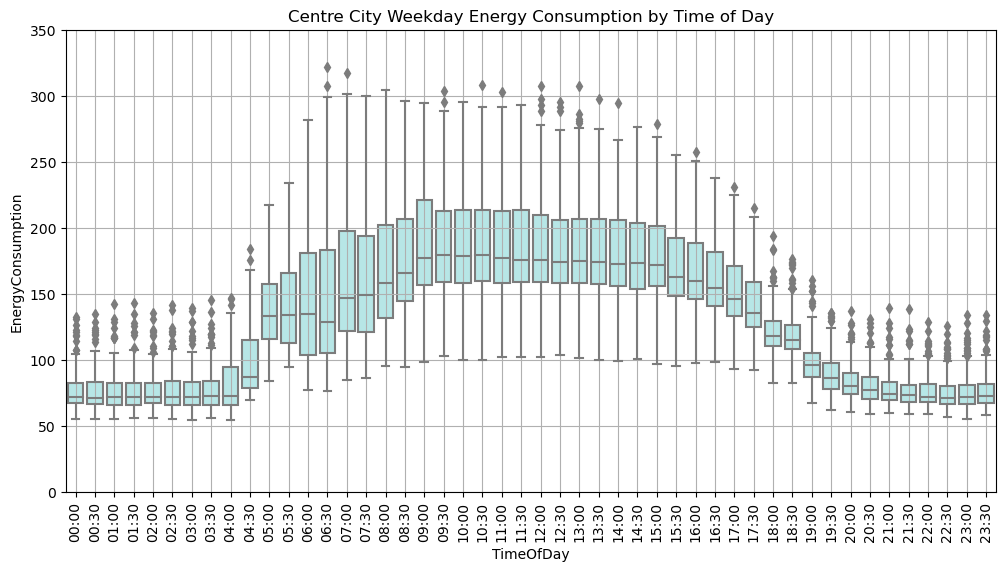

In [71]:
#Let's first list all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(CentreCityWeekdaySMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total', 'Average Temperature'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'paleturquoise')
plt.xticks(rotation=90)  
plt.ylim(0, 350)
plt.title('Centre City Weekday Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('11.png', dpi=300, bbox_inches='tight')
plt.show()


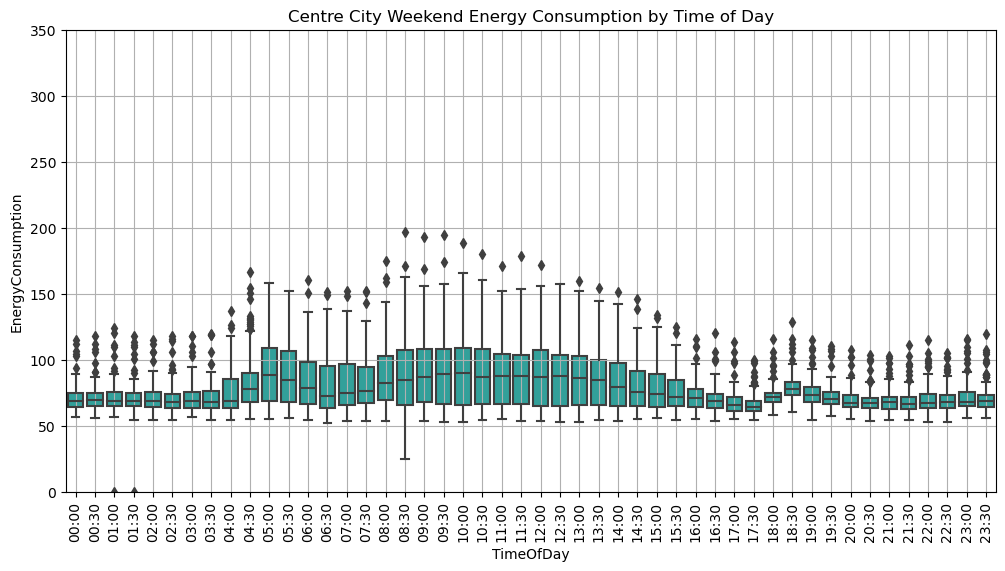

In [72]:
#Let's first list all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(CentreCityWeekendSMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total', 'Average Temperature'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'lightseagreen')
plt.xticks(rotation=90) 
plt.ylim(0, 350)
plt.title('Centre City Weekend Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('12.png', dpi=300, bbox_inches='tight')
plt.show()


In [73]:
#Splitting into 2 dataframes
CitylabsWeekdaySMData = CitylabsSMData[CitylabsSMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
CitylabsWeekendSMData = CitylabsSMData[CitylabsSMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]

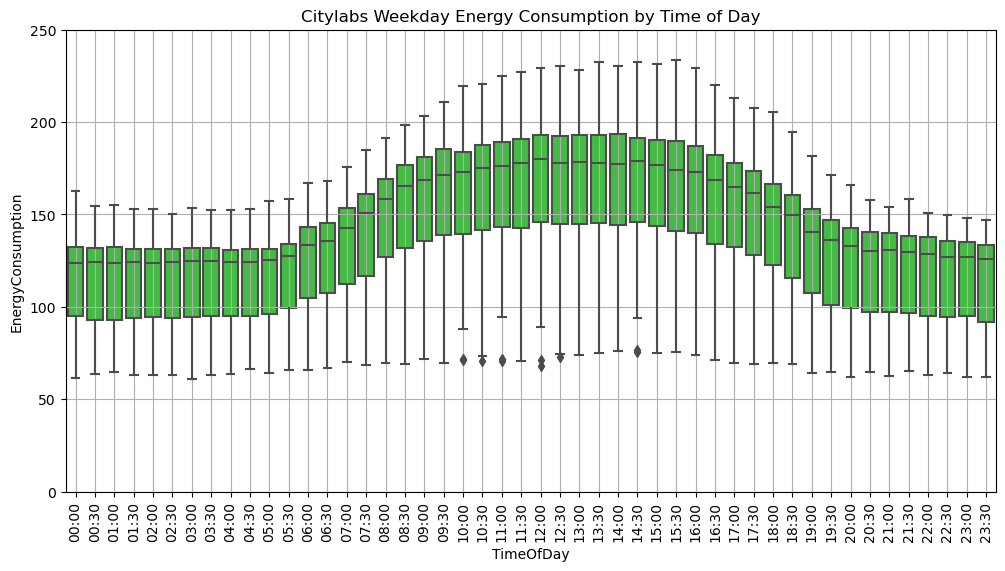

In [74]:
#Let's first list all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(CitylabsWeekdaySMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'limegreen')
plt.xticks(rotation=90)  
plt.ylim(0, 250)
plt.title('Citylabs Weekday Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('13.png', dpi=300, bbox_inches='tight')
plt.show()

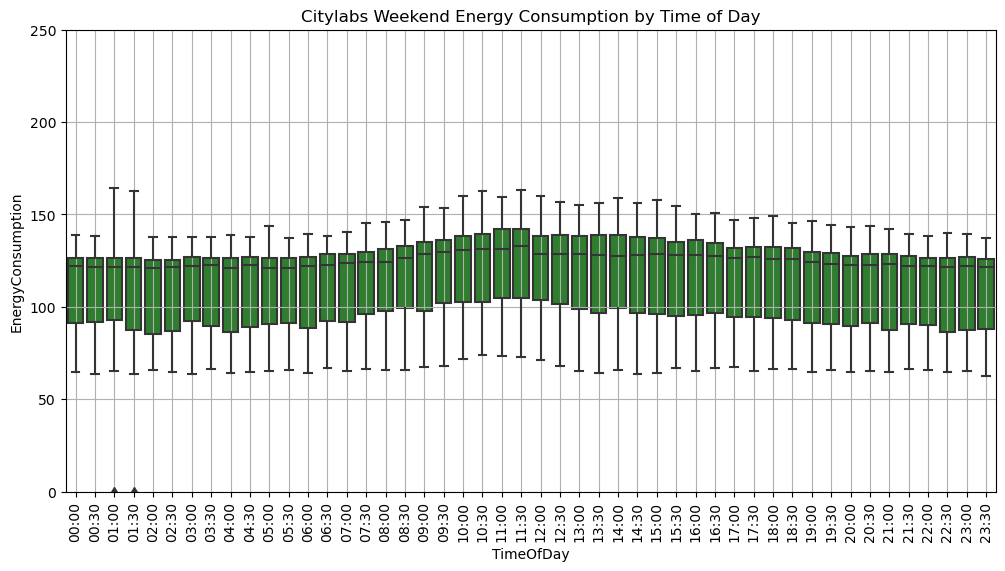

In [75]:
#Let's first list all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(CitylabsWeekendSMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'forestgreen')
plt.xticks(rotation=90) 
plt.ylim(0, 250)
plt.title('Citylabs Weekend Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('14.png', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
#Create a DataFrame for the weekdays
FaradayWeekdaySMData = FaradaySMData[FaradaySMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

#Create a DataFrame for the weekends
FaradayWeekendSMData = FaradaySMData[FaradaySMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]

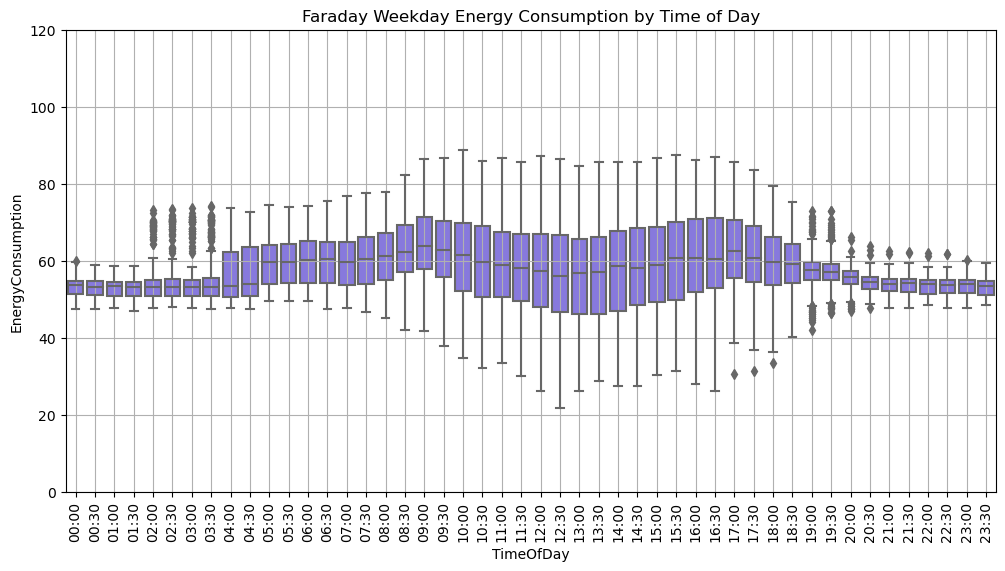

In [77]:
#Let's first list all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(FaradayWeekdaySMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'mediumslateblue')
plt.xticks(rotation=90) 
plt.ylim(0, 120)
plt.title('Faraday Weekday Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('15.png', dpi=300, bbox_inches='tight')
plt.show()

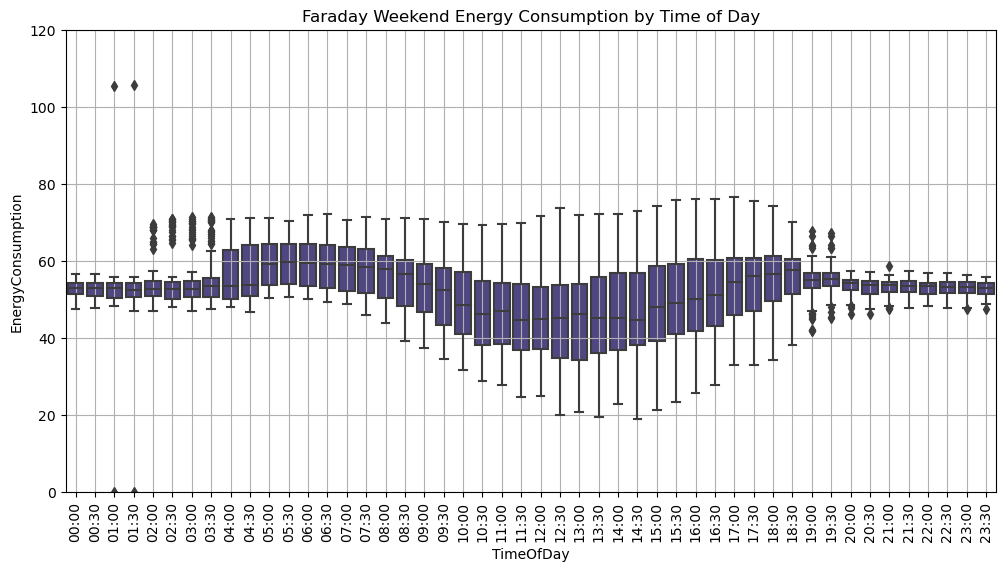

In [78]:
#List all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(FaradayWeekendSMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'darkslateblue')
plt.xticks(rotation=90)  
plt.ylim(0, 120)
plt.title('Faraday Weekend Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('16.png', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
#Create a DataFrame for the weekdays
iCentrumWeekdaySMData = iCentrumSMData[iCentrumSMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

#Create a DataFrame for the weekends
iCentrumWeekendSMData = iCentrumSMData[iCentrumSMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]

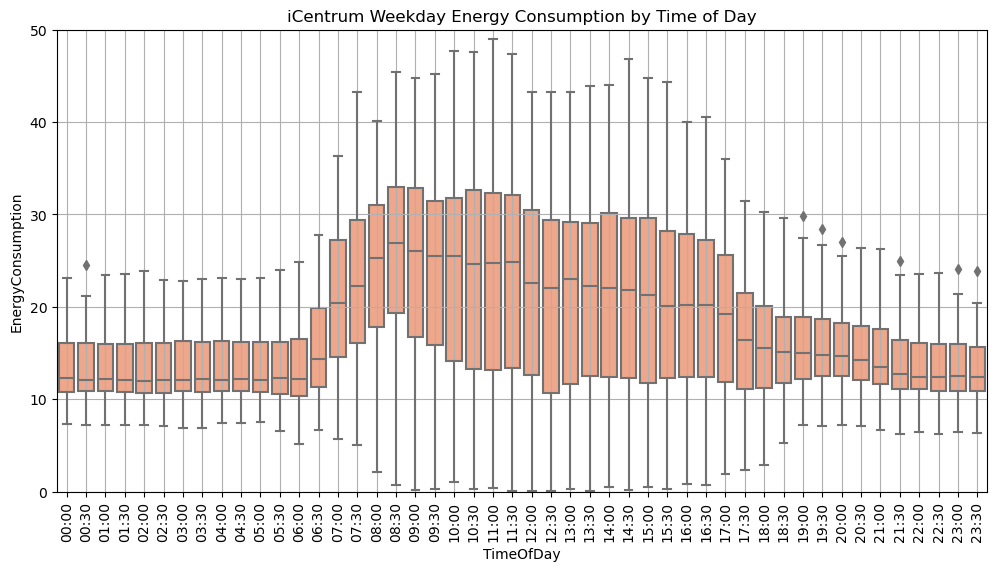

In [80]:
#List all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(iCentrumWeekdaySMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'lightsalmon')
plt.xticks(rotation=90)  
plt.ylim(0, 50)
plt.title('iCentrum Weekday Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('17.png', dpi=300, bbox_inches='tight')
plt.show()

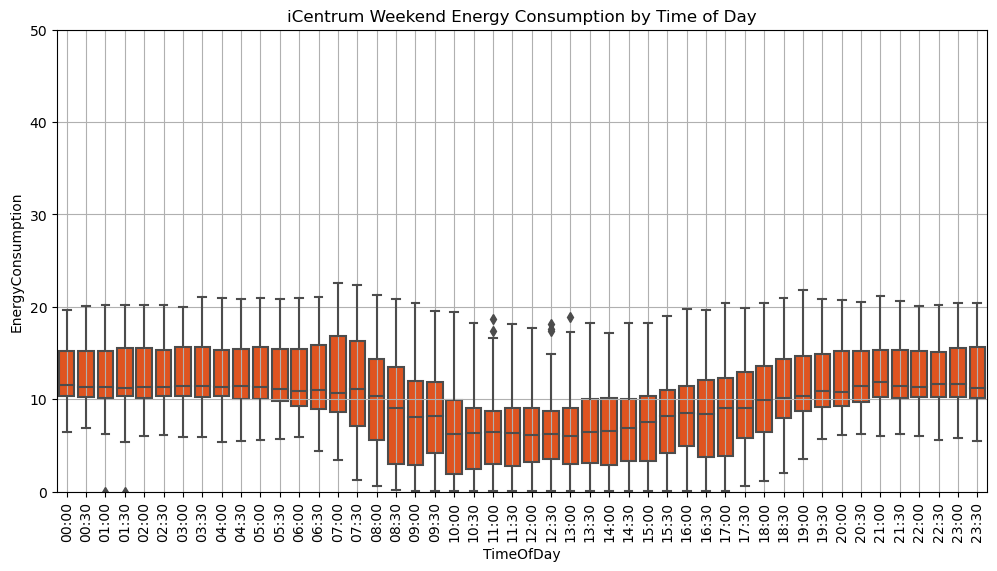

In [81]:
#List all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(iCentrumWeekendSMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'orangered')
plt.xticks(rotation=90)  
plt.ylim(0, 50)
plt.title('iCentrum Weekend Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('18.png', dpi=300, bbox_inches='tight')
plt.show()

In [82]:
# Create a DataFrame for the weekdays
MclarenWeekdaySMData = MclarenSMData[MclarenSMData['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Create a DataFrame for the weekends
MclarenWeekendSMData = MclarenSMData[MclarenSMData['DayOfWeek'].isin(['Saturday', 'Sunday'])]

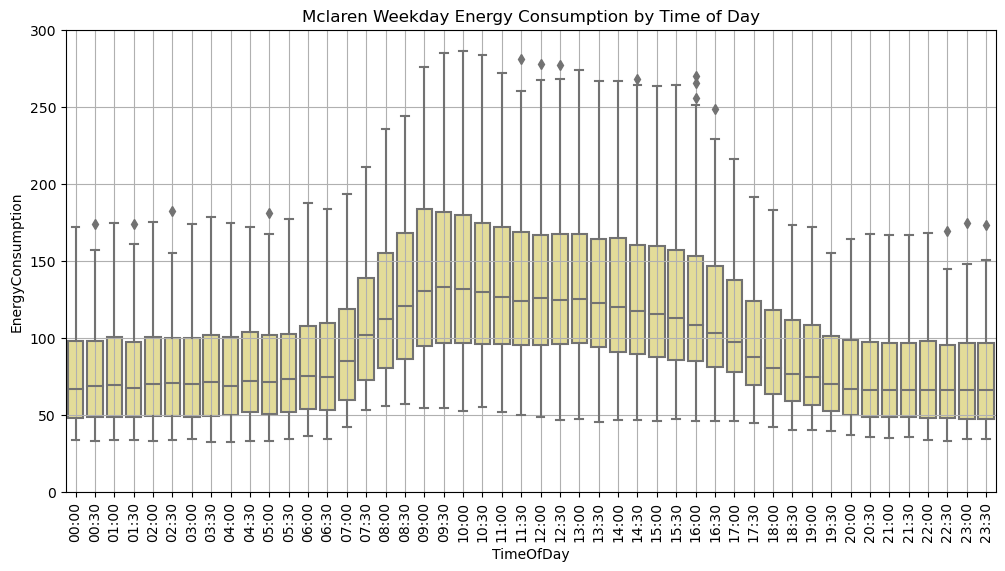

In [83]:
#List all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(MclarenWeekdaySMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'khaki')
plt.xticks(rotation=90)  
plt.ylim(0, 300)
plt.title('Mclaren Weekday Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('19.png', dpi=300, bbox_inches='tight')
plt.show()

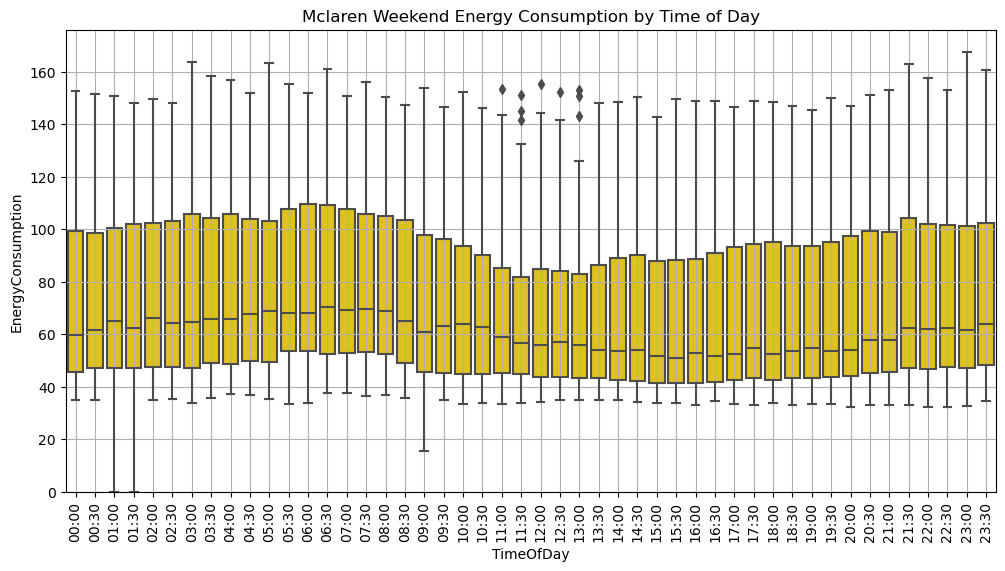

In [84]:
#List all the time columns
time_columns = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]

#Melt the data so that each row corresponds to a single time period of energy consumption
long_form_data = pd.melt(MclarenWeekendSMData, id_vars=['Site', 'Date', 'DayOfWeek', 'Total'], value_vars=time_columns, var_name='TimeOfDay', value_name='EnergyConsumption')

plt.figure(figsize=(12,6))  
sns.boxplot(x='TimeOfDay', y='EnergyConsumption', data=long_form_data, color = 'gold')
plt.xticks(rotation=90)  
plt.ylim(0, )
plt.title('Mclaren Weekend Energy Consumption by Time of Day')
plt.grid(True)
plt.savefig('20.png', dpi=300, bbox_inches='tight')
plt.show()

Looking at energy usage throughout the year now

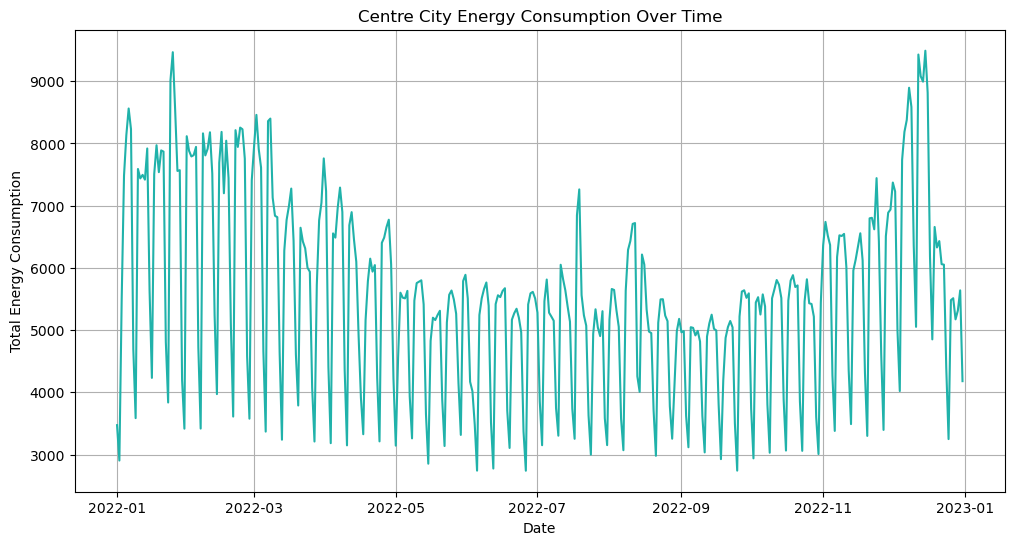

In [85]:
#PLotting energy consumption over time
plt.figure(figsize=(12, 6))
plt.plot(CentreCitySMData['Date'], CentreCitySMData['Total'], color = 'lightseagreen')
plt.title('Centre City Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption')
plt.grid(True)
plt.show()


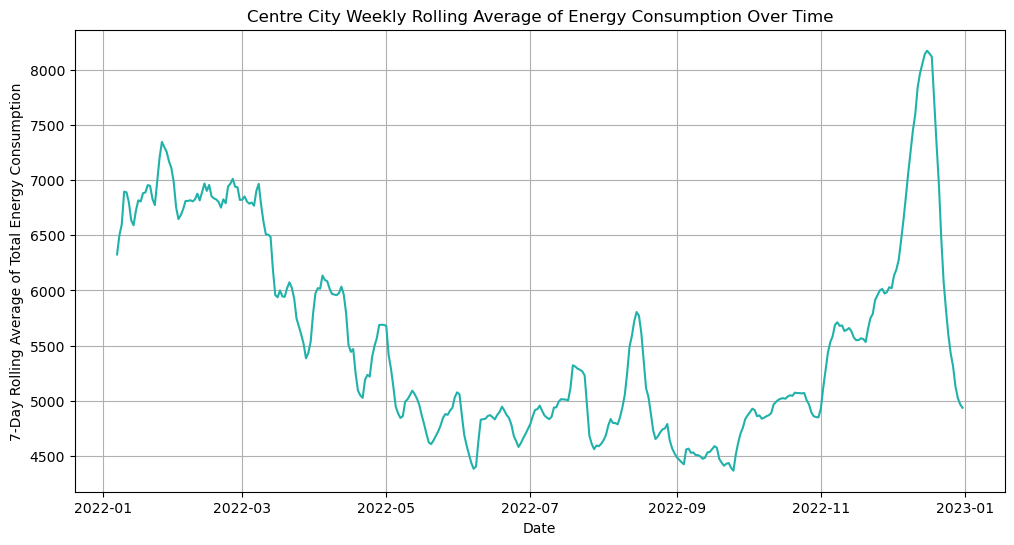

In [86]:
#Calculate 7-day rolling average for CC
CentreCitySMData['7-day-rolling-average'] = CentreCitySMData['Total'].rolling(window=7).mean()

#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(CentreCitySMData['Date'], CentreCitySMData['7-day-rolling-average'], color = 'lightseagreen')
plt.title('Centre City Weekly Rolling Average of Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Rolling Average of Total Energy Consumption')
plt.grid(True)
plt.savefig('21.png', dpi=300, bbox_inches='tight')
plt.show()


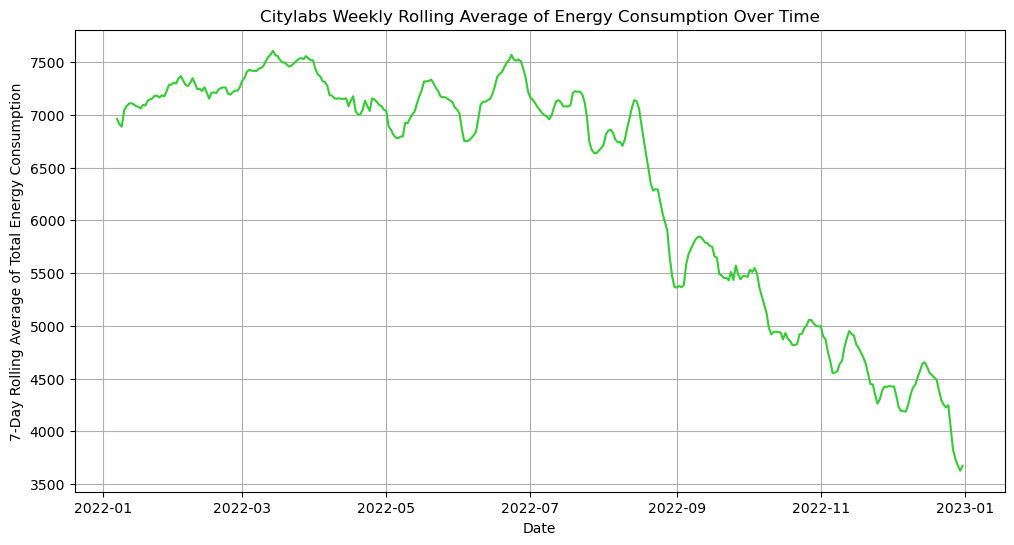

In [87]:
#Calculate 7-day rolling average for Cl
CitylabsSMData['7-day-rolling-average'] = CitylabsSMData['Total'].rolling(window=7).mean()

#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(CitylabsSMData['Date'], CitylabsSMData['7-day-rolling-average'], color = 'limegreen')
plt.title('Citylabs Weekly Rolling Average of Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Rolling Average of Total Energy Consumption')
plt.grid(True)
plt.savefig('22.png', dpi=300, bbox_inches='tight')
plt.show()


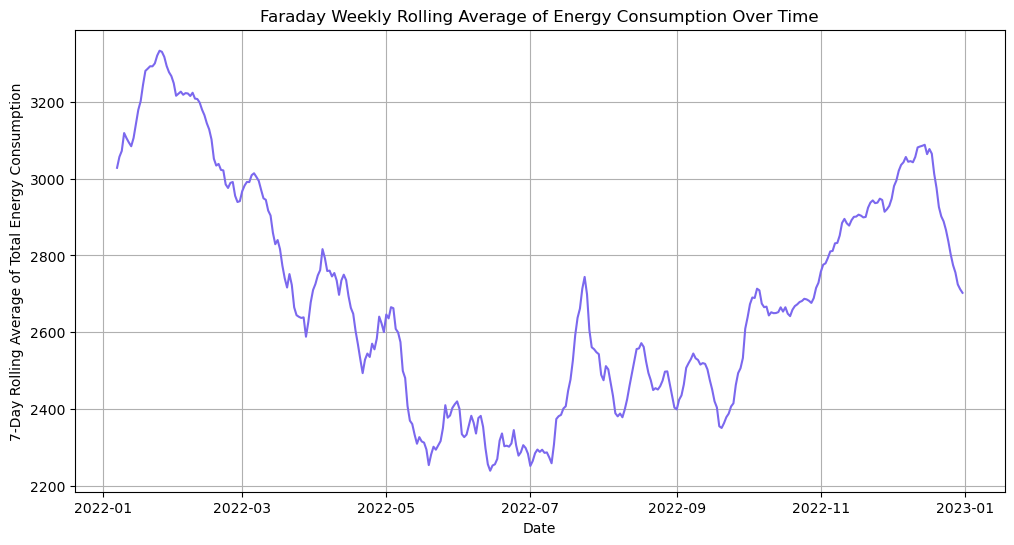

In [88]:
#Calculate 7-day rolling average for F
FaradaySMData['7-day-rolling-average'] = FaradaySMData['Total'].rolling(window=7).mean()

#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(FaradaySMData['Date'], FaradaySMData['7-day-rolling-average'], color = 'mediumslateblue')
plt.title('Faraday Weekly Rolling Average of Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Rolling Average of Total Energy Consumption')
plt.grid(True)
plt.savefig('23.png', dpi=300, bbox_inches='tight')
plt.show()


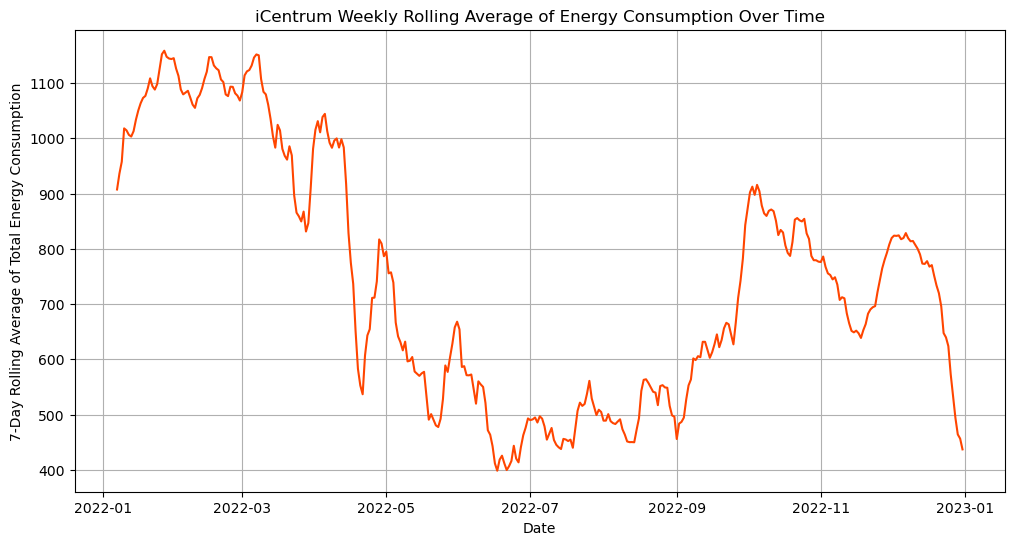

In [89]:
#Calculate 7-day rolling average for iC
iCentrumSMData['7-day-rolling-average'] = iCentrumSMData['Total'].rolling(window=7).mean()

#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(iCentrumSMData['Date'], iCentrumSMData['7-day-rolling-average'], color = 'orangered')
plt.title('iCentrum Weekly Rolling Average of Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Rolling Average of Total Energy Consumption')
plt.grid(True)
plt.savefig('24.png', dpi=300, bbox_inches='tight')
plt.show()

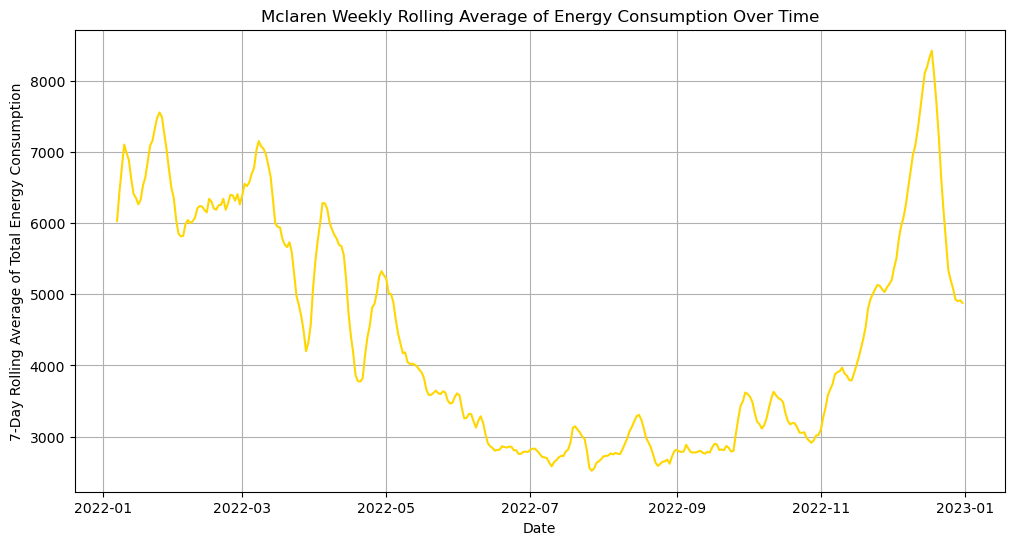

In [90]:
#Calculate 7-day rolling average for Mc
MclarenSMData['7-day-rolling-average'] = MclarenSMData['Total'].rolling(window=7).mean()

#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(MclarenSMData['Date'], MclarenSMData['7-day-rolling-average'], color = 'gold')
plt.title('Mclaren Weekly Rolling Average of Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Rolling Average of Total Energy Consumption')
plt.grid(True)
plt.savefig('25.png', dpi=300, bbox_inches='tight')
plt.show()

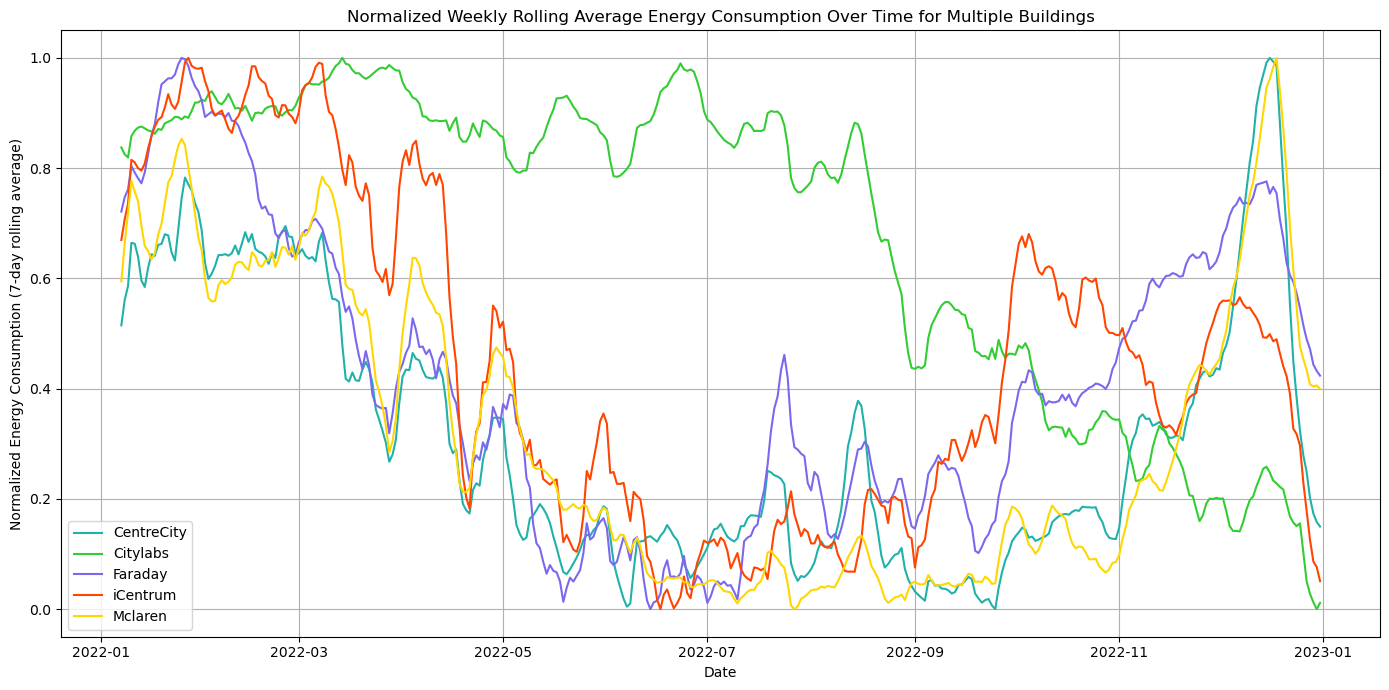

In [91]:
#This is where the max of each building is 1, and the minumum is 0

# Define a normalization function
def normalize_series(s):
    return (s - s.min()) / (s.max() - s.min())

plt.figure(figsize=(14, 7))

# Plot each normalized series on the same graph
plt.plot(CentreCitySMData['Date'], normalize_series(CentreCitySMData['7-day-rolling-average']), color='lightseagreen', label='CentreCity')
plt.plot(CitylabsSMData['Date'], normalize_series(CitylabsSMData['7-day-rolling-average']), color='limegreen', label='Citylabs')
plt.plot(FaradaySMData['Date'], normalize_series(FaradaySMData['7-day-rolling-average']), color='mediumslateblue', label='Faraday')
plt.plot(iCentrumSMData['Date'], normalize_series(iCentrumSMData['7-day-rolling-average']), color='orangered', label='iCentrum')
plt.plot(MclarenSMData['Date'], normalize_series(MclarenSMData['7-day-rolling-average']), color='gold', label='Mclaren')

# Title and labels
plt.title('Normalized Weekly Rolling Average Energy Consumption Over Time for Multiple Buildings')
plt.xlabel('Date')
plt.ylabel('Normalized Energy Consumption (7-day rolling average)')
plt.grid(True)

# Show legend to identify each series
plt.legend()

# Display the graph
plt.tight_layout()
plt.savefig('26.png', dpi=300, bbox_inches='tight')
plt.show()


Now looking at occupancy

In [92]:
CentreCitySMData

Site       Date  DayOfWeek  00:00      00:30  01:00  01:30  02:00  \
0    Centre City 2022-01-01   Saturday   56.9  56.000000   56.3   58.4   60.1   
1    Centre City 2022-01-02     Sunday   61.5  57.603922   58.8   57.3   56.8   
2    Centre City 2022-01-03     Monday   64.0  61.300000   66.7   67.8   69.0   
3    Centre City 2022-01-04    Tuesday   68.1  67.300000   62.5   66.4   68.2   
4    Centre City 2022-01-05  Wednesday  107.0  98.400000  104.0  106.1   97.4   
..           ...        ...        ...    ...        ...    ...    ...    ...   
360  Centre City 2022-12-27    Tuesday   72.9  72.100000   74.9   78.7   85.3   
361  Centre City 2022-12-28  Wednesday   62.2  66.500000   69.9   69.4   66.7   
362  Centre City 2022-12-29   Thursday   67.8  66.700000   65.1   68.4   72.8   
363  Centre City 2022-12-30     Friday   68.4  69.500000   66.8   72.7   71.8   
364  Centre City 2022-12-31   Saturday   67.8  66.400000   64.7   66.2   66.4   

     02:30  03:00  ...  22:00  22:30  23:00  23:30        Total  \
0     56.1   57.4  ...   62.9   59.8   66.1   62.8  3472.100000   
1     54.5   58.2  ...   66.7   65.5   67.8   62.9  2903.003922   
2     63.3   65.3  ...   63.4   63.4   72.6   68.5  5502.300000   
3     61.9   69.8  ...  103.4  101.4  107.4  107.5  7483.300000   
4     98.8  105.9  ...   92.3   93.5  102.4  103.3  8135.000000   
..     ...    ...  ...    ...    ...    ...    ...          ...   
360   83.8   77.7  ...   63.8   68.7   67.7   66.3  5512.800000   
361   64.8   64.1  ...   68.8   68.3   66.2   72.2  5173.000000   
362   70.9   62.7  ...   70.6   72.0   69.2   70.2  5314.800000   
363   72.8   68.2  ...   66.7   61.5   64.9   66.2  5638.700000   
364   63.7   62.9  ...   63.6   65.5   67.1   67.2  4179.300000   

     TotalOfficeSize  TotalOccupiedOfficeSize  OccupancyPercentage  \
0                  0                        0                  0.0   
1                  0                        0                  0.0   
2                  0                        0                  0.0   
3                  0                        0                  0.0   
4                  0                        0                  0.0   
..               ...                      ...                  ...   
360           224083                   224083                100.0   
361           224083                   224083                100.0   
362           224083                   224083                100.0   
363           224083                   224083                100.0   
364           224083                   224083                100.0   

     Average Temperature  7-day-rolling-average  
0                   12.8                    NaN  
1                    9.9                    NaN  
2                    8.0                    NaN  
3                    3.8                    NaN  
4                    2.6                    NaN  
..                   ...                    ...  
360                  6.1            5312.100000  
361                  9.3            5132.371429  
362                  7.0            5025.900000  
363                  8.8            4966.842857  
364                 10.5            4935.457143  

[365 rows x 57 columns]

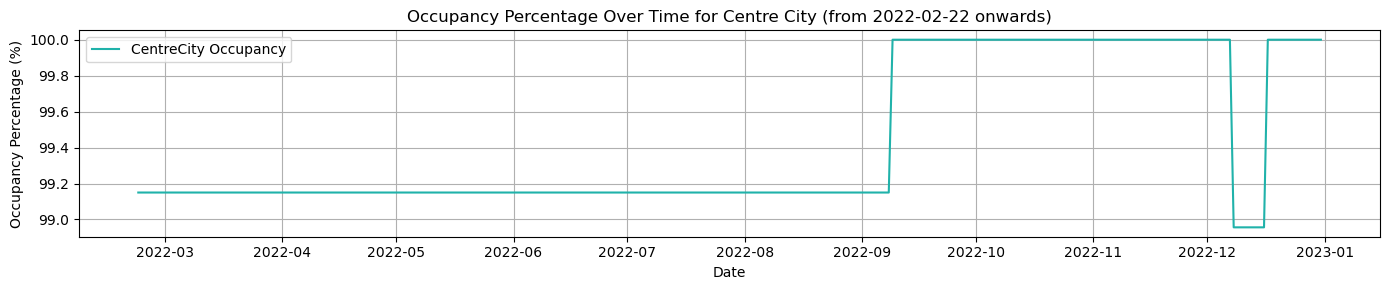

In [93]:
#Filter the DataFrame for dates from 2022-02-22 onwards
filtered_data = CentreCitySMData[CentreCitySMData['Date'] >= '2022-02-22']

plt.figure(figsize=(14, 3))

#Plot the occupancy percentage for Centre City using the filtered data
plt.plot(filtered_data['Date'], filtered_data['OccupancyPercentage'], color='lightseagreen', label='CentreCity Occupancy')

#Title and labels
plt.title('Occupancy Percentage Over Time for Centre City (from 2022-02-22 onwards)')
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage (%)')
plt.grid(True)

#Show legend
plt.legend()

#Display the graph
plt.tight_layout()
plt.show()



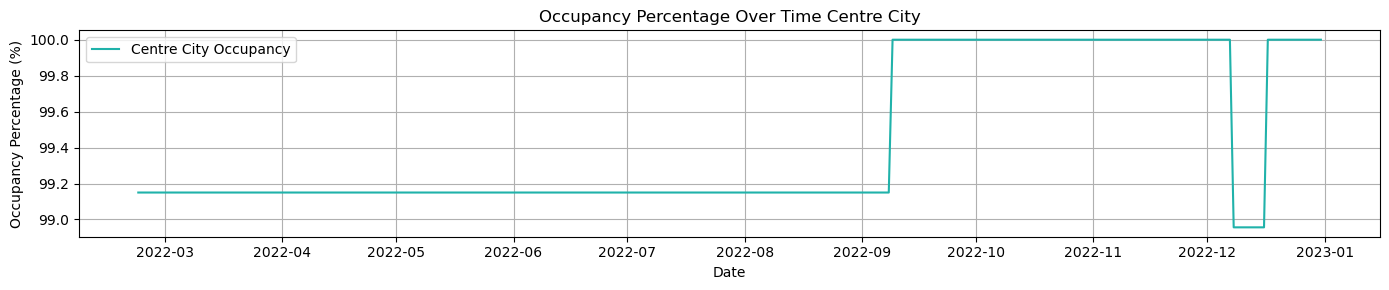

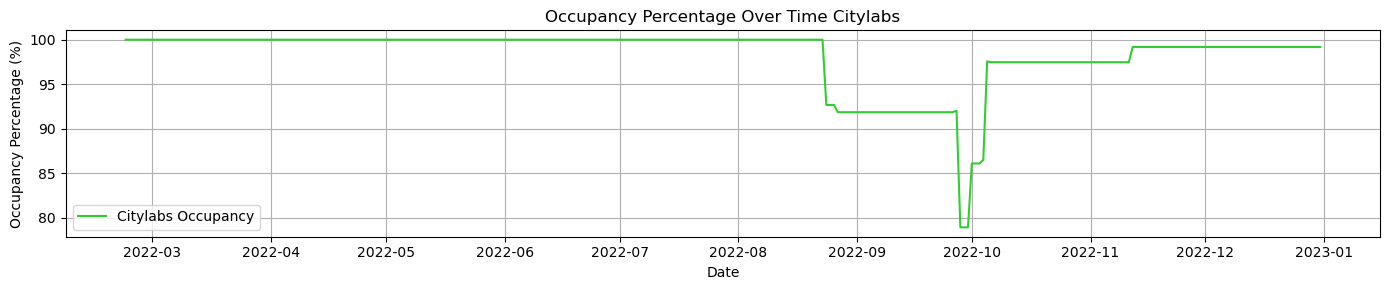

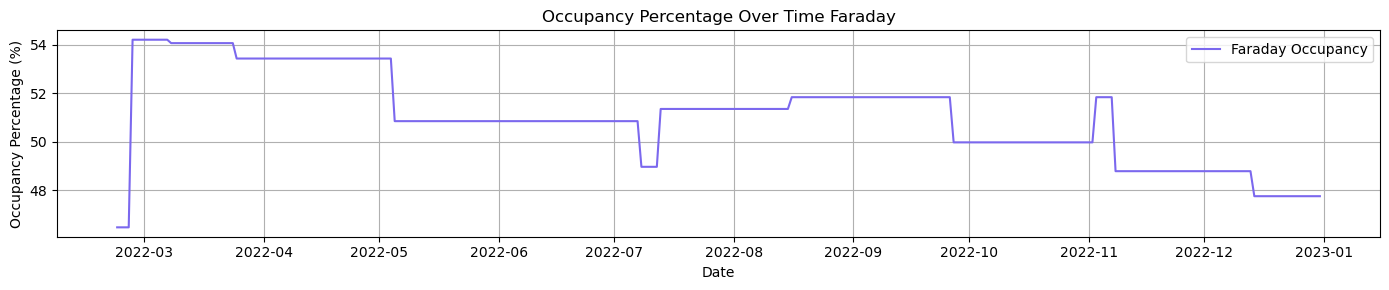

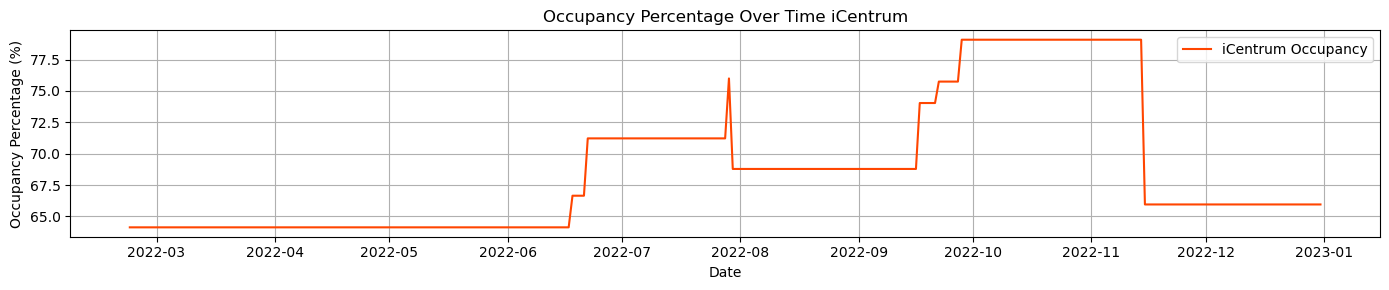

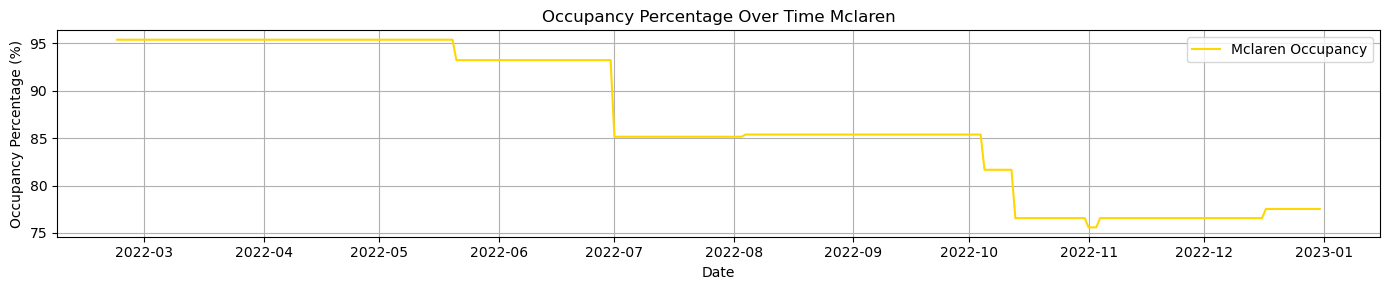

In [94]:
def plot_occupancy_and_save(dataframe, title, color, day_label):
    # Filter the DataFrame for dates from 2022-02-22 onwards
    filtered_data = dataframe[dataframe['Date'] >= '2022-02-22']
    
    plt.figure(figsize=(14, 3))
    
    #Plot the occupancy percentage using the filtered data
    plt.plot(filtered_data['Date'], filtered_data['OccupancyPercentage'], color=color, label=f'{title} Occupancy')
    
    #Title and labels
    plt.title(f'Occupancy Percentage Over Time {title}')
    plt.xlabel('Date')
    plt.ylabel('Occupancy Percentage (%)')
    plt.grid(True)
    
    #Show legend
    plt.legend()
    
    #Display the graph
    plt.tight_layout()
    
    #Save the plot as an image with the specified label
    plt.savefig(f'{day_label}.png', dpi=300, bbox_inches='tight')
    
    #Display the plot
    plt.show()

#Create a list of dataframes with their associated title prefix and color
dataframes_with_attributes = [
    (CentreCitySMData, 'Centre City', 'lightseagreen'),
    (CitylabsSMData, 'Citylabs', 'limegreen'),
    (FaradaySMData, 'Faraday', 'mediumslateblue'),
    (iCentrumSMData, 'iCentrum', 'orangered'),
    (MclarenSMData, 'Mclaren', 'gold')
]

#Define labels for the plots
day_labels = ['27', '28', '29', '30', '31']

#Plot each dataframe using the function and corresponding label
for idx, (dataframe, title_prefix, color) in enumerate(dataframes_with_attributes):
    plot_occupancy_and_save(dataframe, title_prefix, color, day_labels[idx])






Looking at temperature data now

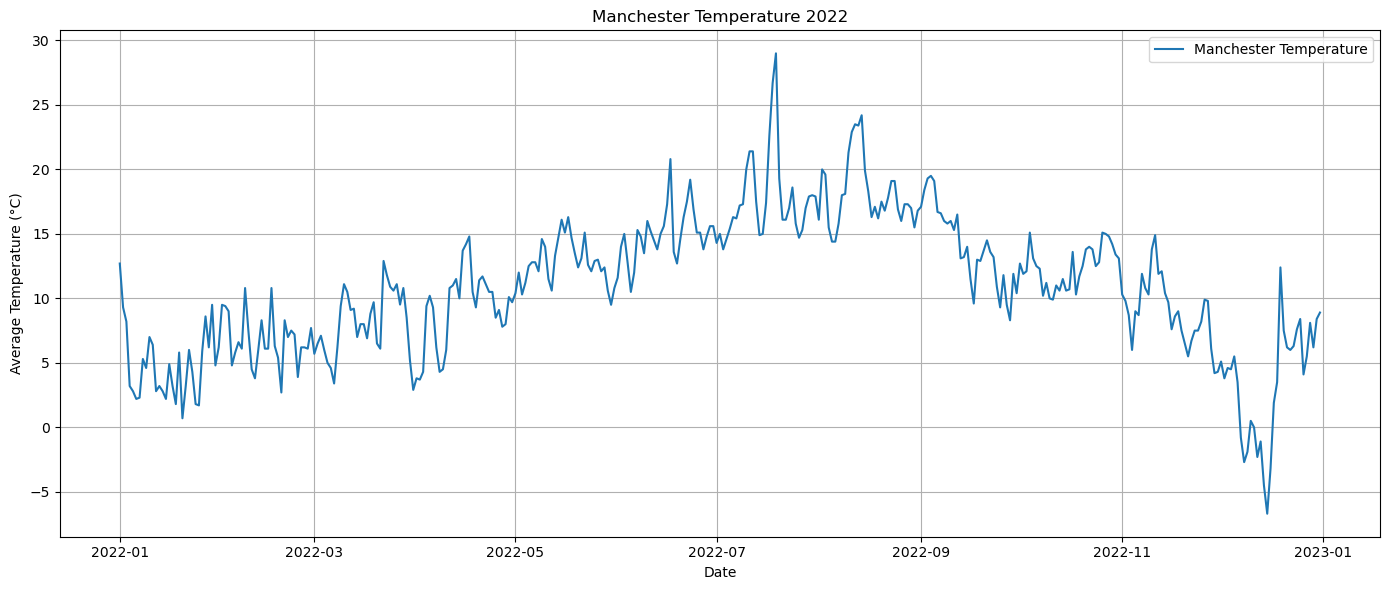

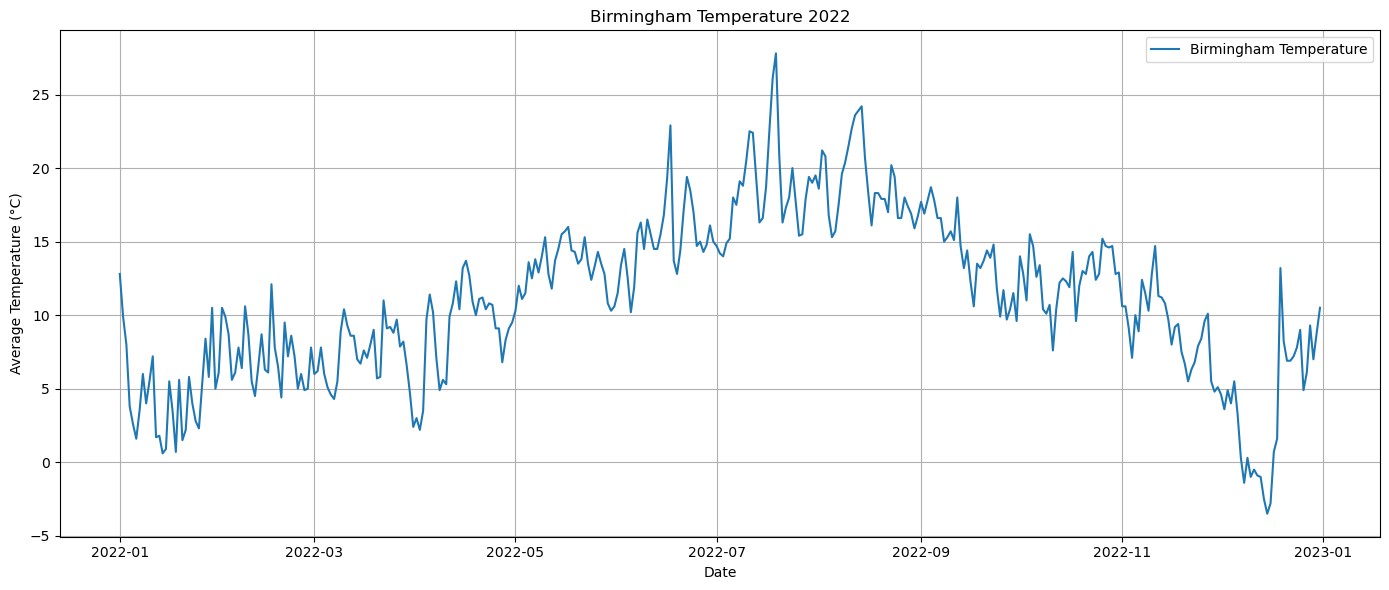

In [95]:
#Function for plotting the temperature data

def plot_temperature_and_save(dataframe, title, day_label):
    plt.figure(figsize=(14, 6))
    plt.plot(dataframe['Date'], dataframe['Average Temperature'], label=title)
    plt.title(title + ' 2022')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    
    #Save the plot as an image with the specified label
    plt.savefig(f'{day_label}.png', dpi=300, bbox_inches='tight')
    
    #Display the plot
    plt.show()

#Create a list of dataframes with their associated titles
dataframes_with_titles = [
    (CitylabsSMData, 'Manchester Temperature'),
    (CentreCitySMData, 'Birmingham Temperature')
]

#Define labels for the plots
day_labels = ['32', '33']

#Plot each dataframe using the function and corresponding label
for idx, (dataframe, title) in enumerate(dataframes_with_titles):
    plot_temperature_and_save(dataframe, title, day_labels[idx])


Combining now

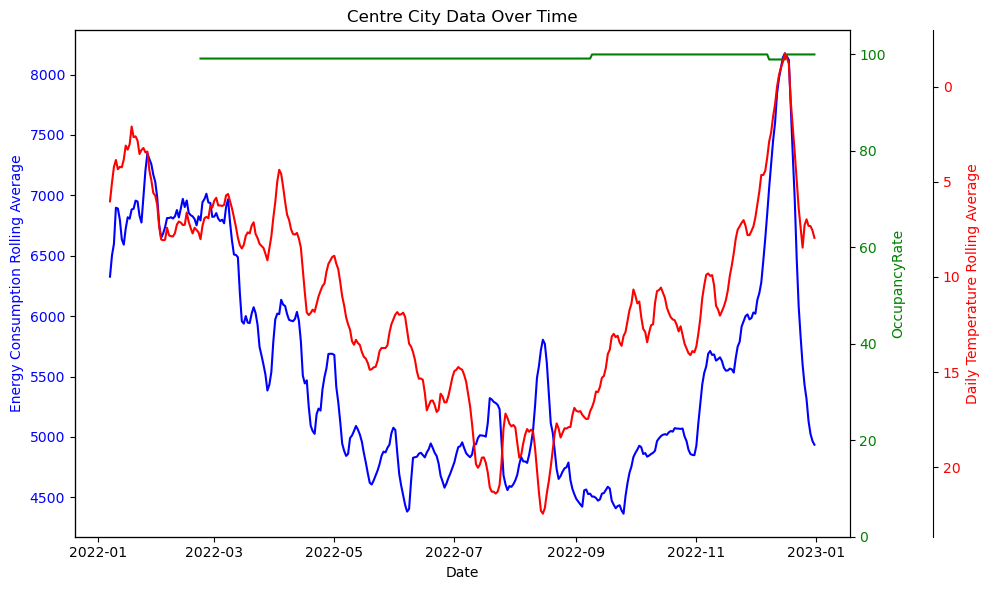

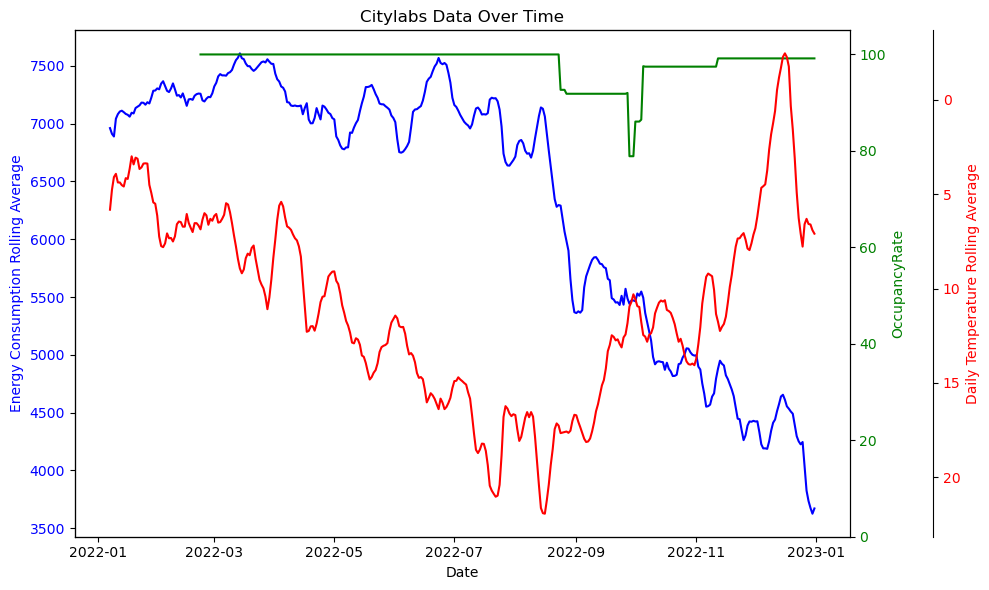

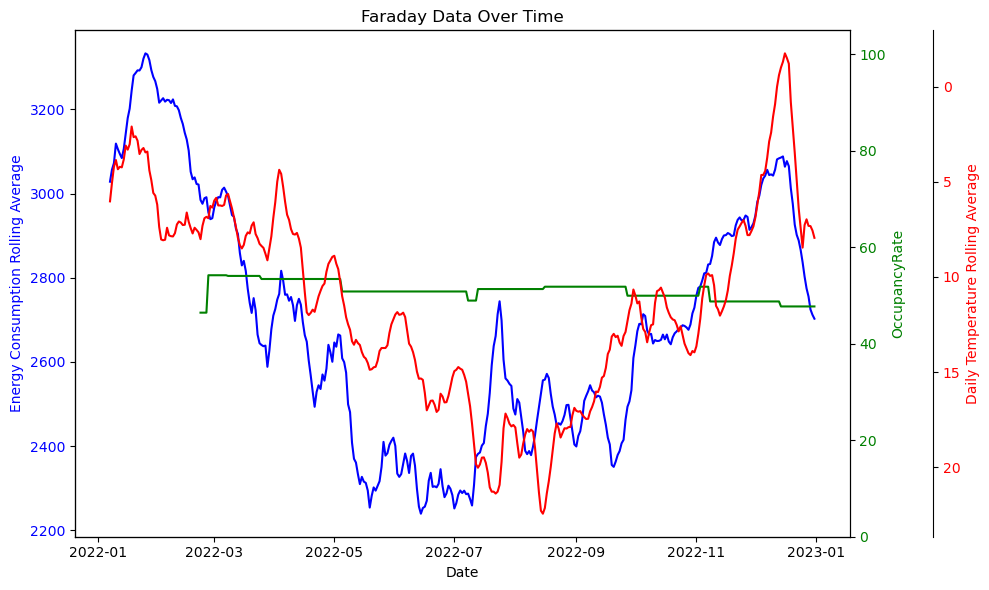

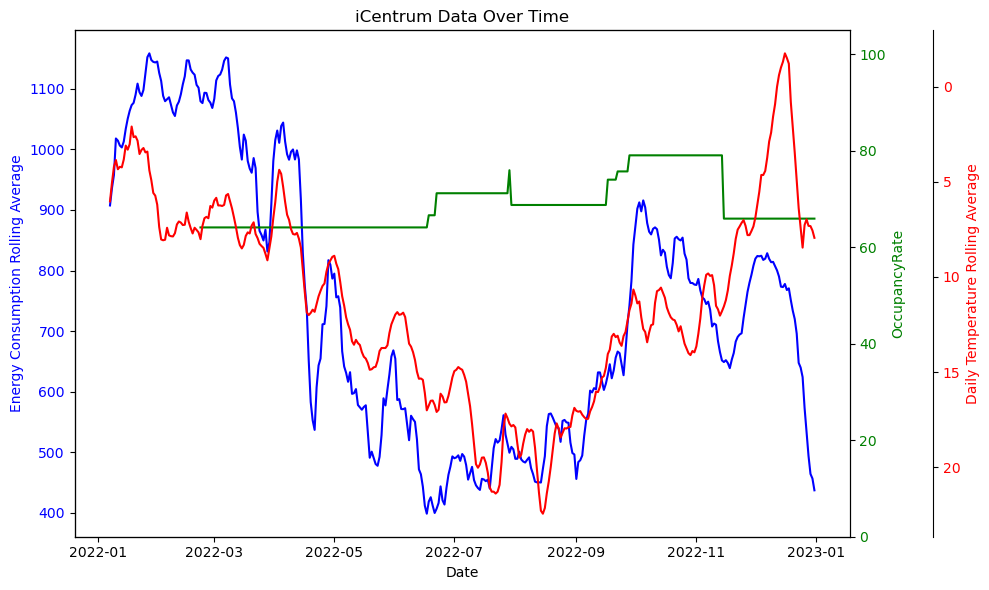

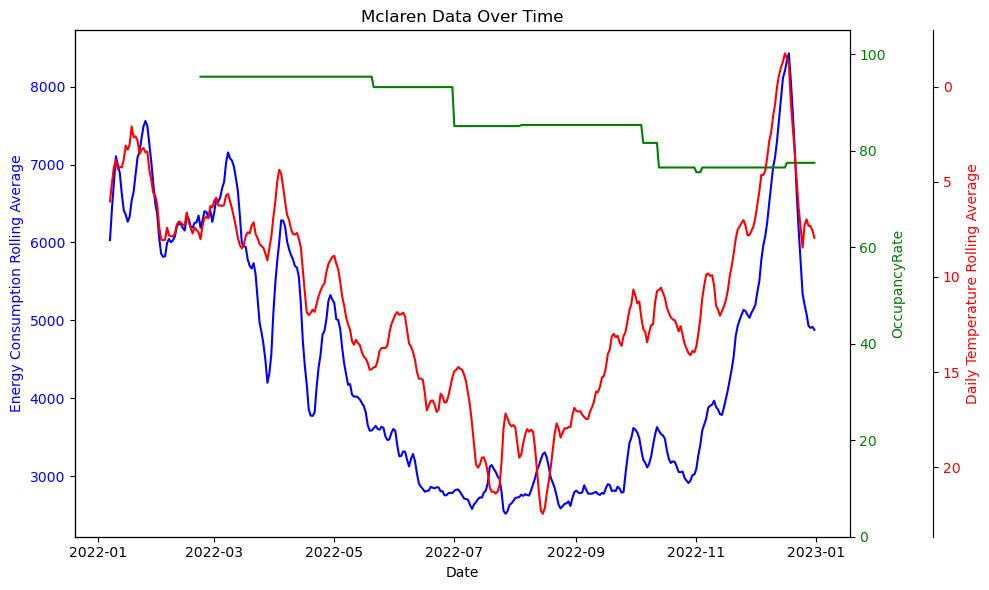

In [96]:
#Creating a fuction which combines consumption, temperature and occupancy over time

def plot_and_save_dataset(data, title, day_label):
    # xtracting relevant data
    dates = data['Date']
    rolling_avg = data['7-day-rolling-average']
    occupancy_rate = data['OccupancyPercentage'].copy()

    #Compute 7-day rolling average for Daily Temperature
    daily_temp_rolling_avg = data['Average Temperature'].rolling(window=7).mean()

    #Set occupancy rate values before 2022-02-22 to NaN
    occupancy_rate[dates < '2022-02-22'] = np.nan

    #Create the main plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    #Plotting 7-day-rolling-average
    ax1.plot(dates, rolling_avg, color='b', label='7-day-rolling-average')
    ax1.set_ylabel('Energy Consumption Rolling Average', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_xlabel('Date')
    ax1.set_title(title)

    #Plotting OccupancyRate
    ax2 = ax1.twinx()
    ax2.plot(dates, occupancy_rate, color='g', label='OccupancyRate')
    ax2.set_ylabel('OccupancyRate', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylim(0, 105)

    #Plotting Daily Temperature (7-day rolling average)
    ax3 = ax1.twinx()
    #Offset the third axis to prevent overlap
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(dates, daily_temp_rolling_avg, color='r', label='Daily Temperature (7-day avg)')
    ax3.set_ylabel('Daily Temperature Rolling Average', color='r')
    ax3.tick_params(axis='y', labelcolor='r')

    #Invert the temperature y-axis
    ax3.invert_yaxis()

    #Save the plot as an image with the specified label
    plt.savefig(f'{day_label}.png', dpi=300, bbox_inches='tight')

    #Display the plot
    plt.tight_layout()
    plt.show()

#Applying the function to each dataset
datasets_with_labels = [
    (CentreCitySMData, 'Centre City Data Over Time', '34'),
    (CitylabsSMData, 'Citylabs Data Over Time', '35'),
    (FaradaySMData, 'Faraday Data Over Time', '36'),
    (iCentrumSMData, 'iCentrum Data Over Time', '37'),
    (MclarenSMData, 'Mclaren Data Over Time', '38')
]

for data, title, day_label in datasets_with_labels:
    plot_and_save_dataset(data, title, day_label)


In [97]:
# List of all dataframes and their names
dataframes = {
    'CentreCitySMData': CentreCitySMData,
    'CitylabsSMData': CitylabsSMData,
    'FaradaySMData': FaradaySMData,
    'MclarenSMData': MclarenSMData,
    'iCentrumSMData': iCentrumSMData
}

# Loop through all dataframes and compute correlations
for name, df in dataframes.items():
    # Calculate the correlation between Total (energy) and Average Temperature
    temp_corr = df['Total'].corr(df['Average Temperature'])
    
    # Calculate the correlation between Total (energy) and OccupancyPercentage
    occupancy_corr = df['Total'].corr(df['OccupancyPercentage'])
    
    print(f"Dataset: {name}")
    print(f"Correlation between Total Energy and Average Temperature: {temp_corr:.3f}")
    print(f"Correlation between Total Energy and OccupancyPercentage: {occupancy_corr:.3f}")
    print("---------------------------------------------------------")


Dataset: CentreCitySMData
Correlation between Total Energy and Average Temperature: -0.461
Correlation between Total Energy and OccupancyPercentage: -0.308
---------------------------------------------------------
Dataset: CitylabsSMData
Correlation between Total Energy and Average Temperature: 0.182
Correlation between Total Energy and OccupancyPercentage: -0.227
---------------------------------------------------------
Dataset: FaradaySMData
Correlation between Total Energy and Average Temperature: -0.656
Correlation between Total Energy and OccupancyPercentage: -0.587
---------------------------------------------------------
Dataset: MclarenSMData
Correlation between Total Energy and Average Temperature: -0.810
Correlation between Total Energy and OccupancyPercentage: -0.438
---------------------------------------------------------
Dataset: iCentrumSMData
Correlation between Total Energy and Average Temperature: -0.570
Correlation between Total Energy and OccupancyPercentage: -0.443

In [98]:
CentreCitySMData

Site       Date  DayOfWeek  00:00      00:30  01:00  01:30  02:00  \
0    Centre City 2022-01-01   Saturday   56.9  56.000000   56.3   58.4   60.1   
1    Centre City 2022-01-02     Sunday   61.5  57.603922   58.8   57.3   56.8   
2    Centre City 2022-01-03     Monday   64.0  61.300000   66.7   67.8   69.0   
3    Centre City 2022-01-04    Tuesday   68.1  67.300000   62.5   66.4   68.2   
4    Centre City 2022-01-05  Wednesday  107.0  98.400000  104.0  106.1   97.4   
..           ...        ...        ...    ...        ...    ...    ...    ...   
360  Centre City 2022-12-27    Tuesday   72.9  72.100000   74.9   78.7   85.3   
361  Centre City 2022-12-28  Wednesday   62.2  66.500000   69.9   69.4   66.7   
362  Centre City 2022-12-29   Thursday   67.8  66.700000   65.1   68.4   72.8   
363  Centre City 2022-12-30     Friday   68.4  69.500000   66.8   72.7   71.8   
364  Centre City 2022-12-31   Saturday   67.8  66.400000   64.7   66.2   66.4   

     02:30  03:00  ...  22:00  22:30  23:00  23:30        Total  \
0     56.1   57.4  ...   62.9   59.8   66.1   62.8  3472.100000   
1     54.5   58.2  ...   66.7   65.5   67.8   62.9  2903.003922   
2     63.3   65.3  ...   63.4   63.4   72.6   68.5  5502.300000   
3     61.9   69.8  ...  103.4  101.4  107.4  107.5  7483.300000   
4     98.8  105.9  ...   92.3   93.5  102.4  103.3  8135.000000   
..     ...    ...  ...    ...    ...    ...    ...          ...   
360   83.8   77.7  ...   63.8   68.7   67.7   66.3  5512.800000   
361   64.8   64.1  ...   68.8   68.3   66.2   72.2  5173.000000   
362   70.9   62.7  ...   70.6   72.0   69.2   70.2  5314.800000   
363   72.8   68.2  ...   66.7   61.5   64.9   66.2  5638.700000   
364   63.7   62.9  ...   63.6   65.5   67.1   67.2  4179.300000   

     TotalOfficeSize  TotalOccupiedOfficeSize  OccupancyPercentage  \
0                  0                        0                  0.0   
1                  0                        0                  0.0   
2                  0                        0                  0.0   
3                  0                        0                  0.0   
4                  0                        0                  0.0   
..               ...                      ...                  ...   
360           224083                   224083                100.0   
361           224083                   224083                100.0   
362           224083                   224083                100.0   
363           224083                   224083                100.0   
364           224083                   224083                100.0   

     Average Temperature  7-day-rolling-average  
0                   12.8                    NaN  
1                    9.9                    NaN  
2                    8.0                    NaN  
3                    3.8                    NaN  
4                    2.6                    NaN  
..                   ...                    ...  
360                  6.1            5312.100000  
361                  9.3            5132.371429  
362                  7.0            5025.900000  
363                  8.8            4966.842857  
364                 10.5            4935.457143  

[365 rows x 57 columns]

# Feature Importance

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

datasets = {
    'CentreCitySMData': CentreCitySMData,
    'CitylabsSMData': CitylabsSMData,
    'FaradaySMData': FaradaySMData,
    'iCentrumSMData': iCentrumSMData,
    'MclarenSMData': MclarenSMData
}

def process_data(data):
    #Filter the date
    data = data[data['Date'] >= '2022-02-22']

    #Retain necessary columns
    data = data[['Date', 'DayOfWeek', 'Average Temperature', 'OccupancyPercentage', 'Total']]

    #Convert DayOfWeek to 'Weekend' dummy variable
    data['Weekend'] = data['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

    #Extract month and one-hot encode
    data['Month'] = data['Date'].dt.month
    encoder = OneHotEncoder(sparse=False)
    month_encoded = encoder.fit_transform(data[['Month']])
    month_cols = [f'month_{month_name}' for month_name in encoder.categories_[0]]
    month_df = pd.DataFrame(month_encoded, columns=month_cols)

    #Reset the index
    data.reset_index(drop=True, inplace=True)

    #Concatenate
    data = pd.concat([data, month_df], axis=1)
    data = data.drop(columns=['Date', 'DayOfWeek', 'Month'])

    X = data.drop('Total', axis=1)
    y = data['Total']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, predictions))
    mape = mean_absolute_percentage_error(y_test, predictions)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    })
    
    month_importances = importance_df[importance_df['Feature'].str.startswith('month_')]
    total_month_importance = month_importances['Importance'].sum()

    importance_df = importance_df[~importance_df['Feature'].str.startswith('month_')]
    importance_df = importance_df.append({'Feature': 'Month', 'Importance': total_month_importance}, ignore_index=True)
    
    importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    return importance_df, rmse, mape

results = {}
for name, dataset in datasets.items():
    results[name] = process_data(dataset)

for name, (importance_df, rmse, mape) in results.items():
    print(f"{name} Feature Importances:")
    print(importance_df)
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print("------------------------------\n")



C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3779851755.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_df = importance_df.append({'Feature': 'Month', 'Importance': total_month_importance}, ignore_index=True)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3779851755.py:66: FutureWarning: The frame.append method is

CentreCitySMData Feature Importances:
               Feature  Importance
0              Weekend    0.564662
1  Average Temperature    0.359560
2                Month    0.058452
3  OccupancyPercentage    0.017326
RMSE: 501.5748
MAPE: 8.4525
------------------------------

CitylabsSMData Feature Importances:
               Feature  Importance
0  OccupancyPercentage    0.732292
1              Weekend    0.142788
2  Average Temperature    0.095512
3                Month    0.029408
RMSE: 323.4564
MAPE: 3.7819
------------------------------

FaradaySMData Feature Importances:
               Feature  Importance
0  Average Temperature    0.622426
1  OccupancyPercentage    0.140310
2              Weekend    0.130717
3                Month    0.106546
RMSE: 152.9827
MAPE: 4.5968
------------------------------

iCentrumSMData Feature Importances:
               Feature  Importance
0  Average Temperature    0.476408
1              Weekend    0.304651
2                Month    0.146384
3  Occupan

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3779851755.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_df = importance_df.append({'Feature': 'Month', 'Importance': total_month_importance}, ignore_index=True)


# Forecasts

Weather - Manchester

In [100]:
from fbprophet import Prophet

#Filling in NaN

nan_indices = ManchesterWeatherData[ManchesterWeatherData['tavg'].isna()].index.tolist()

for target_index in nan_indices:
    #Create a rolling window centered on the target date (3 days before and after)
    window = ManchesterWeatherData.loc[target_index-3:target_index+3, 'tavg']
    
    #Calculate the mean of the window (excluding the target date)
    mean = window[window.index != target_index].mean()
    
    #Fill the NaN value
    ManchesterWeatherData.loc[target_index, 'tavg'] = mean


nan_indices = BirminghamWeatherData[BirminghamWeatherData['tavg'].isna()].index.tolist()

for target_index in nan_indices:
    #Create a rolling window centered on the target date (3 days before and after)
    window = BirminghamWeatherData.loc[target_index-3:target_index+3, 'tavg']
    
    #Calculate the mean of the window (excluding the target date)
    mean = window[window.index != target_index].mean()
    
    #Fill the NaN value
    BirminghamWeatherData.loc[target_index, 'tavg'] = mean
    

#Splitting into test and train

train = ManchesterWeatherData[ManchesterWeatherData['date'] < '2022-12-18']
test = ManchesterWeatherData[(ManchesterWeatherData['date'] >= '2022-12-18') & (ManchesterWeatherData['date'] <= '2022-12-31')]

train_prophet = train[['date', 'tavg']].rename(columns={'date': 'ds', 'tavg': 'y'})

#Creating the Prophet model
model = Prophet(interval_width=0.95)
#Fit the model
model.fit(train_prophet)

future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

predicted_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat']

rmse = np.sqrt(mean_squared_error(test['tavg'], predicted_values))
print("RMSE:", rmse)

mape = np.mean(np.abs((test['tavg'] - predicted_values) / test['tavg'])) * 100
print("MAPE:", mape)


C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\na

RMSE: 5.159028166166881
MAPE: 61.26592312518547


In [101]:
#Extracting the predicted values and their 95% uncertainty interval for the test period
predicted_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat']
lower_bound_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat_lower']
upper_bound_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat_upper']

#Creating a comparison dataframe
comparison_df = test[['date', 'tavg']].copy()
comparison_df['predicted'] = predicted_values.values
comparison_df['lower_bound_95%'] = lower_bound_values.values
comparison_df['upper_bound_95%'] = upper_bound_values.values

print(comparison_df)

          date  tavg  predicted  lower_bound_95%  upper_bound_95%
351 2022-12-18   3.5   3.448058        -1.978523         8.942251
352 2022-12-19  12.4   3.267453        -1.924684         8.934988
353 2022-12-20   7.5   3.247883        -1.986849         8.570704
354 2022-12-21   6.2   2.891734        -2.347238         8.164666
355 2022-12-22   6.0   2.354345        -2.846044         7.580070
356 2022-12-23   6.3   2.332371        -3.252540         7.878477
357 2022-12-24   7.6   2.585551        -2.564831         8.071577
358 2022-12-25   8.4   2.570497        -3.038445         7.856753
359 2022-12-26   4.1   2.389893        -3.212874         7.710533
360 2022-12-27   5.5   2.370322        -2.788323         7.437998
361 2022-12-28   8.1   2.014173        -3.113348         7.592144
362 2022-12-29   6.2   1.476784        -3.845478         6.609751
363 2022-12-30   8.4   1.454810        -3.805484         7.095996
364 2022-12-31   8.9   1.707990        -3.689634         7.108258


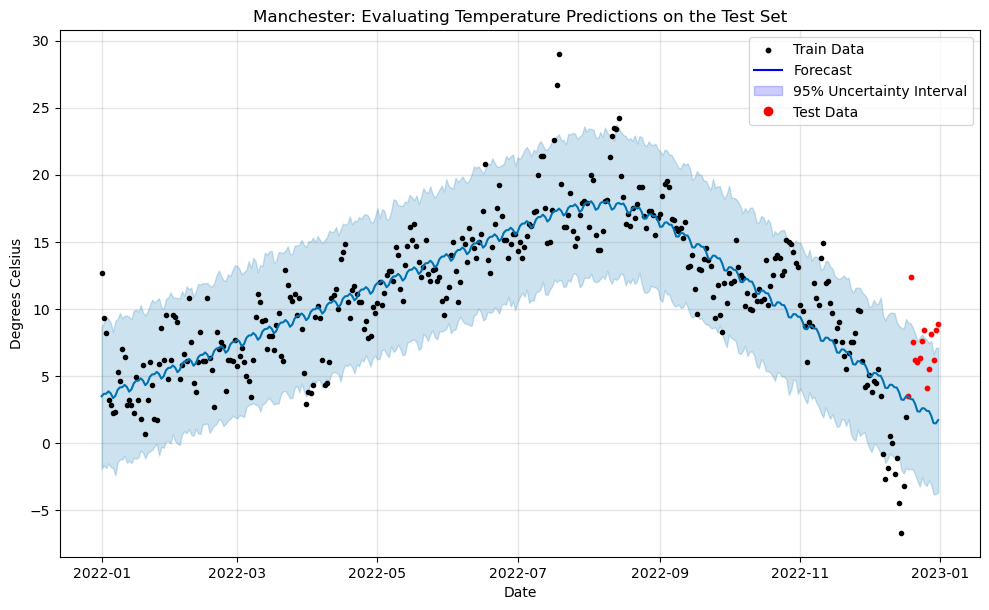

In [102]:
#Use Prophet's built-in plot function
fig = model.plot(forecast, figsize=(10, 6))

#Highlight the test data points in red with smaller size
plt.scatter(test['date'], test['tavg'], color='red', s=10, label='Test Data')

#Add legends for train data, forecast, and uncertainty interval
#Since Prophet doesn't provide direct handles for these, we're adding custom legends
train_legend = plt.scatter([], [], color='black', s=10, label='Train Data')
forecast_legend = plt.Line2D([], [], color='blue', label='Forecast')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='95% Uncertainty Interval')

#Add these custom legends to the plot
plt.legend(handles=[train_legend, forecast_legend, uncertainty_legend, plt.Line2D([], [], color='red', marker='o', linestyle='', label='Test Data')])

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Degrees Celsius')
plt.title('Manchester: Evaluating Temperature Predictions on the Test Set')
plt.savefig('39.png', dpi=300, bbox_inches='tight')

plt.show()

In [103]:
#Combine train and test data
full_data = pd.concat([train, test])

#Prepare data for Prophet
full_data_prophet = full_data[['date', 'tavg']].rename(columns={'date': 'ds', 'tavg': 'y'})

#Train the Prophet model on the full data
model_full = Prophet(interval_width=0.95)
model_full.fit(full_data_prophet)

#Generate a future dataframe for the first 14 days of 2023
future_2023 = model_full.make_future_dataframe(periods=14, include_history=False)

#Predict for this future period
forecast_2023 = model_full.predict(future_2023)

#Extract the relevant columns for the table
forecast_2023_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2023_df.columns = ['date', 'predicted', 'lower_bound_95%', 'upper_bound_95%']

print(forecast_2023_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


         date  predicted  lower_bound_95%  upper_bound_95%
0  2023-01-01   3.539363        -1.915101         9.028188
1  2023-01-02   3.470706        -2.193936         8.983522
2  2023-01-03   3.407492        -2.234296         9.060364
3  2023-01-04   3.099693        -2.328402         8.676622
4  2023-01-05   2.546308        -3.229378         8.410614
5  2023-01-06   2.595723        -2.981046         8.445233
6  2023-01-07   2.877506        -2.603123         8.634690
7  2023-01-08   2.804617        -2.841118         8.491488
8  2023-01-09   2.735959        -2.801508         8.465157
9  2023-01-10   2.672746        -2.843075         8.128840
10 2023-01-11   2.364947        -3.514524         7.670881
11 2023-01-12   1.811562        -3.590788         7.366107
12 2023-01-13   1.860976        -3.333875         7.943061
13 2023-01-14   2.142760        -3.530077         7.528089


In [104]:
#Adding predicted values in
ManchesterTemperatureForecastsLst = forecast_2023_df['predicted'].tolist()

C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


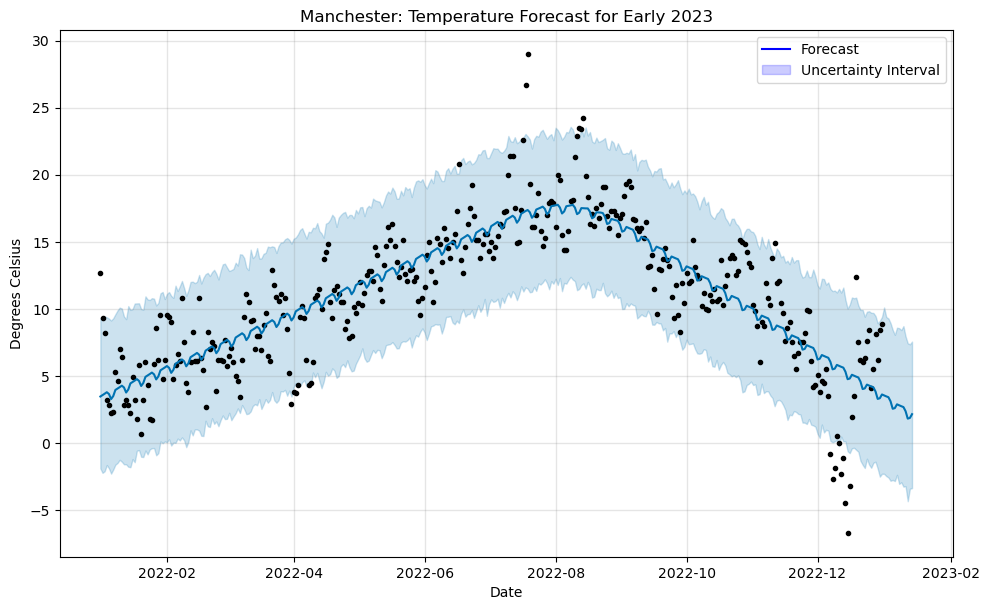

In [105]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model_full.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model_full.predict(future_combined)

#Plotting the forecast using Prophet's built-in function
fig2 = model_full.plot(forecast_combined, figsize=(10, 6))

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Degrees Celsius')
plt.title('Manchester: Temperature Forecast for Early 2023')

#Adding custom legends for forecast and uncertainty interval
forecast_legend = plt.Line2D([], [], color='blue', label='Forecast')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

#Add these custom legends to the plot
plt.legend(handles=[forecast_legend, uncertainty_legend])

plt.savefig('40.png', dpi=300, bbox_inches='tight')
plt.show()


Weather Birmingham

In [106]:
#Splitting into test and train
train = BirminghamWeatherData[ManchesterWeatherData['date'] < '2022-12-18']
test = BirminghamWeatherData[(ManchesterWeatherData['date'] >= '2022-12-18') & (BirminghamWeatherData['date'] <= '2022-12-31')]

train_prophet = train[['date', 'tavg']].rename(columns={'date': 'ds', 'tavg': 'y'})

#Create a Prophet model
model = Prophet(interval_width=0.95)
#Fit the model
model.fit(train_prophet)

future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

predicted_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat']

rmse = np.sqrt(mean_squared_error(test['tavg'], predicted_values))
print("RMSE:", rmse)

mape = np.mean(np.abs((test['tavg'] - predicted_values) / test['tavg'])) * 100
print("MAPE:", mape)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


RMSE: 5.704668180986151
MAPE: 69.91746003117062


In [107]:
#Extracting the predicted values and their 95% uncertainty interval for the test period
predicted_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat']
lower_bound_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat_lower']
upper_bound_values = forecast.loc[forecast['ds'].isin(test['date']), 'yhat_upper']

#Creating a comparison dataframe
comparison_df = test[['date', 'tavg']].copy()
comparison_df['predicted'] = predicted_values.values
comparison_df['lower_bound_95%'] = lower_bound_values.values
comparison_df['upper_bound_95%'] = upper_bound_values.values

print(comparison_df)

          date  tavg  predicted  lower_bound_95%  upper_bound_95%
351 2022-12-18   1.6   3.499264        -1.690778         8.799103
352 2022-12-19  13.2   3.477157        -1.433486         8.424834
353 2022-12-20   8.2   3.423399        -1.751322         9.073999
354 2022-12-21   6.9   3.264969        -1.847217         8.430844
355 2022-12-22   6.9   2.726525        -2.651089         7.962626
356 2022-12-23   7.2   2.608453        -2.342164         7.862561
357 2022-12-24   7.8   2.743359        -2.319965         7.878605
358 2022-12-25   9.0   2.622705        -2.645618         7.462415
359 2022-12-26   4.9   2.600598        -2.568088         7.866751
360 2022-12-27   6.1   2.546840        -2.911501         7.632033
361 2022-12-28   9.3   2.388410        -3.061006         7.561131
362 2022-12-29   7.0   1.849966        -3.425235         6.792968
363 2022-12-30   8.8   1.731894        -3.914103         6.513211
364 2022-12-31  10.5   1.866800        -3.329804         6.842611


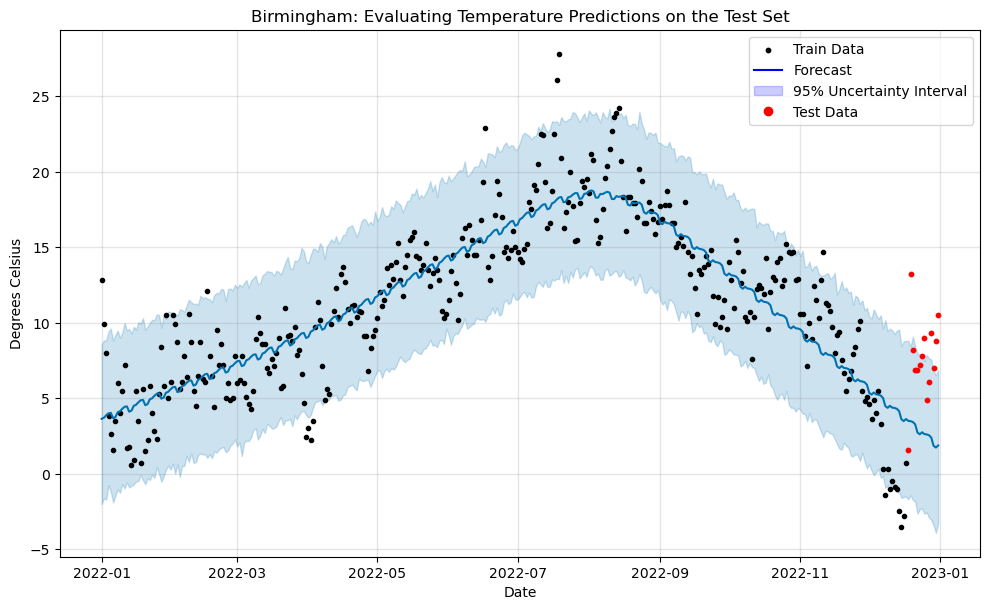

In [108]:
#Use Prophet's built-in plot function
fig = model.plot(forecast, figsize=(10, 6))

#Highlight the test data points in red with smaller size
plt.scatter(test['date'], test['tavg'], color='red', s=10, label='Test Data')

#Add legends for train data, forecast, and uncertainty interval
#Since Prophet doesn't provide direct handles for these, we're adding custom legends
train_legend = plt.scatter([], [], color='black', s=10, label='Train Data')
forecast_legend = plt.Line2D([], [], color='blue', label='Forecast')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='95% Uncertainty Interval')

#Add these custom legends to the plot
plt.legend(handles=[train_legend, forecast_legend, uncertainty_legend, plt.Line2D([], [], color='red', marker='o', linestyle='', label='Test Data')])

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Degrees Celsius')
plt.title('Birmingham: Evaluating Temperature Predictions on the Test Set')
plt.savefig('41.png', dpi=300, bbox_inches='tight')

plt.show()

In [109]:
#Combine train and test data
full_data = pd.concat([train, test])

#Prepare data for Prophet
full_data_prophet = full_data[['date', 'tavg']].rename(columns={'date': 'ds', 'tavg': 'y'})

#Train the Prophet model on the full data
model_full = Prophet(interval_width=0.95)
model_full.fit(full_data_prophet)

#Generate a future dataframe for the first 14 days of 2023
future_2023 = model_full.make_future_dataframe(periods=14, include_history=False)

#Predict for this future period
forecast_2023 = model_full.predict(future_2023)

#Extract the relevant columns for the table
forecast_2023_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2023_df.columns = ['date', 'predicted', 'lower_bound_95%', 'upper_bound_95%']

print(forecast_2023_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


         date  predicted  lower_bound_95%  upper_bound_95%
0  2023-01-01   3.554876        -1.807594         8.866999
1  2023-01-02   3.691918        -1.798702         9.295291
2  2023-01-03   3.581184        -2.037334         8.963905
3  2023-01-04   3.478150        -2.086398         8.776437
4  2023-01-05   2.927733        -2.638317         8.424265
5  2023-01-06   2.868096        -2.403494         8.325863
6  2023-01-07   3.060708        -2.356702         8.332019
7  2023-01-08   2.813916        -2.563619         7.987712
8  2023-01-09   2.950958        -2.644911         8.675533
9  2023-01-10   2.840224        -2.775475         8.768574
10 2023-01-11   2.737189        -2.867329         8.286244
11 2023-01-12   2.186773        -2.986765         7.494965
12 2023-01-13   2.127135        -3.457804         8.172623
13 2023-01-14   2.319747        -3.171678         7.755426


In [110]:
#Adding in predicted Birmingham values
BirminghamTemperatureForecastsLst = forecast_2023_df['predicted'].tolist()

C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


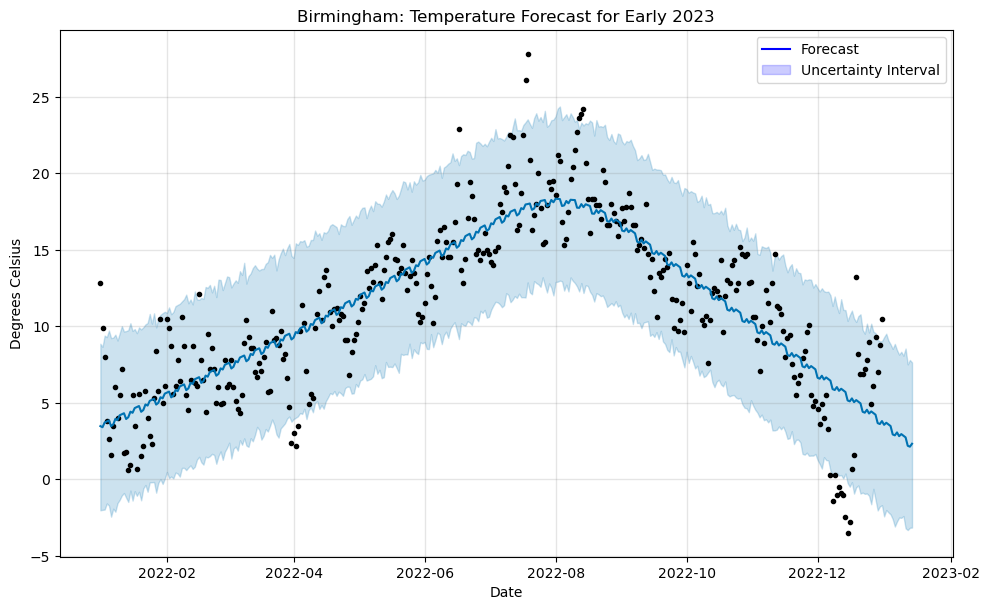

In [111]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model_full.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model_full.predict(future_combined)

#Plotting the forecast using Prophet's built-in function
fig2 = model_full.plot(forecast_combined, figsize=(10, 6))

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Degrees Celsius')
plt.title('Birmingham: Temperature Forecast for Early 2023')

#Adding custom legends for forecast and uncertainty interval
forecast_legend = plt.Line2D([], [], color='blue', label='Forecast')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

#Add these custom legends to the plot
plt.legend(handles=[forecast_legend, uncertainty_legend])

plt.savefig('42.png', dpi=300, bbox_inches='tight')
plt.show()


Now, for occupancy

Centre City

In [112]:
CentreCitySMData['Date'] = pd.to_datetime(CentreCitySMData['Date'])  # Convert 'Date' column to datetime format

#Data Filtering
CentreCitySMData = CentreCitySMData[CentreCitySMData['Date'] > '2022-02-21']

#Train-Test Split
train = CentreCitySMData.iloc[:-14]
test = CentreCitySMData.iloc[-14:]

#Prophet Modeling
#Prepare data for Prophet
prophet_data = train[['Date', 'OccupancyPercentage']]
prophet_data.columns = ['ds', 'y']

model = Prophet(interval_width=0.95)  # 95% prediction intervals
model.fit(prophet_data)

future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

#Extract predictions for the last 14 days
predictions = forecast.tail(14)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

#Clip the predictions and upper bounds to 100
predictions['yhat'] = predictions['yhat'].clip(upper=100)
predictions['yhat_upper'] = predictions['yhat_upper'].clip(upper=100)

#Comparison
result = test[['Date', 'OccupancyPercentage']].copy()
result.columns = ['Date', 'Real Value']
result['Predicted Value'] = predictions['yhat'].values
result['Lower Bound'] = predictions['yhat_lower'].values
result['Upper Bound'] = predictions['yhat_upper'].values

print(result)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


          Date  Real Value  Predicted Value  Lower Bound  Upper Bound
351 2022-12-18       100.0        99.494536    99.203547    99.786328
352 2022-12-19       100.0        99.481760    99.190567    99.768769
353 2022-12-20       100.0        99.469952    99.166618    99.766767
354 2022-12-21       100.0        99.458844    99.165569    99.730681
355 2022-12-22       100.0        99.422140    99.128738    99.705308
356 2022-12-23       100.0        99.429468    99.135957    99.726174
357 2022-12-24       100.0        99.441306    99.145772    99.742940
358 2022-12-25       100.0        99.417077    99.121895    99.709152
359 2022-12-26       100.0        99.404301    99.090112    99.705521
360 2022-12-27       100.0        99.392493    99.077236    99.688441
361 2022-12-28       100.0        99.381385    99.081169    99.686092
362 2022-12-29       100.0        99.344681    99.028911    99.646351
363 2022-12-30       100.0        99.352010    99.015527    99.704577
364 2022-12-31      

In [113]:
import numpy as np
from sklearn.metrics import mean_squared_error

#Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculating RMSE
result = test[['Date', 'OccupancyPercentage']].copy()
result['Predicted'] = predictions['yhat'].values

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(result['OccupancyPercentage'], result['Predicted']))
print(f"RMSE: {rmse:.2f}")

#Calculate MAPE
mape = mean_absolute_percentage_error(result['OccupancyPercentage'], result['Predicted'])
print(f"MAPE: {mape:.2f}%")



RMSE: 0.58
MAPE: 0.58%


C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


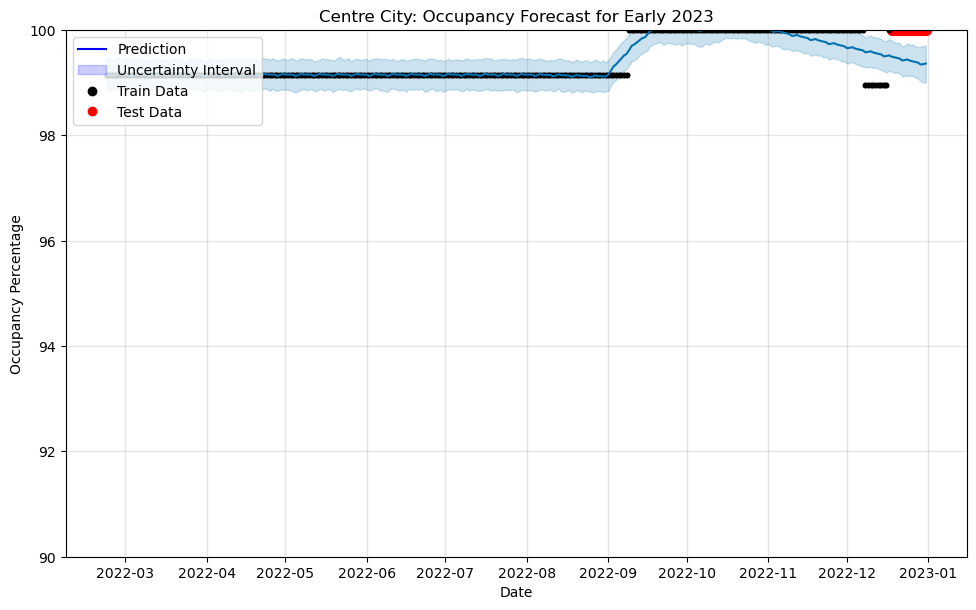

In [114]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model.plot(forecast_combined, figsize=(10, 6))

#Overlaying the actual data points (both train and test)
plt.scatter(train['Date'], train['OccupancyPercentage'], color='black', s=10, label='Train Data')
plt.scatter(test['Date'], test['OccupancyPercentage'], color='red', s=50, label='Test Data')

forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

#Adjust the y-axis
plt.ylim(90, 100)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend, plt.Line2D([], [], color='black', marker='o', linestyle='', label='Train Data'), plt.Line2D([], [], color='red', marker='o', linestyle='', label='Test Data')], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Centre City: Occupancy Forecast for Early 2023')
plt.savefig('43.png', dpi=300, bbox_inches='tight')

plt.show()



In [115]:
#Filter data to keep only records after 2022-02-21
CentreCitySMData = CentreCitySMData[CentreCitySMData['Date'] > '2022-02-21']

#Combine train and test data
full_data = pd.concat([train, test])

#Prepare data for Prophet
full_data_prophet = full_data[['Date', 'OccupancyPercentage']].rename(columns={'Date': 'ds', 'OccupancyPercentage': 'y'})

#Train the Prophet model on the full data
model_full = Prophet(interval_width=0.95)
model_full.fit(full_data_prophet)

#Generate a future dataframe for the first 14 days of 2023
future_2023 = model_full.make_future_dataframe(periods=14, include_history=False)

#Predict for this future period
forecast_2023 = model_full.predict(future_2023)
forecast_2023['yhat'] = forecast_2023['yhat'].clip(upper=100)
forecast_2023['yhat_upper'] = forecast_2023['yhat_upper'].clip(upper=100)

#Extract the relevant columns for the table
forecast_2023_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2023_df.columns = ['Date', 'Predicted', 'Lower Bound 95%', 'Upper Bound 95%']

print(forecast_2023_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


         Date  Predicted  Lower Bound 95%  Upper Bound 95%
0  2023-01-01  99.695783        99.342105       100.000000
1  2023-01-02  99.688942        99.355585       100.000000
2  2023-01-03  99.683069        99.354863       100.000000
3  2023-01-04  99.676288        99.365440       100.000000
4  2023-01-05  99.646312        99.302755        99.997139
5  2023-01-06  99.658426        99.368160       100.000000
6  2023-01-07  99.674844        99.319858        99.984548
7  2023-01-08  99.661400        99.300293       100.000000
8  2023-01-09  99.654559        99.318766       100.000000
9  2023-01-10  99.648686        99.311177        99.995727
10 2023-01-11  99.641905        99.322547        99.993333
11 2023-01-12  99.611929        99.228077        99.971059
12 2023-01-13  99.624043        99.299030        99.985932
13 2023-01-14  99.640461        99.294330        99.992332


In [116]:
#Adding in predictions
CentreCityOccupancyForecastsLst = forecast_2023_df['Predicted'].tolist()

C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


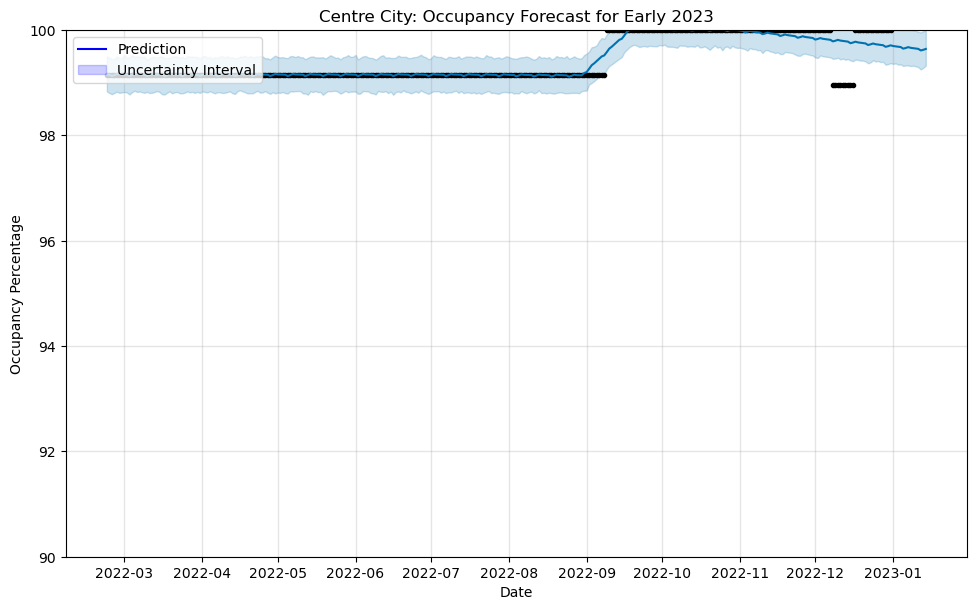

In [117]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model_full.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model_full.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model_full.plot(forecast_combined, figsize=(10, 6))

#Create custom legend items
forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

plt.ylim(90, 100)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Centre City: Occupancy Forecast for Early 2023')
plt.savefig('44.png', dpi=300, bbox_inches='tight')

plt.show()


In [118]:
#Now for Citylabs

#Data filtering
CitylabsSMData = CitylabsSMData[CitylabsSMData['Date'] > '2022-02-21']

#Train-Test Split
train = CitylabsSMData.iloc[:-14]
test = CitylabsSMData.iloc[-14:]

#Prophet Modeling
#Prepare data for Prophet
prophet_data = train[['Date', 'OccupancyPercentage']]
prophet_data.columns = ['ds', 'y']

model = Prophet(interval_width=0.95)  # 95% prediction intervals
model.fit(prophet_data)

future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

#Extract predictions for the last 14 days
predictions = forecast.tail(14)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

#Clip the predictions and upper bounds to 100
predictions['yhat'] = predictions['yhat'].clip(upper=100)
predictions['yhat_upper'] = predictions['yhat_upper'].clip(upper=100)

#Comparison
result = test[['Date', 'OccupancyPercentage']].copy()
result.columns = ['Date', 'Real Value']
result['Predicted Value'] = predictions['yhat'].values
result['Lower Bound'] = predictions['yhat_lower'].values
result['Upper Bound'] = predictions['yhat_upper'].values

print(result)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


          Date  Real Value  Predicted Value  Lower Bound  Upper Bound
351 2022-12-18   99.180998            100.0    96.974460        100.0
352 2022-12-19   99.180998            100.0    96.708380        100.0
353 2022-12-20   99.180998            100.0    97.193258        100.0
354 2022-12-21   99.180998            100.0    96.934253        100.0
355 2022-12-22   99.180998            100.0    97.021935        100.0
356 2022-12-23   99.180998            100.0    97.145706        100.0
357 2022-12-24   99.180998            100.0    97.008818        100.0
358 2022-12-25   99.180998            100.0    97.545578        100.0
359 2022-12-26   99.180998            100.0    97.386934        100.0
360 2022-12-27   99.180998            100.0    97.659954        100.0
361 2022-12-28   99.180998            100.0    97.441096        100.0
362 2022-12-29   99.180998            100.0    97.525054        100.0
363 2022-12-30   99.180998            100.0    97.396174        100.0
364 2022-12-31   99.

In [119]:
import numpy as np
from sklearn.metrics import mean_squared_error

#Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculating RMSE
result = test[['Date', 'OccupancyPercentage']].copy()
result['Predicted'] = predictions['yhat'].values

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(result['OccupancyPercentage'], result['Predicted']))
print(f"RMSE: {rmse:.2f}")

#Calculate MAPE
mape = mean_absolute_percentage_error(result['OccupancyPercentage'], result['Predicted'])
print(f"MAPE: {mape:.2f}%")



RMSE: 0.82
MAPE: 0.83%


C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


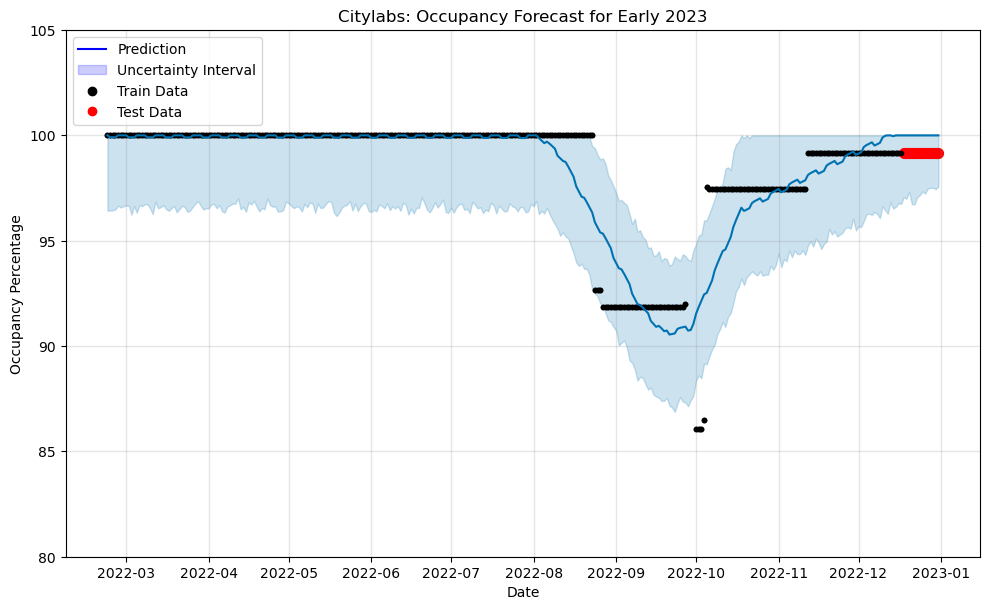

In [120]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model.plot(forecast_combined, figsize=(10, 6))

#Overlaying the actual data points (both train and test)
plt.scatter(train['Date'], train['OccupancyPercentage'], color='black', s=10, label='Train Data')
plt.scatter(test['Date'], test['OccupancyPercentage'], color='red', s=50, label='Test Data')

forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

#Adjust the y-axis
plt.ylim(80, 105)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend, plt.Line2D([], [], color='black', marker='o', linestyle='', label='Train Data'), plt.Line2D([], [], color='red', marker='o', linestyle='', label='Test Data')], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Citylabs: Occupancy Forecast for Early 2023')
plt.savefig('45.png', dpi=300, bbox_inches='tight')

plt.show()


In [121]:
#Filter data to keep only records after 2022-02-21
CitylabsSMData = CitylabsSMData[CitylabsSMData['Date'] > '2022-02-21']

#Combine train and test data
full_data = pd.concat([train, test])

#Prepare data for Prophet
full_data_prophet = full_data[['Date', 'OccupancyPercentage']].rename(columns={'Date': 'ds', 'OccupancyPercentage': 'y'})

#Train the Prophet model on the full data
model_full = Prophet(interval_width=0.95)
model_full.fit(full_data_prophet)

#Generate a future dataframe for the first 14 days of 2023
future_2023 = model_full.make_future_dataframe(periods=14, include_history=False)

#Predict for this future period
forecast_2023 = model_full.predict(future_2023)
forecast_2023['yhat'] = forecast_2023['yhat'].clip(upper=100)
forecast_2023['yhat_upper'] = forecast_2023['yhat_upper'].clip(upper=100)


#Extract the relevant columns for the table
forecast_2023_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2023_df.columns = ['Date', 'Predicted', 'Lower Bound 95%', 'Upper Bound 95%']

print(forecast_2023_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


         Date   Predicted  Lower Bound 95%  Upper Bound 95%
0  2023-01-01  100.000000        96.491884            100.0
1  2023-01-02  100.000000        96.595310            100.0
2  2023-01-03  100.000000        96.694379            100.0
3  2023-01-04   99.903615        96.273345            100.0
4  2023-01-05   99.938611        96.333315            100.0
5  2023-01-06   99.970501        96.408551            100.0
6  2023-01-07  100.000000        96.604697            100.0
7  2023-01-08  100.000000        96.947827            100.0
8  2023-01-09  100.000000        96.813467            100.0
9  2023-01-10  100.000000        96.651017            100.0
10 2023-01-11  100.000000        96.888584            100.0
11 2023-01-12  100.000000        96.777227            100.0
12 2023-01-13  100.000000        96.629687            100.0
13 2023-01-14  100.000000        97.025152            100.0


In [122]:
#Adding forecasts
CitylabsOccupancyForecastsLst = forecast_2023_df['Predicted'].tolist()

C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


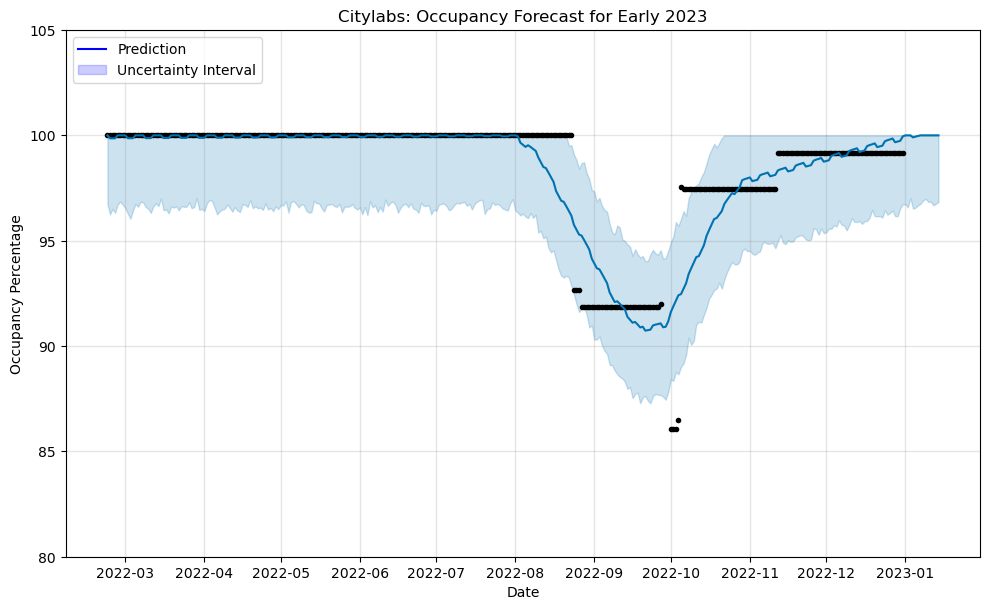

In [123]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model_full.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model_full.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model_full.plot(forecast_combined, figsize=(10, 6))

#Create custom legend items
forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

plt.ylim(80, 105)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Citylabs: Occupancy Forecast for Early 2023')
plt.savefig('46.png', dpi=300, bbox_inches='tight')

plt.show()


In [124]:
#Now for Faraday

#Data Filtering
FaradaySMData = FaradaySMData[FaradaySMData['Date'] > '2022-02-21']

#Train-Test Split
train = FaradaySMData.iloc[:-14]
test = FaradaySMData.iloc[-14:]

#Prophet Modeling
#Prepare data for Prophet
prophet_data = train[['Date', 'OccupancyPercentage']]
prophet_data.columns = ['ds', 'y']

model = Prophet(interval_width=0.95)  # 95% prediction intervals
model.fit(prophet_data)

future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

#Extract predictions for the last 14 days
predictions = forecast.tail(14)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

#Clip the predictions and upper bounds to 100
predictions['yhat'] = predictions['yhat'].clip(upper=100)
predictions['yhat_upper'] = predictions['yhat_upper'].clip(upper=100)

#Comparison
result = test[['Date', 'OccupancyPercentage']].copy()
result.columns = ['Date', 'Real Value']
result['Predicted Value'] = predictions['yhat'].values
result['Lower Bound'] = predictions['yhat_lower'].values
result['Upper Bound'] = predictions['yhat_upper'].values

print(result)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


          Date  Real Value  Predicted Value  Lower Bound  Upper Bound
351 2022-12-18   47.747665        48.238650    46.570519    49.893486
352 2022-12-19   47.747665        48.214850    46.490722    49.734983
353 2022-12-20   47.747665        47.980440    46.302156    49.763943
354 2022-12-21   47.747665        47.983432    46.323095    49.761710
355 2022-12-22   47.747665        47.940771    46.285795    49.518783
356 2022-12-23   47.747665        47.855763    46.231451    49.400154
357 2022-12-24   47.747665        48.009670    46.273102    49.673897
358 2022-12-25   47.747665        47.994806    46.280559    49.651251
359 2022-12-26   47.747665        47.971006    46.150766    49.511302
360 2022-12-27   47.747665        47.736596    46.217153    49.302947
361 2022-12-28   47.747665        47.739588    46.052215    49.408858
362 2022-12-29   47.747665        47.696926    45.997083    49.360744
363 2022-12-30   47.747665        47.611918    45.850452    49.307422
364 2022-12-31   47.

In [125]:
import numpy as np
from sklearn.metrics import mean_squared_error

#Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculating RMSE
result = test[['Date', 'OccupancyPercentage']].copy()
result['Predicted'] = predictions['yhat'].values

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(result['OccupancyPercentage'], result['Predicted']))
print(f"RMSE: {rmse:.2f}")

#Calculate MAPE
mape = mean_absolute_percentage_error(result['OccupancyPercentage'], result['Predicted'])
print(f"MAPE: {mape:.2f}%")


RMSE: 0.24
MAPE: 0.40%


C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


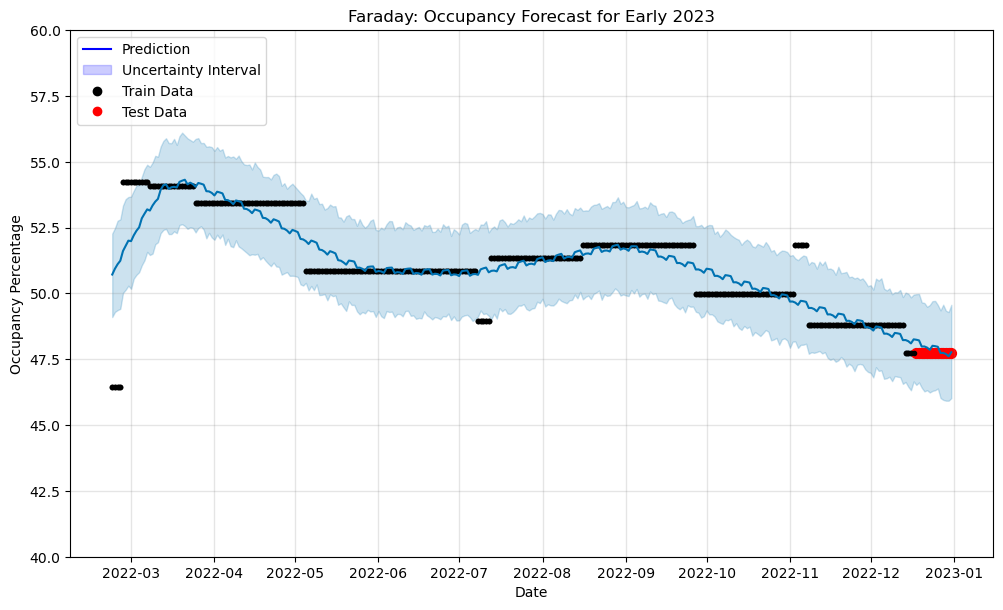

In [126]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model.plot(forecast_combined, figsize=(10, 6))

#Overlaying the actual data points (both train and test)
plt.scatter(train['Date'], train['OccupancyPercentage'], color='black', s=10, label='Train Data')
plt.scatter(test['Date'], test['OccupancyPercentage'], color='red', s=50, label='Test Data')

forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

#Adjust the y-axis
plt.ylim(40, 60)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend, plt.Line2D([], [], color='black', marker='o', linestyle='', label='Train Data'), plt.Line2D([], [], color='red', marker='o', linestyle='', label='Test Data')], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Faraday: Occupancy Forecast for Early 2023')
plt.savefig('47.png', dpi=300, bbox_inches='tight')

plt.show()


In [127]:
#Filter data to keep only records after 2022-02-21
FaradaySMData = FaradaySMData[FaradaySMData['Date'] > '2022-02-21']

#Combine train and test data
full_data = pd.concat([train, test])

#Prepare data for Prophet
full_data_prophet = full_data[['Date', 'OccupancyPercentage']].rename(columns={'Date': 'ds', 'OccupancyPercentage': 'y'})

#Train the Prophet model on the full data
model_full = Prophet(interval_width=0.95)
model_full.fit(full_data_prophet)

#Generate a future dataframe for the first 14 days of 2023
future_2023 = model_full.make_future_dataframe(periods=14, include_history=False)

#Predict for this future period
forecast_2023 = model_full.predict(future_2023)
forecast_2023['yhat'] = forecast_2023['yhat'].clip(upper=100)
forecast_2023['yhat_upper'] = forecast_2023['yhat_upper'].clip(upper=100)


#Extract the relevant columns for the table
forecast_2023_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2023_df.columns = ['Date', 'Predicted', 'Lower Bound 95%', 'Upper Bound 95%']

print(forecast_2023_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


         Date  Predicted  Lower Bound 95%  Upper Bound 95%
0  2023-01-01  47.670009        46.197444        49.245024
1  2023-01-02  47.644911        46.056389        49.269295
2  2023-01-03  47.421541        45.741584        49.097580
3  2023-01-04  47.424660        45.828099        49.016053
4  2023-01-05  47.381619        45.780267        49.126154
5  2023-01-06  47.298666        45.694298        48.938099
6  2023-01-07  47.446084        45.968454        49.073329
7  2023-01-08  47.419906        45.766873        49.109118
8  2023-01-09  47.394808        45.826441        48.950833
9  2023-01-10  47.171438        45.529890        48.768706
10 2023-01-11  47.174557        45.564721        48.765309
11 2023-01-12  47.131516        45.397887        48.768207
12 2023-01-13  47.048563        45.350794        48.817718
13 2023-01-14  47.195981        45.597709        48.791484


In [128]:
#Adding prediction
FaradayOccupancyForecastsLst = forecast_2023_df['Predicted'].tolist()

C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


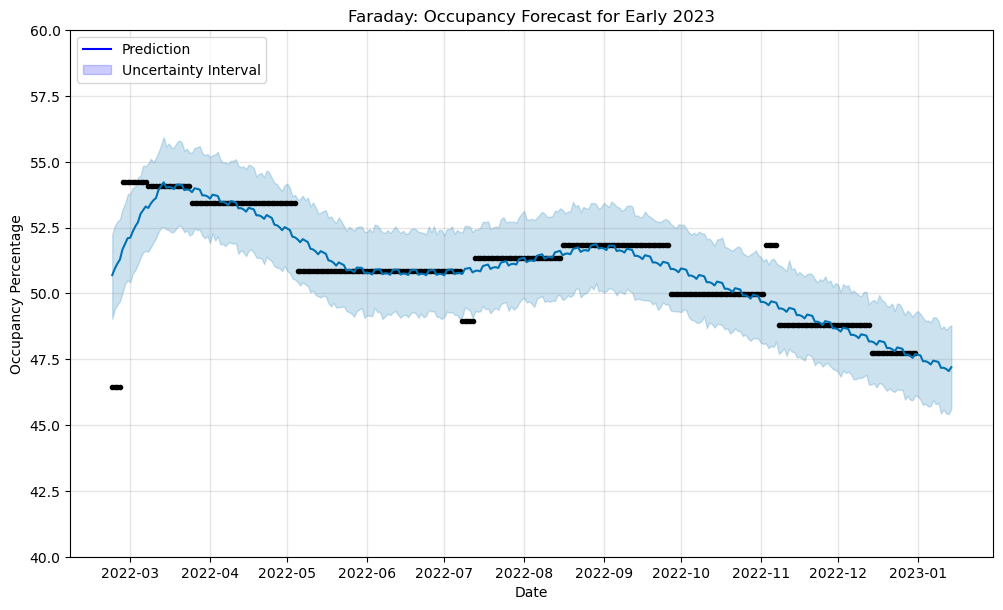

In [129]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model_full.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model_full.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model_full.plot(forecast_combined, figsize=(10, 6))

#Create custom legend items
forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_betweenx([], [], [], color='blue', alpha=0.2, label='Uncertainty Interval')

plt.ylim(40, 60)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Faraday: Occupancy Forecast for Early 2023')
plt.savefig('48.png', dpi=300, bbox_inches='tight')

plt.show()


In [130]:
#Now iCentrum

#Data Filtering
iCentrumSMData = iCentrumSMData[iCentrumSMData['Date'] > '2022-02-21']

#Train-Test Split
train = iCentrumSMData.iloc[:-14]
test = iCentrumSMData.iloc[-14:]

#Prophet Modeling
#Prepare data for Prophet
prophet_data = train[['Date', 'OccupancyPercentage']]
prophet_data.columns = ['ds', 'y']

model = Prophet(interval_width=0.95)  # 95% prediction intervals
model.fit(prophet_data)

future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

#Extract predictions for the last 14 days
predictions = forecast.tail(14)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

#Clip the predictions and upper bounds to 100
predictions['yhat'] = predictions['yhat'].clip(upper=100)
predictions['yhat_upper'] = predictions['yhat_upper'].clip(upper=100)

#Comparison
result = test[['Date', 'OccupancyPercentage']].copy()
result.columns = ['Date', 'Real Value']
result['Predicted Value'] = predictions['yhat'].values
result['Lower Bound'] = predictions['yhat_lower'].values
result['Upper Bound'] = predictions['yhat_upper'].values

print(result)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


          Date  Real Value  Predicted Value  Lower Bound  Upper Bound
351 2022-12-18   65.957373        63.070575    59.454832    66.840013
352 2022-12-19   65.957373        62.788616    58.907154    66.537542
353 2022-12-20   65.957373        62.200257    58.564428    65.636832
354 2022-12-21   65.957373        62.109440    58.461636    65.523080
355 2022-12-22   65.957373        61.871400    58.093008    65.531905
356 2022-12-23   65.957373        61.703653    58.234698    65.478535
357 2022-12-24   65.957373        61.440269    57.808930    65.064223
358 2022-12-25   65.957373        61.097045    57.397154    64.686801
359 2022-12-26   65.957373        60.815086    57.085693    64.148401
360 2022-12-27   65.957373        60.226727    56.531599    63.697576
361 2022-12-28   65.957373        60.135910    56.358870    63.897496
362 2022-12-29   65.957373        59.897870    56.083770    63.774461
363 2022-12-30   65.957373        59.730123    55.926801    63.651435
364 2022-12-31   65.

In [131]:
import numpy as np
from sklearn.metrics import mean_squared_error

#Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculating RMSE
result = test[['Date', 'OccupancyPercentage']].copy()
result['Predicted'] = predictions['yhat'].values

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(result['OccupancyPercentage'], result['Predicted']))
print(f"RMSE: {rmse:.2f}")

#Calculate MAPE
mape = mean_absolute_percentage_error(result['OccupancyPercentage'], result['Predicted'])
print(f"MAPE: {mape:.2f}%")


RMSE: 4.91
MAPE: 7.24%


C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


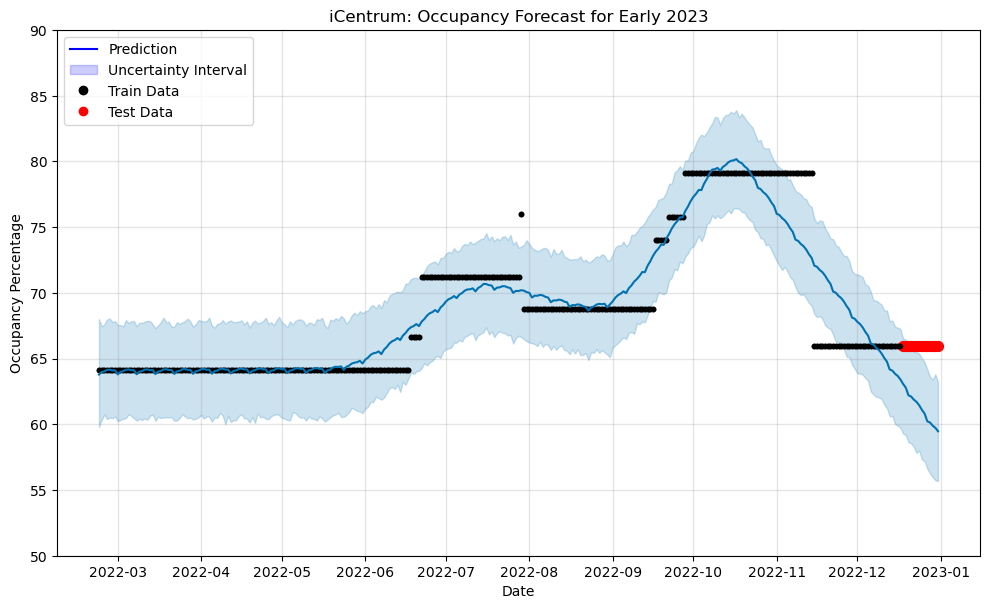

In [132]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model.plot(forecast_combined, figsize=(10, 6))

#Overlaying the actual data points (both train and test)
plt.scatter(train['Date'], train['OccupancyPercentage'], color='black', s=10, label='Train Data')
plt.scatter(test['Date'], test['OccupancyPercentage'], color='red', s=50, label='Test Data')

#Custom legends for forecast and uncertainty interval
forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

#Add these custom legends to the plot, along with the train and test data labels
plt.legend(handles=[forecast_legend, uncertainty_legend, plt.Line2D([], [], color='black', marker='o', linestyle='', label='Train Data'), plt.Line2D([], [], color='red', marker='o', linestyle='', label='Test Data')], loc='upper left')

#Adjust the y-axis
plt.ylim(50, 90)

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('iCentrum: Occupancy Forecast for Early 2023')
plt.savefig('49.png', dpi=300, bbox_inches='tight')

plt.show()


In [133]:
#Filter data to keep only records after 2022-02-21
iCentrumSMData = iCentrumSMData[iCentrumSMData['Date'] > '2022-02-21']

#Combine train and test data
full_data = pd.concat([train, test])

#Prepare data for Prophet
full_data_prophet = full_data[['Date', 'OccupancyPercentage']].rename(columns={'Date': 'ds', 'OccupancyPercentage': 'y'})

#Train the Prophet model on the full data
model_full = Prophet(interval_width=0.95)
model_full.fit(full_data_prophet)

#Generate a future dataframe for the first 14 days of 2023
future_2023 = model_full.make_future_dataframe(periods=14, include_history=False)

#Predict for this future period
forecast_2023 = model_full.predict(future_2023)
forecast_2023['yhat'] = forecast_2023['yhat'].clip(upper=100)
forecast_2023['yhat_upper'] = forecast_2023['yhat_upper'].clip(upper=100)


#Extract the relevant columns for the table
forecast_2023_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2023_df.columns = ['Date', 'Predicted', 'Lower Bound 95%', 'Upper Bound 95%']

print(forecast_2023_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


         Date  Predicted  Lower Bound 95%  Upper Bound 95%
0  2023-01-01  61.696931        57.433528        66.069083
1  2023-01-02  61.456745        57.075593        65.642864
2  2023-01-03  60.927314        56.532242        65.267709
3  2023-01-04  60.860776        56.839344        64.846327
4  2023-01-05  60.660414        56.690874        64.798158
5  2023-01-06  60.528505        56.523063        64.621924
6  2023-01-07  60.301363        56.068642        64.266158
7  2023-01-08  59.968835        55.816469        64.020752
8  2023-01-09  59.728649        55.541510        63.694474
9  2023-01-10  59.199218        54.683401        63.605342
10 2023-01-11  59.132680        54.972938        63.393584
11 2023-01-12  58.932318        54.647236        62.997601
12 2023-01-13  58.800409        54.812738        62.805270
13 2023-01-14  58.573267        54.233085        62.613695


In [134]:
#Adding forecasts
iCentrumOccupancyForecastsLst = forecast_2023_df['Predicted'].tolist()

C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


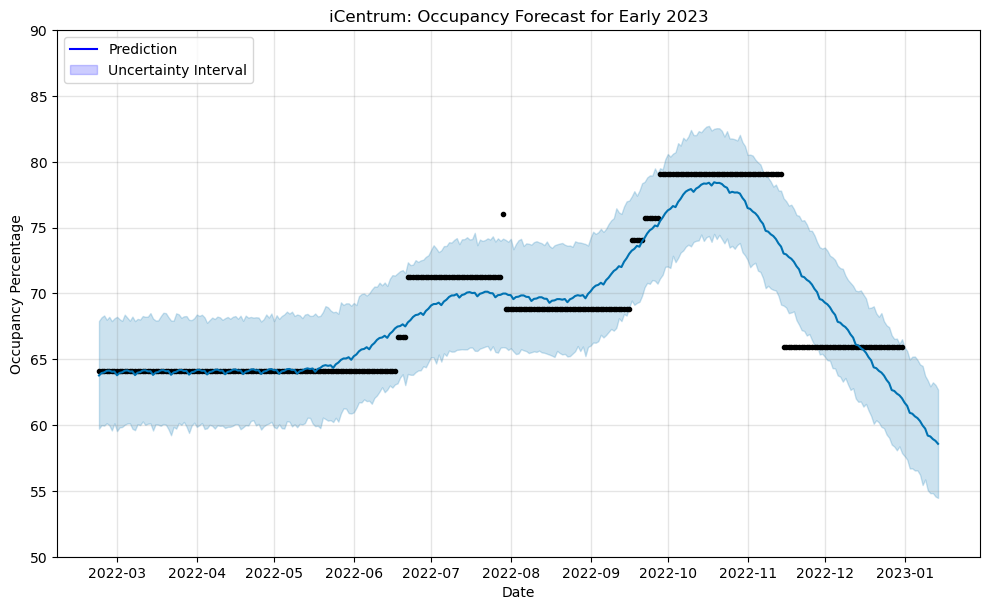

In [135]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model_full.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model_full.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model_full.plot(forecast_combined, figsize=(10, 6))

#Create custom legend items
forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_betweenx([], [], [], color='blue', alpha=0.2, label='Uncertainty Interval')

plt.ylim(50, 90)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('iCentrum: Occupancy Forecast for Early 2023')
plt.savefig('50.png', dpi=300, bbox_inches='tight')

plt.show()



In [136]:
#Now Mclaren

#Data Filtering
MclarenSMData = MclarenSMData[MclarenSMData['Date'] > '2022-02-21']

#Train-Test Split
train = MclarenSMData.iloc[:-14]
test = MclarenSMData.iloc[-14:]

#Prophet Modeling
#Prepare data for Prophet
prophet_data = train[['Date', 'OccupancyPercentage']]
prophet_data.columns = ['ds', 'y']

model = Prophet(interval_width=0.95)  # 95% prediction intervals
model.fit(prophet_data)

future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

#Extract predictions for the last 14 days
predictions = forecast.tail(14)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

#Clip the predictions and upper bounds to 100
predictions['yhat'] = predictions['yhat'].clip(upper=100)
predictions['yhat_upper'] = predictions['yhat_upper'].clip(upper=100)

#Comparison
result = test[['Date', 'OccupancyPercentage']].copy()
result.columns = ['Date', 'Real Value']
result['Predicted Value'] = predictions['yhat'].values
result['Lower Bound'] = predictions['yhat_lower'].values
result['Upper Bound'] = predictions['yhat_upper'].values

print(result)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


          Date  Real Value  Predicted Value  Lower Bound  Upper Bound
351 2022-12-18    77.52517        76.529312    75.483852    77.741633
352 2022-12-19    77.52517        76.607497    75.442227    77.739225
353 2022-12-20    77.52517        76.662053    75.485972    77.850130
354 2022-12-21    77.52517        76.626847    75.397295    77.798976
355 2022-12-22    77.52517        76.564860    75.396017    77.887487
356 2022-12-23    77.52517        76.461958    75.110668    77.918475
357 2022-12-24    77.52517        76.494920    75.169905    78.085418
358 2022-12-25    77.52517        76.531576    74.956977    78.035506
359 2022-12-26    77.52517        76.609761    74.673129    78.374677
360 2022-12-27    77.52517        76.664318    74.699317    78.594614
361 2022-12-28    77.52517        76.629111    74.441878    78.804113
362 2022-12-29    77.52517        76.567124    74.056765    78.969906
363 2022-12-30    77.52517        76.464223    73.642825    79.204957
364 2022-12-31    77

In [137]:
import numpy as np
from sklearn.metrics import mean_squared_error

#Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculating RMSE
result = test[['Date', 'OccupancyPercentage']].copy()
result['Predicted'] = predictions['yhat'].values

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(result['OccupancyPercentage'], result['Predicted']))
print(f"RMSE: {rmse:.2f}")

#Calculate MAPE
mape = mean_absolute_percentage_error(result['OccupancyPercentage'], result['Predicted'])
print(f"MAPE: {mape:.2f}%")


RMSE: 0.96
MAPE: 1.24%


C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


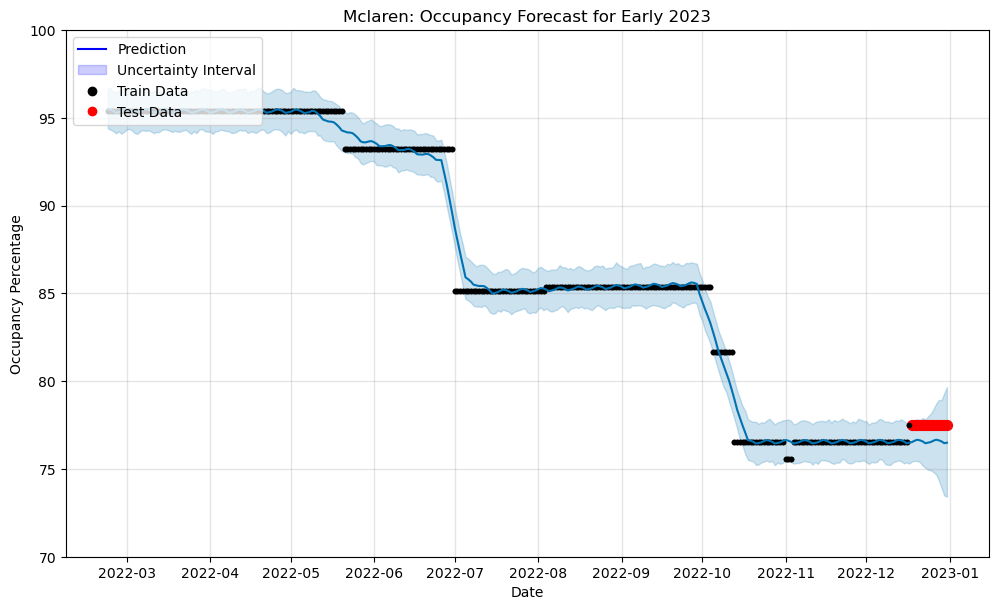

In [138]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model.plot(forecast_combined, figsize=(10, 6))

#Overlaying the actual data points (both train and test)
plt.scatter(train['Date'], train['OccupancyPercentage'], color='black', s=10, label='Train Data')
plt.scatter(test['Date'], test['OccupancyPercentage'], color='red', s=50, label='Test Data')

forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_between([], [], color='blue', alpha=0.2, label='Uncertainty Interval')

#Adjust the y-axis
plt.ylim(70, 100)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend, plt.Line2D([], [], color='black', marker='o', linestyle='', label='Train Data'), plt.Line2D([], [], color='red', marker='o', linestyle='', label='Test Data')], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Mclaren: Occupancy Forecast for Early 2023')
plt.savefig('51.png', dpi=300, bbox_inches='tight')

plt.show()


In [139]:
#Filter data to keep only records after 2022-02-21
MclarenSMData = MclarenSMData[MclarenSMData['Date'] > '2022-02-21']

#Combine train and test data
full_data = pd.concat([train, test])

#Prepare data for Prophet
full_data_prophet = full_data[['Date', 'OccupancyPercentage']].rename(columns={'Date': 'ds', 'OccupancyPercentage': 'y'})

#Train the Prophet model on the full data
model_full = Prophet(interval_width=0.95)
model_full.fit(full_data_prophet)

#Generate a future dataframe for the first 14 days of 2023
future_2023 = model_full.make_future_dataframe(periods=14, include_history=False)

#Predict for this future period
forecast_2023 = model_full.predict(future_2023)
forecast_2023['yhat'] = forecast_2023['yhat'].clip(upper=100)
forecast_2023['yhat_upper'] = forecast_2023['yhat_upper'].clip(upper=100)


#Extract the relevant columns for the table
forecast_2023_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2023_df.columns = ['Date', 'Predicted', 'Lower Bound 95%', 'Upper Bound 95%']

print(forecast_2023_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


         Date  Predicted  Lower Bound 95%  Upper Bound 95%
0  2023-01-01  77.364402        75.910569        78.931275
1  2023-01-02  77.445399        75.968749        78.893028
2  2023-01-03  77.493443        75.995621        78.941385
3  2023-01-04  77.483640        76.013453        78.954098
4  2023-01-05  77.449236        75.955035        78.931102
5  2023-01-06  77.372836        75.843735        78.953087
6  2023-01-07  77.427992        75.873798        78.902282
7  2023-01-08  77.503620        75.842861        79.149904
8  2023-01-09  77.584617        75.957084        79.308140
9  2023-01-10  77.632660        76.014548        79.404410
10 2023-01-11  77.622858        75.703447        79.493673
11 2023-01-12  77.588453        75.559875        79.610827
12 2023-01-13  77.512054        75.550481        79.613433
13 2023-01-14  77.567210        75.165710        79.679364


In [140]:
#Adding forecasts
MclarenOccupancyForecastsLst = forecast_2023_df['Predicted'].tolist()

C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\natha\anaconda3\envs\dissenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


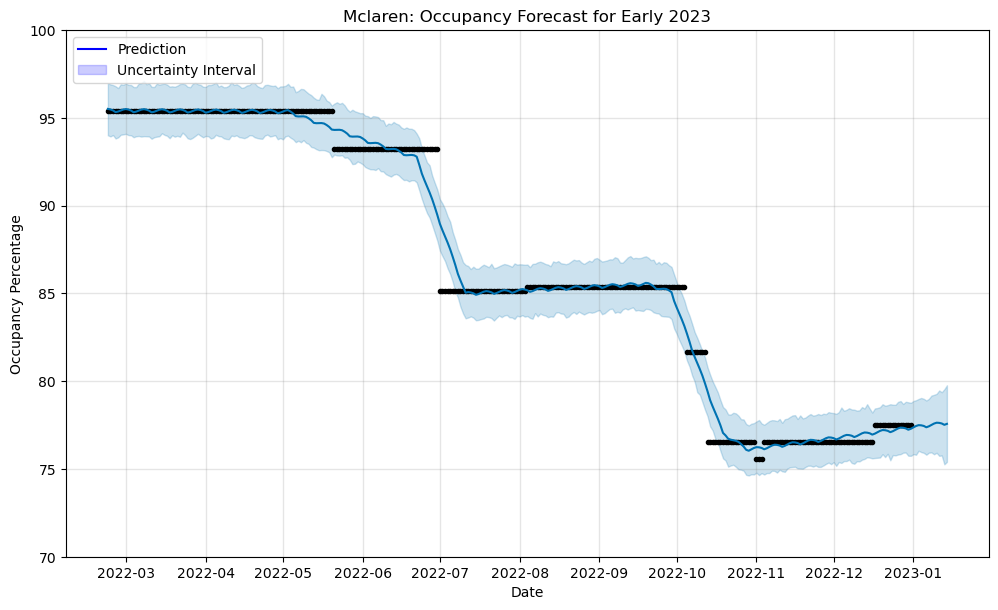

In [141]:
#Generate a future dataframe for the entire data period + first 14 days of 2023
future_combined = model_full.make_future_dataframe(periods=14)

#Predict for this entire future period
forecast_combined = model_full.predict(future_combined)
forecast_combined['yhat'] = forecast_combined['yhat'].clip(upper=100)
forecast_combined['yhat_upper'] = forecast_combined['yhat_upper'].clip(upper=100)

#Plotting the forecast using Prophet's built-in function
fig2 = model_full.plot(forecast_combined, figsize=(10, 6))

#Create custom legend items
forecast_legend = plt.Line2D([], [], color='blue', label='Prediction')
uncertainty_legend = plt.fill_betweenx([], [], [], color='blue', alpha=0.2, label='Uncertainty Interval')

plt.ylim(70, 100)

#Add legends to the plot, including the custom handles for prediction and uncertainty interval
plt.legend(handles=[forecast_legend, uncertainty_legend], loc='upper left')

#Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Occupancy Percentage')
plt.title('Mclaren: Occupancy Forecast for Early 2023')
plt.savefig('52.png', dpi=300, bbox_inches='tight')

plt.show()


In [142]:
#Creating a dataframe with the first 14 days of 2023

def add_dates_to_df(df):
    dates = pd.date_range(start="2023-01-01", periods=14)
    new_rows = pd.DataFrame(dates, columns=["Date"])

    # Populate the 'DayOfWeek' column based on the date
    new_rows["DayOfWeek"] = new_rows["Date"].dt.day_name()

    # Append the new rows to the existing DataFrame
    df = pd.concat([df, new_rows], ignore_index=True, sort=False)
    
    return df

CentreCity2023Data = add_dates_to_df(CentreCitySMData)
Citylabs2023Data = add_dates_to_df(CitylabsSMData)
Faraday2023Data = add_dates_to_df(FaradaySMData)
iCentrum2023Data = add_dates_to_df(iCentrumSMData)
Mclaren2023Data = add_dates_to_df(MclarenSMData)


In [143]:
#Find the indices of the last 14 NaN values in 'Average Temperature'
nan_indices = Citylabs2023Data[Citylabs2023Data['Average Temperature'].isna()].index[-14:]

#Imputing the forecasted temperature

#Impute the values from ManchesterTemperatureForecastsLst into the NaN indices
for i, index in enumerate(nan_indices):
    Citylabs2023Data.at[index, 'Average Temperature'] = ManchesterTemperatureForecastsLst[i]


dfs = [CentreCity2023Data, Faraday2023Data, iCentrum2023Data, Mclaren2023Data]
# Impute the values
for df in dfs:
    nan_indices = df[df['Average Temperature'].isna()].index[-14:]
    for i, index in enumerate(nan_indices):
        df.at[index, 'Average Temperature'] = BirminghamTemperatureForecastsLst[i]

In [144]:
#Imputing the forecasted occupancy

nan_indices = CentreCity2023Data[CentreCity2023Data['OccupancyPercentage'].isna()].index[-14:]

for i, index in enumerate(nan_indices):
    CentreCity2023Data.at[index, 'OccupancyPercentage'] = CentreCityOccupancyForecastsLst[i]

In [145]:
nan_indices = Citylabs2023Data[Citylabs2023Data['OccupancyPercentage'].isna()].index[-14:]

for i, index in enumerate(nan_indices):
    Citylabs2023Data.at[index, 'OccupancyPercentage'] = CitylabsOccupancyForecastsLst[i]
    

In [146]:
nan_indices = Faraday2023Data[Faraday2023Data['OccupancyPercentage'].isna()].index[-14:]

for i, index in enumerate(nan_indices):
    Faraday2023Data.at[index, 'OccupancyPercentage'] = FaradayOccupancyForecastsLst[i]

In [147]:
nan_indices = iCentrum2023Data[iCentrum2023Data['OccupancyPercentage'].isna()].index[-14:]

for i, index in enumerate(nan_indices):
    iCentrum2023Data.at[index, 'OccupancyPercentage'] = iCentrumOccupancyForecastsLst[i]

In [148]:
nan_indices = Mclaren2023Data[Mclaren2023Data['OccupancyPercentage'].isna()].index[-14:]

for i, index in enumerate(nan_indices):
    Mclaren2023Data.at[index, 'OccupancyPercentage'] = MclarenOccupancyForecastsLst[i]

In [149]:
Mclaren2023Data

Site       Date  DayOfWeek  00:00  00:30  01:00  01:30  02:00  02:30  \
0    Mclaren 2022-02-22    Tuesday  120.2  120.5  127.1  121.6  126.5  121.0   
1    Mclaren 2022-02-23  Wednesday  108.9  111.6  107.7  111.7  115.0  114.4   
2    Mclaren 2022-02-24   Thursday   86.8   88.6   85.7   87.4   87.9   95.4   
3    Mclaren 2022-02-25     Friday  130.5  133.4  128.4  127.2  123.8  125.5   
4    Mclaren 2022-02-26   Saturday  111.0  116.4  120.1  107.9  112.8  114.4   
..       ...        ...        ...    ...    ...    ...    ...    ...    ...   
322      NaN 2023-01-10    Tuesday    NaN    NaN    NaN    NaN    NaN    NaN   
323      NaN 2023-01-11  Wednesday    NaN    NaN    NaN    NaN    NaN    NaN   
324      NaN 2023-01-12   Thursday    NaN    NaN    NaN    NaN    NaN    NaN   
325      NaN 2023-01-13     Friday    NaN    NaN    NaN    NaN    NaN    NaN   
326      NaN 2023-01-14   Saturday    NaN    NaN    NaN    NaN    NaN    NaN   

     03:00  ...  22:30  23:00  23:30   Total  TotalOfficeSize  \
0    110.9  ...  111.1  109.4  103.3  6555.7         113040.0   
1    115.9  ...   86.4   87.8   86.3  6311.0         113040.0   
2     97.2  ...  127.8  127.6  130.8  6911.7         113040.0   
3    129.6  ...  104.9  104.9  107.1  6500.7         113040.0   
4    119.5  ...  122.1  128.8  127.6  5300.7         113040.0   
..     ...  ...    ...    ...    ...     ...              ...   
322    NaN  ...    NaN    NaN    NaN     NaN              NaN   
323    NaN  ...    NaN    NaN    NaN     NaN              NaN   
324    NaN  ...    NaN    NaN    NaN     NaN              NaN   
325    NaN  ...    NaN    NaN    NaN     NaN              NaN   
326    NaN  ...    NaN    NaN    NaN     NaN              NaN   

     TotalOccupiedOfficeSize  OccupancyPercentage  WorkstationPercentage  \
0                   107826.0            95.387473                    0.0   
1                   107826.0            95.387473                    0.0   
2                   107826.0            95.387473                    0.0   
3                   107826.0            95.387473                    0.0   
4                   107826.0            95.387473                    0.0   
..                       ...                  ...                    ...   
322                      NaN            77.632660                    NaN   
323                      NaN            77.622858                    NaN   
324                      NaN            77.588453                    NaN   
325                      NaN            77.512054                    NaN   
326                      NaN            77.567210                    NaN   

     Average Temperature  7-day-rolling-average  
0               8.600000            6189.642857  
1               7.200000            6279.514286  
2               5.000000            6399.428571  
3               6.000000            6392.042857  
4               4.900000            6317.714286  
..                   ...                    ...  
322             2.840224                    NaN  
323             2.737189                    NaN  
324             2.186773                    NaN  
325             2.127135                    NaN  
326             2.319747                    NaN  

[327 rows x 58 columns]

# Preparing the Data for Regression

In [150]:
print(CentreCitySMData.columns)

Index(['Site', 'Date', 'DayOfWeek', '00:00', '00:30', '01:00', '01:30',
       '02:00', '02:30', '03:00', '03:30', '04:00', '04:30', '05:00', '05:30',
       '06:00', '06:30', '07:00', '07:30', '08:00', '08:30', '09:00', '09:30',
       '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30',
       '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30',
       '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30',
       '22:00', '22:30', '23:00', '23:30', 'Total', 'TotalOfficeSize',
       'TotalOccupiedOfficeSize', 'OccupancyPercentage', 'Average Temperature',
       '7-day-rolling-average'],
      dtype='object')


In [151]:
#Creating the DaysElapsed column

CentreCitySMData['DaysElapsed'] = (CentreCitySMData['Date'] - CentreCitySMData['Date'].min()).dt.days
CitylabsSMData['DaysElapsed'] = (CitylabsSMData['Date'] - CitylabsSMData['Date'].min()).dt.days
FaradaySMData['DaysElapsed'] = (FaradaySMData['Date'] - FaradaySMData['Date'].min()).dt.days
iCentrumSMData['DaysElapsed'] = (iCentrumSMData['Date'] - iCentrumSMData['Date'].min()).dt.days
MclarenSMData['DaysElapsed'] = (MclarenSMData['Date'] - MclarenSMData['Date'].min()).dt.days

In [152]:
CentreCitySMData

Site       Date  DayOfWeek  00:00  00:30  01:00  01:30  02:00  \
52   Centre City 2022-02-22    Tuesday   93.1   93.4   93.7   96.3   96.4   
53   Centre City 2022-02-23  Wednesday   99.6   95.5   97.7   97.6   97.0   
54   Centre City 2022-02-24   Thursday   94.8   94.7   97.0   90.7   96.7   
55   Centre City 2022-02-25     Friday  103.4  105.1  102.9  101.0  103.3   
56   Centre City 2022-02-26   Saturday   73.0   75.8   72.8   74.5   76.0   
..           ...        ...        ...    ...    ...    ...    ...    ...   
360  Centre City 2022-12-27    Tuesday   72.9   72.1   74.9   78.7   85.3   
361  Centre City 2022-12-28  Wednesday   62.2   66.5   69.9   69.4   66.7   
362  Centre City 2022-12-29   Thursday   67.8   66.7   65.1   68.4   72.8   
363  Centre City 2022-12-30     Friday   68.4   69.5   66.8   72.7   71.8   
364  Centre City 2022-12-31   Saturday   67.8   66.4   64.7   66.2   66.4   

     02:30  03:00  ...  22:30  23:00  23:30   Total  TotalOfficeSize  \
52    95.5   95.4  ...   93.0   97.3   96.7  7945.3           224083   
53    96.9  102.6  ...   99.0   97.7   96.6  8255.6           224083   
54   100.2  100.8  ...  102.6  103.4  102.9  8229.0           224083   
55   103.8  102.6  ...   72.2   76.1   75.6  7755.3           224083   
56    74.6   74.9  ...   72.8   75.3   73.4  4581.2           224083   
..     ...    ...  ...    ...    ...    ...     ...              ...   
360   83.8   77.7  ...   68.7   67.7   66.3  5512.8           224083   
361   64.8   64.1  ...   68.3   66.2   72.2  5173.0           224083   
362   70.9   62.7  ...   72.0   69.2   70.2  5314.8           224083   
363   72.8   68.2  ...   61.5   64.9   66.2  5638.7           224083   
364   63.7   62.9  ...   65.5   67.1   67.2  4179.3           224083   

     TotalOccupiedOfficeSize  OccupancyPercentage  Average Temperature  \
52                    222178            99.149869                  8.6   
53                    222178            99.149869                  7.2   
54                    222178            99.149869                  5.0   
55                    222178            99.149869                  6.0   
56                    222178            99.149869                  4.9   
..                       ...                  ...                  ...   
360                   224083           100.000000                  6.1   
361                   224083           100.000000                  9.3   
362                   224083           100.000000                  7.0   
363                   224083           100.000000                  8.8   
364                   224083           100.000000                 10.5   

     7-day-rolling-average  DaysElapsed  
52             6792.300000            0  
53             6943.100000            1  
54             6969.414286            2  
55             7013.571429            3  
56             6941.500000            4  
..                     ...          ...  
360            5312.100000          308  
361            5132.371429          309  
362            5025.900000          310  
363            4966.842857          311  
364            4935.457143          312  

[313 rows x 58 columns]

In [153]:
CentreCityRegData = CentreCitySMData.copy()
CitylabsRegData = CitylabsSMData.copy()
FaradayRegData = FaradaySMData.copy()
iCentrumRegData = iCentrumSMData.copy()
MclarenRegData = MclarenSMData.copy()

In [154]:
#Removing not needed columns

columns_to_remove = ['Site', 'Total', 'TotalOfficeSize', 'TotalOccupiedOfficeSize', '7-day-rolling-average']
def drop_columns(df):
    return df.drop(columns=columns_to_remove, errors='ignore')

CentreCityRegData = drop_columns(CentreCityRegData)
CitylabsRegData = drop_columns(CitylabsRegData)
FaradayRegData = drop_columns(FaradayRegData)
iCentrumRegData = drop_columns(iCentrumRegData)
MclarenRegData = drop_columns(MclarenRegData)


In [155]:
#Creating weekend dummy variable
def is_weekend(day):
    return 1 if day in ['Saturday', 'Sunday'] else 0

CentreCityRegData['IsWeekend'] = CentreCityRegData['DayOfWeek'].apply(is_weekend)


In [156]:
#Convert the wide format to long format
CentreCityRegData = CentreCityRegData.melt(id_vars=['Date', 'DayOfWeek', 'OccupancyPercentage', 'Average Temperature', 'IsWeekend', 'DaysElapsed'],
                                         value_vars=time_columns,
                                         var_name='TimeOfDay',
                                         value_name='EnergyConsumption')

#Sort by Date and then TimeOfDay
CentreCityRegData = CentreCityRegData.sort_values(by=['Date', 'TimeOfDay']).reset_index(drop=True)

#Now, one-hot encode the TimeOfDay column
CentreCityRegData = pd.get_dummies(CentreCityRegData, columns=['TimeOfDay'], drop_first=True)


In [157]:
#Creating a month count column
CentreCityRegData['Month'] = CentreCityRegData['Date'].dt.month
CentreCityRegData = pd.get_dummies(CentreCityRegData, columns=['Month'], prefix='Month', drop_first=True)

In [158]:
CentreCityRegData

Date DayOfWeek  OccupancyPercentage  Average Temperature  \
0     2022-02-22   Tuesday            99.149869                  8.6   
1     2022-02-22   Tuesday            99.149869                  8.6   
2     2022-02-22   Tuesday            99.149869                  8.6   
3     2022-02-22   Tuesday            99.149869                  8.6   
4     2022-02-22   Tuesday            99.149869                  8.6   
...          ...       ...                  ...                  ...   
15019 2022-12-31  Saturday           100.000000                 10.5   
15020 2022-12-31  Saturday           100.000000                 10.5   
15021 2022-12-31  Saturday           100.000000                 10.5   
15022 2022-12-31  Saturday           100.000000                 10.5   
15023 2022-12-31  Saturday           100.000000                 10.5   

       IsWeekend  DaysElapsed  EnergyConsumption  TimeOfDay_00:30  \
0              0            0               93.1                0   
1              0            0               93.4                1   
2              0            0               93.7                0   
3              0            0               96.3                0   
4              0            0               96.4                0   
...          ...          ...                ...              ...   
15019          1          312               61.5                0   
15020          1          312               63.6                0   
15021          1          312               65.5                0   
15022          1          312               67.1                0   
15023          1          312               67.2                0   

       TimeOfDay_01:00  TimeOfDay_01:30  ...  Month_3  Month_4  Month_5  \
0                    0                0  ...        0        0        0   
1                    0                0  ...        0        0        0   
2                    1                0  ...        0        0        0   
3                    0                1  ...        0        0        0   
4                    0                0  ...        0        0        0   
...                ...              ...  ...      ...      ...      ...   
15019                0                0  ...        0        0        0   
15020                0                0  ...        0        0        0   
15021                0                0  ...        0        0        0   
15022                0                0  ...        0        0        0   
15023                0                0  ...        0        0        0   

       Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  
0            0        0        0        0         0         0         0  
1            0        0        0        0         0         0         0  
2            0        0        0        0         0         0         0  
3            0        0        0        0         0         0         0  
4            0        0        0        0         0         0         0  
...        ...      ...      ...      ...       ...       ...       ...  
15019        0        0        0        0         0         0         1  
15020        0        0        0        0         0         0         1  
15021        0        0        0        0         0         0         1  
15022        0        0        0        0         0         0         1  
15023        0        0        0        0         0         0         1  

[15024 rows x 64 columns]

In [159]:
# Making a copy of the dataframe
CentreCityNoDecDayCountRegData = CentreCityRegData.copy()

# Filtering out December 2022 rows
CentreCityNoDecDayCountRegData = CentreCityNoDecDayCountRegData[CentreCityNoDecDayCountRegData['Date'] <= '2022-11-30']

# Dropping the 'Month_12' column
CentreCityNoDecDayCountRegData.drop('Month_12', axis=1, inplace=True)


In [160]:
#To do this to the others

def preprocess_dataframe(df_name):
    #Copy the DataFrame
    df = eval(df_name).copy()
    
    #Convert DayOfWeek to IsWeekend
    df['IsWeekend'] = df['DayOfWeek'].apply(is_weekend)
    
    #Convert wide format to long format
    df = df.melt(id_vars=['Date', 'DayOfWeek', 'OccupancyPercentage', 'Average Temperature', 'IsWeekend', 'DaysElapsed'],
                 value_vars=time_columns,
                 var_name='TimeOfDay',
                 value_name='EnergyConsumption')
    
    #Sort by Date and then TimeOfDay
    df = df.sort_values(by=['Date', 'TimeOfDay']).reset_index(drop=True)
    
    #One-hot encode the TimeOfDay column
    df = pd.get_dummies(df, columns=['TimeOfDay'], drop_first=True)
    
    #Extract the month and one-hot encode it
    df['Month'] = df['Date'].dt.month
    df = pd.get_dummies(df, columns=['Month'], prefix='Month', drop_first=True)
    
    #Create a new name for the processed dataframe
    new_df_name = df_name.replace("RegData", "NoDecDayCountRegData")
    
    #Remove December data and Month_12 column
    df = df[df['Date'] <= '2022-11-30']
    if 'Month_12' in df.columns:
        df.drop('Month_12', axis=1, inplace=True)
    
    #Assign the processed dataframe to a new variable
    globals()[new_df_name] = df
    return new_df_name  # Return the name of the new dataframe

dataframes = ["CitylabsRegData", "FaradayRegData", "iCentrumRegData", "MclarenRegData"]

for df_name in dataframes:
    new_df_name = preprocess_dataframe(df_name)
    print(f"Processed {df_name} and saved to {new_df_name}.")


Processed CitylabsRegData and saved to CitylabsNoDecDayCountRegData.
Processed FaradayRegData and saved to FaradayNoDecDayCountRegData.
Processed iCentrumRegData and saved to iCentrumNoDecDayCountRegData.
Processed MclarenRegData and saved to MclarenNoDecDayCountRegData.


In [161]:
CentreCityNoDecDayCountRegData

Date  DayOfWeek  OccupancyPercentage  Average Temperature  \
0     2022-02-22    Tuesday            99.149869                  8.6   
1     2022-02-22    Tuesday            99.149869                  8.6   
2     2022-02-22    Tuesday            99.149869                  8.6   
3     2022-02-22    Tuesday            99.149869                  8.6   
4     2022-02-22    Tuesday            99.149869                  8.6   
...          ...        ...                  ...                  ...   
13531 2022-11-30  Wednesday           100.000000                  5.1   
13532 2022-11-30  Wednesday           100.000000                  5.1   
13533 2022-11-30  Wednesday           100.000000                  5.1   
13534 2022-11-30  Wednesday           100.000000                  5.1   
13535 2022-11-30  Wednesday           100.000000                  5.1   

       IsWeekend  DaysElapsed  EnergyConsumption  TimeOfDay_00:30  \
0              0            0               93.1                0   
1              0            0               93.4                1   
2              0            0               93.7                0   
3              0            0               96.3                0   
4              0            0               96.4                0   
...          ...          ...                ...              ...   
13531          0          281               78.7                0   
13532          0          281               81.3                0   
13533          0          281               85.0                0   
13534          0          281               80.3                0   
13535          0          281               80.6                0   

       TimeOfDay_01:00  TimeOfDay_01:30  ...  TimeOfDay_23:30  Month_3  \
0                    0                0  ...                0        0   
1                    0                0  ...                0        0   
2                    1                0  ...                0        0   
3                    0                1  ...                0        0   
4                    0                0  ...                0        0   
...                ...              ...  ...              ...      ...   
13531                0                0  ...                0        0   
13532                0                0  ...                0        0   
13533                0                0  ...                0        0   
13534                0                0  ...                0        0   
13535                0                0  ...                1        0   

       Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0            0        0        0        0        0        0         0   
1            0        0        0        0        0        0         0   
2            0        0        0        0        0        0         0   
3            0        0        0        0        0        0         0   
4            0        0        0        0        0        0         0   
...        ...      ...      ...      ...      ...      ...       ...   
13531        0        0        0        0        0        0         0   
13532        0        0        0        0        0        0         0   
13533        0        0        0        0        0        0         0   
13534        0        0        0        0        0        0         0   
13535        0        0        0        0        0        0         0   

       Month_11  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
13531         1  
13532         1  
13533         1  
13534         1  
13535         1  

[13536 rows x 63 columns]

In [162]:
#Make copies of the dataframes without "DayCount" in their names
CentreCityNoDecRegData = CentreCityNoDecDayCountRegData.copy()
CitylabsNoDecRegData = CitylabsNoDecDayCountRegData.copy()
FaradayNoDecRegData = FaradayNoDecDayCountRegData.copy()
iCentrumNoDecRegData = iCentrumNoDecDayCountRegData.copy()
MclarenNoDecRegData = MclarenNoDecDayCountRegData.copy()

#List of the new dataframes to iterate over
dataframes = [
    CentreCityNoDecRegData,
    CitylabsNoDecRegData,
    FaradayNoDecRegData,
    iCentrumRegData,
    MclarenNoDecRegData
]

#Drop the 'DaysElapsed' column from each dataframe
for df in dataframes:
    df.drop(columns=['DaysElapsed'], inplace=True)


In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

def compute_rmse_and_mape(df):
    # Splitting the data
    # The last 14 days of November
    test = df[(df['Date'] >= '2022-11-17') & (df['Date'] <= '2022-11-30')]
    train = df[df['Date'] < '2022-11-17']

    #Define the columns for features and the target variable
    X_columns = [
        'OccupancyPercentage', 
        'Average Temperature',
        'IsWeekend', 
    ] + [col for col in df.columns if 'TimeOfDay_' in col or 'Month_' in col]

    y_column = 'EnergyConsumption'

    #Extracting features and target for train and test
    X_train = train[X_columns]
    y_train = train[y_column]

    X_test = test[X_columns]
    y_test = test[y_column]

    #Initialize and train the linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    #Predict using the model
    y_pred = lr.predict(X_test)

    #Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    #Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return rmse, mape

#Apply the function to all NoDecRegData datasets
datasets = ['CentreCityNoDecRegData', 'CitylabsNoDecRegData', 'FaradayNoDecRegData', 'iCentrumNoDecRegData', 'MclarenNoDecRegData']

results = []

for dataset_name in datasets:
    dataset = globals()[dataset_name]
    rmse, mape = compute_rmse_and_mape(dataset)
    results.append([dataset_name.replace("NoDecRegData", ""), rmse, mape])

LinearResults = pd.DataFrame(results, columns=['BuildingName', 'RMSE', 'MAPE'])
print(LinearResults)


  BuildingName       RMSE       MAPE
0   CentreCity  27.935365  21.513523
1     Citylabs  11.089512  11.235295
2      Faraday   7.693051   9.355221
3     iCentrum   5.603057  31.030412
4      Mclaren  32.528321  18.743808


In [164]:
CentreCityNoDecRegData

Date  DayOfWeek  OccupancyPercentage  Average Temperature  \
0     2022-02-22    Tuesday            99.149869                  8.6   
1     2022-02-22    Tuesday            99.149869                  8.6   
2     2022-02-22    Tuesday            99.149869                  8.6   
3     2022-02-22    Tuesday            99.149869                  8.6   
4     2022-02-22    Tuesday            99.149869                  8.6   
...          ...        ...                  ...                  ...   
13531 2022-11-30  Wednesday           100.000000                  5.1   
13532 2022-11-30  Wednesday           100.000000                  5.1   
13533 2022-11-30  Wednesday           100.000000                  5.1   
13534 2022-11-30  Wednesday           100.000000                  5.1   
13535 2022-11-30  Wednesday           100.000000                  5.1   

       IsWeekend  EnergyConsumption  TimeOfDay_00:30  TimeOfDay_01:00  \
0              0               93.1                0                0   
1              0               93.4                1                0   
2              0               93.7                0                1   
3              0               96.3                0                0   
4              0               96.4                0                0   
...          ...                ...              ...              ...   
13531          0               78.7                0                0   
13532          0               81.3                0                0   
13533          0               85.0                0                0   
13534          0               80.3                0                0   
13535          0               80.6                0                0   

       TimeOfDay_01:30  TimeOfDay_02:00  ...  TimeOfDay_23:30  Month_3  \
0                    0                0  ...                0        0   
1                    0                0  ...                0        0   
2                    0                0  ...                0        0   
3                    1                0  ...                0        0   
4                    0                1  ...                0        0   
...                ...              ...  ...              ...      ...   
13531                0                0  ...                0        0   
13532                0                0  ...                0        0   
13533                0                0  ...                0        0   
13534                0                0  ...                0        0   
13535                0                0  ...                1        0   

       Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0            0        0        0        0        0        0         0   
1            0        0        0        0        0        0         0   
2            0        0        0        0        0        0         0   
3            0        0        0        0        0        0         0   
4            0        0        0        0        0        0         0   
...        ...      ...      ...      ...      ...      ...       ...   
13531        0        0        0        0        0        0         0   
13532        0        0        0        0        0        0         0   
13533        0        0        0        0        0        0         0   
13534        0        0        0        0        0        0         0   
13535        0        0        0        0        0        0         0   

       Month_11  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
13531         1  
13532         1  
13533         1  
13534         1  
13535         1  

[13536 rows x 62 columns]

In [165]:
from sklearn.preprocessing import StandardScaler

#Scaling for SVR
def preprocess_for_svr(data: pd.DataFrame) -> pd.DataFrame:
    #Making a copy
    processed_data = data.copy()
    
    #Columns for scaling
    scaling_columns = ['OccupancyPercentage', 'Average Temperature', 'EnergyConsumption']
    
    #Scaling specified columns
    scaler = StandardScaler()
    processed_data[scaling_columns] = scaler.fit_transform(processed_data[scaling_columns])
    
    #Removing unwanted columns
    processed_data.drop(columns=['DayOfWeek'], inplace=True)
    
    return processed_data

#Making the preprocessed dataframe
CentreCityNoDecSVRReg = preprocess_for_svr(CentreCityNoDecRegData)


In [166]:
#Applying to all

CitylabsNoDecSVRReg = preprocess_for_svr(CitylabsNoDecRegData)
FaradayNoDecSVRReg = preprocess_for_svr(FaradayNoDecRegData)
iCentrumNoDecSVRReg = preprocess_for_svr(iCentrumNoDecRegData)
MclarenNoDecSVRReg = preprocess_for_svr(MclarenNoDecRegData)

In [167]:
MclarenNoDecSVRReg

Date  OccupancyPercentage  Average Temperature  IsWeekend  \
0     2022-02-22             1.075103            -0.939974          0   
1     2022-02-22             1.075103            -0.939974          0   
2     2022-02-22             1.075103            -0.939974          0   
3     2022-02-22             1.075103            -0.939974          0   
4     2022-02-22             1.075103            -0.939974          0   
...          ...                  ...                  ...        ...   
13531 2022-11-30            -1.652942            -1.691151          0   
13532 2022-11-30            -1.652942            -1.691151          0   
13533 2022-11-30            -1.652942            -1.691151          0   
13534 2022-11-30            -1.652942            -1.691151          0   
13535 2022-11-30            -1.652942            -1.691151          0   

       EnergyConsumption  TimeOfDay_00:30  TimeOfDay_01:00  TimeOfDay_01:30  \
0               1.074607                0                0                0   
1               1.082622                1                0                0   
2               1.258965                0                1                0   
3               1.112013                0                0                1   
4               1.242934                0                0                0   
...                  ...              ...              ...              ...   
13531           0.096708                0                0                0   
13532           0.179536                0                0                0   
13533           0.086021                0                0                0   
13534          -0.087650                0                0                0   
13535          -0.138415                0                0                0   

       TimeOfDay_02:00  TimeOfDay_02:30  ...  TimeOfDay_23:30  Month_3  \
0                    0                0  ...                0        0   
1                    0                0  ...                0        0   
2                    0                0  ...                0        0   
3                    0                0  ...                0        0   
4                    1                0  ...                0        0   
...                ...              ...  ...              ...      ...   
13531                0                0  ...                0        0   
13532                0                0  ...                0        0   
13533                0                0  ...                0        0   
13534                0                0  ...                0        0   
13535                0                0  ...                1        0   

       Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0            0        0        0        0        0        0         0   
1            0        0        0        0        0        0         0   
2            0        0        0        0        0        0         0   
3            0        0        0        0        0        0         0   
4            0        0        0        0        0        0         0   
...        ...      ...      ...      ...      ...      ...       ...   
13531        0        0        0        0        0        0         0   
13532        0        0        0        0        0        0         0   
13533        0        0        0        0        0        0         0   
13534        0        0        0        0        0        0         0   
13535        0        0        0        0        0        0         0   

       Month_11  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
13531         1  
13532         1  
13533         1  
13534         1  
13535         1  

[13536 rows x 61 columns]

Optimising for All

In [168]:
#Setting up vsr

def svr_evaluation(C, epsilon, gamma):
    # Splitting the data
    test = data[(data['Date'] >= '2022-11-17') & (data['Date'] <= '2022-11-30')]
    train = data[data['Date'] < '2022-11-17']
    
    #Columns for features and the target variable
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for train and test
    X_train = train[X_columns]
    y_train = train[y_column]
    X_test = test[X_columns]
    y_test = test[y_column]

    target_scaler = StandardScaler()
    y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
    
    svr = SVR(C=C, epsilon=epsilon, gamma=gamma)
    svr.fit(X_train, y_train_scaled.ravel())

    y_pred = svr.predict(X_test)
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_original = y_test.values.reshape(-1, 1)
    
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    return -rmse


In [169]:
from sklearn.svm import SVR
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction
import time

In [170]:
locations = ['CentreCity', 'Citylabs', 'Faraday', 'iCentrum', 'Mclaren']

#Our selected intervals
pbounds = {
    'C': (0.1, 100),
    'epsilon': (0.01, 1),
    'gamma': (0.001, 1)
}

utility = UtilityFunction(kind="ucb", kappa=2.576, xi=0.0) 

def print_status(bo, iteration, of):
    print(f"Iteration: {iteration}/{of}, Current RMSE: {-bo.res[-1]['target']:.4f}, Best RMSE: {-bo.max['target']:.4f}")


for location in locations:
    print(f"\nStarting optimization for {location}...")
    
    data_name = f"{location}NoDecSVRReg"
    data = eval(data_name).copy()
    
    # Reset the Bayesian optimizer for each location
    optimizer = BayesianOptimization(
        f=svr_evaluation,
        pbounds=pbounds,
        random_state=42,
        verbose=2
    )
    
    start_time = time.time()
    
    #Use a loop to manually iterate over the Bayesian optimization process
    for i in range(40): # 10 initial points + 30 optimization iterations
        next_point = optimizer.suggest(utility)
        target = svr_evaluation(**next_point)
        optimizer.register(params=next_point, target=target)
        print_status(optimizer, i+1, 40)
    
    end_time = time.time()
    
    print(f"\nOptimization completed for {location} in {(end_time - start_time) / 60:.2f} minutes.")
    print(f"Best RMSE for {location}: {-optimizer.max['target']:.4f} achieved with parameters: {optimizer.max['params']}")



Starting optimization for CentreCity...
Iteration: 1/40, Current RMSE: 0.8530, Best RMSE: 0.8530
Iteration: 2/40, Current RMSE: 0.7271, Best RMSE: 0.7271


KeyboardInterrupt: 

In [ ]:
CentreCityNoDecRegData

Now running one by one to get the unscaled RMSE starting with CentreCity:

In [171]:
#Predicting now

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

def perform_svr(data):
    #Splitting the data
    test = data[(data['Date'] >= '2022-11-17') & (data['Date'] <= '2022-11-30')]
    train = data[data['Date'] < '2022-11-17']

    #Columns for features and the target variable
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for train and test
    X_train = train[X_columns]
    y_train = train[y_column]
    X_test = test[X_columns]
    y_test = test[y_column]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters
    C_optimal = 63.06967850471211
    epsilon_optimal = 0.26937361873613597
    gamma_optimal = 0.014958695155601009
    
    svr = SVR(C=C_optimal, epsilon=epsilon_optimal, gamma=gamma_optimal)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_test)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Calculate RMSE
    y_test_original = target_scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

    #Calculate NRMSE
    range_of_data = y_test_original.max() - y_test_original.min()
    nrmse = rmse / range_of_data
    
    #Calculate MAPE
    mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

    #Prepare a few actual vs predicted pairs
    sample_size = 5  # You can adjust this to any number you like
    sample_indices = np.random.choice(len(X_test), sample_size)  # randomly pick 'sample_size' indices
    actual_vs_predicted = [(y_test_original[i][0], y_pred_original[i][0]) for i in sample_indices]

    return rmse, nrmse, mape, actual_vs_predicted

rmse, nrmse, mape, samples = perform_svr(CentreCityNoDecRegData)
print(f"CentreCityNoDecRegData - RMSE: {rmse}, NRMSE: {nrmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")

    print(f"Actual: {actual}, Predicted: {predicted}")

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\1199052897.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\1199052897.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])


CentreCityNoDecRegData - RMSE: 16.503185336270565, NRMSE: 0.07755256267044439, MAPE: 12.131551107647628

Sample Actual vs. Predicted Values:
Actual: 197.20000000000002, Predicted: 187.33213332412737
Actual: 197.20000000000002, Predicted: 187.33213332412737
Actual: 77.1, Predicted: 82.19399438176649
Actual: 77.1, Predicted: 82.19399438176649
Actual: 88.0, Predicted: 75.2173323048171
Actual: 88.0, Predicted: 75.2173323048171
Actual: 78.6, Predicted: 78.39733996990637
Actual: 78.6, Predicted: 78.39733996990637
Actual: 200.70000000000002, Predicted: 162.3293028398322
Actual: 200.70000000000002, Predicted: 162.3293028398322


Now Citylabs

In [172]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

def perform_svr(data):
    #Splitting the data
    test = data[(data['Date'] >= '2022-11-17') & (data['Date'] <= '2022-11-30')]
    train = data[data['Date'] < '2022-11-17']

    #Columns for features and the target variable
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for train and test
    X_train = train[X_columns]
    y_train = train[y_column]
    X_test = test[X_columns]
    y_test = test[y_column]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters
    C_optimal = 26.579954714563247
    epsilon_optimal = 0.17668451638185664
    gamma_optimal = 0.15293688321018337
    
    svr = SVR(C=C_optimal, epsilon=epsilon_optimal, gamma=gamma_optimal)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_test)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Calculate RMSE
    y_test_original = target_scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

    #Calculate NRMSE
    range_of_data = y_test_original.max() - y_test_original.min()
    nrmse = rmse / range_of_data

    #Calculate MAPE
    mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100
    
    #Prepare a few actual vs predicted pairs
    sample_size = 5
    sample_indices = np.random.choice(len(X_test), sample_size)
    actual_vs_predicted = [(y_test_original[i][0], y_pred_original[i][0]) for i in sample_indices]

    return rmse, nrmse, mape, actual_vs_predicted

rmse, nrmse, mape, samples = perform_svr(CitylabsNoDecRegData)
print(f"CitylabsNoDecRegData - RMSE: {rmse}, NRMSE: {nrmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")


C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3266607598.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3266607598.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])


CitylabsNoDecRegData - RMSE: 7.257804358498919, NRMSE: 0.08808014998178298, MAPE: 6.211417200448845

Sample Actual vs. Predicted Values:
Actual: 111.0, Predicted: 97.47363623077128
Actual: 71.5, Predicted: 64.48468721105688
Actual: 84.1, Predicted: 75.0016676325707
Actual: 117.0, Predicted: 115.54039668374965
Actual: 70.4, Predicted: 63.739324038015766


In [173]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

def perform_svr(data):
    #Splitting the data#xxx
    test = data[(data['Date'] >= '2022-11-17') & (data['Date'] <= '2022-11-30')]
    train = data[data['Date'] < '2022-11-17']

    #Columns for features and the target variable#xxx
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for train and test#xxx
    X_train = train[X_columns]
    y_train = train[y_column]
    X_test = test[X_columns]
    y_test = test[y_column]

    #Scaling the data#xxx
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features#xxx
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target#xxx
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters#xxx
    C_optimal = 3.7160804539541883
    epsilon_optimal = 0.030347122235634585
    gamma_optimal = 0.11611654018879665
    
    svr = SVR(C=C_optimal, epsilon=epsilon_optimal, gamma=gamma_optimal)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR#xxx
    y_pred = svr.predict(X_test)

    #Inverse transform the predictions#xxx
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Calculate RMSE and NRMSE#xxx
    y_test_original = target_scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    range_of_data = y_test_original.max() - y_test_original.min()
    nrmse = rmse / range_of_data

    #Calculate MAPE#xxx
    mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

    #Prepare a few actual vs predicted pairs#xxx
    sample_size = 5
    sample_indices = np.random.choice(len(X_test), sample_size)
    actual_vs_predicted = [(y_test_original[i][0], y_pred_original[i][0]) for i in sample_indices]

    return rmse, nrmse, mape, actual_vs_predicted

rmse, nrmse, mape, samples = perform_svr(FaradayNoDecRegData)
print(f"FaradayNoDecRegData - RMSE: {rmse}, NRMSE: {nrmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")

 

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2112701402.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2112701402.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])


FaradayNoDecRegData - RMSE: 4.372924735901725, NRMSE: 0.10386994622094357, MAPE: 5.026202150794617

Sample Actual vs. Predicted Values:
Actual: 59.6, Predicted: 64.60880937752458
Actual: 62.5, Predicted: 62.7343621699486
Actual: 65.7, Predicted: 63.77068985136365
Actual: 54.4, Predicted: 55.31810805680755
Actual: 71.4, Predicted: 69.06696532706505


In [174]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

def perform_svr(data):
    #Splitting the data
    test = data[(data['Date'] >= '2022-11-17') & (data['Date'] <= '2022-11-30')]
    train = data[data['Date'] < '2022-11-17']

    #Columns for features and the target variable
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for train and test
    X_train = train[X_columns]
    y_train = train[y_column]
    X_test = test[X_columns]
    y_test = test[y_column]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters
    C_optimal = 98.95071544321975
    epsilon_optimal = 0.7881238805628987
    gamma_optimal = 0.10797606847919444
    
    svr = SVR(C=C_optimal, epsilon=epsilon_optimal, gamma=gamma_optimal)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_test)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Calculate RMSE and NRMSE
    y_test_original = target_scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    range_of_data = y_test_original.max() - y_test_original.min()
    nrmse = rmse / range_of_data

    #Calculate MAPE
    mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

    #Prepare a few actual vs predicted pairs
    sample_size = 5  
    sample_indices = np.random.choice(len(X_test), sample_size)
    actual_vs_predicted = [(y_test_original[i][0], y_pred_original[i][0]) for i in sample_indices]

    return rmse, nrmse, mape, actual_vs_predicted

rmse, nrmse, mape, samples = perform_svr(iCentrumNoDecRegData)
print(f"iCentrumNoDecRegData - RMSE: {rmse}, NRMSE: {nrmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")


C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2653461275.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2653461275.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])


iCentrumNoDecRegData - RMSE: 2.923768814365975, NRMSE: 0.09194241554609985, MAPE: 16.8938728116783

Sample Actual vs. Predicted Values:
Actual: 11.2, Predicted: 14.020524111724717
Actual: 29.1, Predicted: 25.163222982057015
Actual: 23.5, Predicted: 24.923876575549286
Actual: 25.3, Predicted: 26.349897726591404
Actual: 22.2, Predicted: 24.27858603295788


And finally, for Mclaren

In [175]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

def perform_svr(data):
    #Splitting the data
    test = data[(data['Date'] >= '2022-11-17') & (data['Date'] <= '2022-11-30')]
    train = data[data['Date'] < '2022-11-17']

    #Columns for features and the target variable
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for train and test
    X_train = train[X_columns]
    y_train = train[y_column]
    X_test = test[X_columns]
    y_test = test[y_column]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters
    C_optimal = 38.33822920337918
    epsilon_optimal = 0.7047995696379414
    gamma_optimal = 0.048387256316906394
    
    svr = SVR(C=C_optimal, epsilon=epsilon_optimal, gamma=gamma_optimal)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_test)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Calculate RMSE and NRMSE
    y_test_original = target_scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    range_of_data = y_test_original.max() - y_test_original.min()
    nrmse = rmse / range_of_data

    #Calculate MAPE
    mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

    #Prepare a few actual vs predicted pairs
    sample_size = 5  # You can adjust this to any number you like
    sample_indices = np.random.choice(len(X_test), sample_size)  # randomly pick 'sample_size' indices
    actual_vs_predicted = [(y_test_original[i][0], y_pred_original[i][0]) for i in sample_indices]

    return rmse, nrmse, mape, actual_vs_predicted

rmse, nrmse, mape, samples = perform_svr(MclarenNoDecRegData)
print(f"MclarenNoDecRegData - RMSE: {rmse}, NRMSE: {nrmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")


C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3031823387.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3031823387.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_test[['OccupancyPercentage', 'Average Temperature']])


MclarenNoDecRegData - RMSE: 19.051748549571755, NRMSE: 0.11108891282549128, MAPE: 14.369039114026327

Sample Actual vs. Predicted Values:
Actual: 109.20000000000002, Predicted: 106.99048559315517
Actual: 63.9, Predicted: 76.0544023623313
Actual: 115.69999999999999, Predicted: 98.47793835249108
Actual: 78.8, Predicted: 94.15860613790817
Actual: 136.2, Predicted: 140.42631227459907


# LSTM

In [176]:
#Using the NoDecDayCountRegData

In [177]:
CentreCityNoDecDayCountRegData.columns

Index(['Date', 'DayOfWeek', 'OccupancyPercentage', 'Average Temperature',
       'IsWeekend', 'DaysElapsed', 'EnergyConsumption', 'TimeOfDay_00:30',
       'TimeOfDay_01:00', 'TimeOfDay_01:30', 'TimeOfDay_02:00',
       'TimeOfDay_02:30', 'TimeOfDay_03:00', 'TimeOfDay_03:30',
       'TimeOfDay_04:00', 'TimeOfDay_04:30', 'TimeOfDay_05:00',
       'TimeOfDay_05:30', 'TimeOfDay_06:00', 'TimeOfDay_06:30',
       'TimeOfDay_07:00', 'TimeOfDay_07:30', 'TimeOfDay_08:00',
       'TimeOfDay_08:30', 'TimeOfDay_09:00', 'TimeOfDay_09:30',
       'TimeOfDay_10:00', 'TimeOfDay_10:30', 'TimeOfDay_11:00',
       'TimeOfDay_11:30', 'TimeOfDay_12:00', 'TimeOfDay_12:30',
       'TimeOfDay_13:00', 'TimeOfDay_13:30', 'TimeOfDay_14:00',
       'TimeOfDay_14:30', 'TimeOfDay_15:00', 'TimeOfDay_15:30',
       'TimeOfDay_16:00', 'TimeOfDay_16:30', 'TimeOfDay_17:00',
       'TimeOfDay_17:30', 'TimeOfDay_18:00', 'TimeOfDay_18:30',
       'TimeOfDay_19:00', 'TimeOfDay_19:30', 'TimeOfDay_20:00',
       'TimeOfDay_2

In [178]:
CentreCityNoDecDayCountRegData

Date  DayOfWeek  OccupancyPercentage  Average Temperature  \
0     2022-02-22    Tuesday            99.149869                  8.6   
1     2022-02-22    Tuesday            99.149869                  8.6   
2     2022-02-22    Tuesday            99.149869                  8.6   
3     2022-02-22    Tuesday            99.149869                  8.6   
4     2022-02-22    Tuesday            99.149869                  8.6   
...          ...        ...                  ...                  ...   
13531 2022-11-30  Wednesday           100.000000                  5.1   
13532 2022-11-30  Wednesday           100.000000                  5.1   
13533 2022-11-30  Wednesday           100.000000                  5.1   
13534 2022-11-30  Wednesday           100.000000                  5.1   
13535 2022-11-30  Wednesday           100.000000                  5.1   

       IsWeekend  DaysElapsed  EnergyConsumption  TimeOfDay_00:30  \
0              0            0               93.1                0   
1              0            0               93.4                1   
2              0            0               93.7                0   
3              0            0               96.3                0   
4              0            0               96.4                0   
...          ...          ...                ...              ...   
13531          0          281               78.7                0   
13532          0          281               81.3                0   
13533          0          281               85.0                0   
13534          0          281               80.3                0   
13535          0          281               80.6                0   

       TimeOfDay_01:00  TimeOfDay_01:30  ...  TimeOfDay_23:30  Month_3  \
0                    0                0  ...                0        0   
1                    0                0  ...                0        0   
2                    1                0  ...                0        0   
3                    0                1  ...                0        0   
4                    0                0  ...                0        0   
...                ...              ...  ...              ...      ...   
13531                0                0  ...                0        0   
13532                0                0  ...                0        0   
13533                0                0  ...                0        0   
13534                0                0  ...                0        0   
13535                0                0  ...                1        0   

       Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0            0        0        0        0        0        0         0   
1            0        0        0        0        0        0         0   
2            0        0        0        0        0        0         0   
3            0        0        0        0        0        0         0   
4            0        0        0        0        0        0         0   
...        ...      ...      ...      ...      ...      ...       ...   
13531        0        0        0        0        0        0         0   
13532        0        0        0        0        0        0         0   
13533        0        0        0        0        0        0         0   
13534        0        0        0        0        0        0         0   
13535        0        0        0        0        0        0         0   

       Month_11  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
13531         1  
13532         1  
13533         1  
13534         1  
13535         1  

[13536 rows x 63 columns]

Now, we test it out

In [179]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.preprocessing.sequence import TimeseriesGenerator
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import time

def predict_last_14_days(dataframe, lstm_units, dropout_rate, learning_rate, batch_size):
    start_time = time.time()

    #Ensure 'Date' column is a datetime type and set as index
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe.set_index('Date', inplace=True)

    all_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend', 'DaysElapsed'] + \
                  [col for col in dataframe.columns if 'TimeOfDay_' in col or 'Month_' in col] + ['EnergyConsumption']

    columns_to_scale = ['OccupancyPercentage', 'Average Temperature', 'DaysElapsed', 'EnergyConsumption']

    scalers = {}
    for col in columns_to_scale:
        scalers[col] = StandardScaler()
        dataframe[col] = scalers[col].fit_transform(dataframe[[col]])

    #Define the look_back
    look_back = 335

    #Define the LSTM model
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(look_back, len(all_columns[:-1]))))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    #Early Stopping
    early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1, restore_best_weights=True)

    #TimeseriesGenerator
    data_gen = TimeseriesGenerator(dataframe[all_columns[:-1]].values, dataframe['EnergyConsumption'].values, length=look_back, batch_size=batch_size)

    #Train the model with early stopping callback and 30 epochs
    model.fit(data_gen, epochs=30, callbacks=[early_stopping], verbose=1)

    #Select the last 14 days of data
    last_14_days_data = dataframe[-(14 * 48):]

    #Iterating through the sliced data
    predictions = []
    actuals = []
    for i in range(look_back, len(last_14_days_data)):
        x_pred = last_14_days_data.iloc[i - look_back:i]
        x_pred = x_pred[all_columns[:-1]].values.reshape(1, look_back, -1)
        
        prediction = model.predict(x_pred)
        predictions.append(prediction[0][0])

        actual_value = last_14_days_data.iloc[i]['EnergyConsumption']
        actuals.append(actual_value)

    #Scale back the actuals
    actuals_rescaled = scalers['EnergyConsumption'].inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

    #Inverse transform the predictions
    predictions_rescaled = np.array(predictions).reshape(-1, 1)
    predictions_unscaled = scalers['EnergyConsumption'].inverse_transform(predictions_rescaled).flatten()

    #Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actuals_rescaled, predictions_unscaled))

    #Calculate MAPE
    mape = np.mean(np.abs((actuals_rescaled - predictions_unscaled) / actuals_rescaled)) * 100

    samples = list(zip(actuals_rescaled, predictions_unscaled))

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Total prediction time: {elapsed_time:.2f} seconds")

    return rmse, mape, samples, actuals_rescaled, predictions_unscaled

#Hyperparameters
lstm_units = 30
dropout_rate = 0.1
learning_rate = 0.001
batch_size = 64

df_name = "CentreCityNoDecDayCountRegData"
rmse, mape, samples, actuals_unscaled, predictions_unscaled = predict_last_14_days(CentreCityNoDecDayCountRegData, lstm_units, dropout_rate, learning_rate, batch_size)

print(f"{df_name} - RMSE: {rmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")



Epoch 1/30
 32/207 [===>..........................] - ETA: 25s - loss: 1.0179

KeyboardInterrupt: 

In [ ]:
#Now for Citylabs
df_name = "CitylabsNoDecDayCountRegData"
rmse, mape, samples, actuals_unscaled, predictions_unscaled = predict_last_14_days(CitylabsNoDecDayCountRegData, lstm_units, dropout_rate, learning_rate, batch_size)

print(f"{df_name} - RMSE: {rmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")


In [204]:
#Now for Faraday
df_name = "FaradayNoDecDayCountRegData"
rmse, mape, samples, actuals_unscaled, predictions_unscaled = predict_last_14_days(FaradayNoDecDayCountRegData, lstm_units, dropout_rate, learning_rate, batch_size)

print(f"{df_name} - RMSE: {rmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")


Epoch 1/30
207/207 [==============================] - 26s 116ms/step - loss: 0.9152
Epoch 2/30
207/207 [==============================] - 24s 117ms/step - loss: 0.8084
Epoch 3/30
207/207 [==============================] - 22s 106ms/step - loss: 0.7621
Epoch 4/30
207/207 [==============================] - 22s 105ms/step - loss: 0.7347
Epoch 5/30
207/207 [==============================] - 20s 99ms/step - loss: 0.7107
Epoch 6/30
207/207 [==============================] - 21s 101ms/step - loss: 0.6945
Epoch 7/30
207/207 [==============================] - 25s 119ms/step - loss: 0.6860
Epoch 8/30
207/207 [==============================] - 25s 119ms/step - loss: 0.6735
Epoch 9/30
207/207 [==============================] - 23s 113ms/step - loss: 0.6691
Epoch 10/30
207/207 [==============================] - 24s 114ms/step - loss: 0.6605
Epoch 11/30
207/207 [==============================] - 24s 114ms/step - loss: 0.6537
Epoch 12/30
207/207 [==============================] - 24s 116ms/step - los

1/1 [==============================] - 0s 38ms/step
Total prediction time: 720.74 seconds
FaradayNoDecDayCountRegData - RMSE: 6.814491151321823, MAPE: 9.44770851259343

Sample Actual vs. Predicted Values:
Actual: 54.1, Predicted: 62.16397476196289
Actual: 54.2, Predicted: 62.37169647216797
Actual: 54.4, Predicted: 62.58317565917969
Actual: 53.4, Predicted: 62.479652404785156
Actual: 53.5, Predicted: 62.86298370361328
Actual: 54.3, Predicted: 62.09122848510742
Actual: 53.3, Predicted: 62.5169792175293
Actual: 53.7, Predicted: 62.59601974487305
Actual: 54.1, Predicted: 62.56116485595703
Actual: 53.3, Predicted: 62.687034606933594
Actual: 54.8, Predicted: 62.35646057128906
Actual: 62.6, Predicted: 62.694053649902344
Actual: 63.7, Predicted: 62.838783264160156
Actual: 63.8, Predicted: 63.10789108276367
Actual: 63.4, Predicted: 63.2322883605957
Actual: 63.2, Predicted: 63.05808639526367
Actual: 66.1, Predicted: 63.33030700683594
Actual: 68.9, Predicted: 63.79587936401367
Actual: 72.5, Predi

In [218]:
#Now for iCentrum
df_name = "iCentrumNoDecDayCountRegData"
rmse, mape, samples, actuals_unscaled, predictions_unscaled = predict_last_14_days(iCentrumNoDecDayCountRegData, lstm_units, dropout_rate, learning_rate, batch_size)

print(f"{df_name} - RMSE: {rmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")

Epoch 1/30
207/207 [==============================] - 19s 83ms/step - loss: 0.9263
Epoch 2/30
207/207 [==============================] - 20s 97ms/step - loss: 0.7738
Epoch 3/30
207/207 [==============================] - 19s 92ms/step - loss: 0.6947
Epoch 4/30
207/207 [==============================] - 19s 92ms/step - loss: 0.6464
Epoch 5/30
207/207 [==============================] - 19s 92ms/step - loss: 0.6162
Epoch 6/30
207/207 [==============================] - 19s 92ms/step - loss: 0.5956
Epoch 7/30
207/207 [==============================] - 20s 94ms/step - loss: 0.5764
Epoch 8/30
207/207 [==============================] - 19s 92ms/step - loss: 0.5654
Epoch 9/30
207/207 [==============================] - 19s 93ms/step - loss: 0.5559
Epoch 10/30
207/207 [==============================] - 19s 92ms/step - loss: 0.5502
Epoch 11/30
207/207 [==============================] - 21s 101ms/step - loss: 0.5438
Epoch 12/30
207/207 [==============================] - 21s 100ms/step - loss: 0.5407

1/1 [==============================] - 0s 36ms/step
Total prediction time: 656.81 seconds
iCentrumNoDecDayCountRegData - RMSE: 5.796109689822514, MAPE: 29.701189399164885

Sample Actual vs. Predicted Values:
Actual: 10.6, Predicted: 17.180736541748047
Actual: 10.5, Predicted: 17.15558433532715
Actual: 10.5, Predicted: 17.099456787109375
Actual: 10.3, Predicted: 17.25560760498047
Actual: 10.3, Predicted: 17.251033782958984
Actual: 10.6, Predicted: 17.39490509033203
Actual: 10.3, Predicted: 16.838050842285156
Actual: 10.3, Predicted: 16.79705238342285
Actual: 10.6, Predicted: 17.45282745361328
Actual: 10.9, Predicted: 17.525238037109375
Actual: 10.6, Predicted: 17.713064193725586
Actual: 10.6, Predicted: 17.684656143188477
Actual: 10.7, Predicted: 17.355770111083984
Actual: 11.6, Predicted: 17.43242073059082
Actual: 12.0, Predicted: 17.444000244140625
Actual: 19.8, Predicted: 18.118637084960938
Actual: 21.5, Predicted: 18.67828941345215
Actual: 22.5, Predicted: 18.8161563873291
Actual: 2

In [232]:
#Now for Mclaren
df_name = "MclarenNoDecDayCountRegData"
rmse, mape, samples, actuals_unscaled, predictions_unscaled = predict_last_14_days(MclarenNoDecDayCountRegData, lstm_units, dropout_rate, learning_rate, batch_size)

print(f"{df_name} - RMSE: {rmse}, MAPE: {mape}")
print("\nSample Actual vs. Predicted Values:")
for actual, predicted in samples:
    print(f"Actual: {actual}, Predicted: {predicted}")

Epoch 1/30
207/207 [==============================] - 22s 98ms/step - loss: 0.7186
Epoch 2/30
207/207 [==============================] - 19s 94ms/step - loss: 0.5825
Epoch 3/30
207/207 [==============================] - 19s 94ms/step - loss: 0.5289
Epoch 4/30
207/207 [==============================] - 20s 96ms/step - loss: 0.4967
Epoch 5/30
207/207 [==============================] - 19s 93ms/step - loss: 0.4717
Epoch 6/30
207/207 [==============================] - 19s 94ms/step - loss: 0.4500
Epoch 7/30
207/207 [==============================] - 19s 94ms/step - loss: 0.4283
Epoch 8/30
207/207 [==============================] - 20s 94ms/step - loss: 0.4179
Epoch 9/30
207/207 [==============================] - 19s 94ms/step - loss: 0.4004
Epoch 10/30
207/207 [==============================] - 20s 98ms/step - loss: 0.3869
Epoch 11/30
207/207 [==============================] - 20s 95ms/step - loss: 0.3770
Epoch 12/30
207/207 [==============================] - 19s 94ms/step - loss: 0.3664
E

1/1 [==============================] - 0s 31ms/step
Total prediction time: 636.46 seconds
MclarenNoDecDayCountRegData - RMSE: 23.130543657934602, MAPE: 16.167740118541392

Sample Actual vs. Predicted Values:
Actual: 81.69999999999999, Predicted: 83.09516143798828
Actual: 79.4, Predicted: 83.22590637207031
Actual: 79.60000000000001, Predicted: 83.21903991699219
Actual: 79.7, Predicted: 82.93183898925781
Actual: 81.7, Predicted: 83.7093505859375
Actual: 80.7, Predicted: 83.15878295898438
Actual: 82.0, Predicted: 85.57624053955078
Actual: 88.5, Predicted: 84.1421890258789
Actual: 75.99999999999999, Predicted: 85.92103576660156
Actual: 82.4, Predicted: 86.74839782714844
Actual: 79.49999999999999, Predicted: 86.76414489746094
Actual: 84.30000000000001, Predicted: 93.62621307373047
Actual: 86.4, Predicted: 96.89014434814453
Actual: 97.69999999999999, Predicted: 101.22313690185547
Actual: 94.5, Predicted: 104.66886901855469
Actual: 100.6, Predicted: 108.08521270751953
Actual: 123.899999999999

# Making the Predictions with SVR

In [180]:
CentreCity2023Data

Site       Date  DayOfWeek  00:00  00:30  01:00  01:30  02:00  \
0    Centre City 2022-02-22    Tuesday   93.1   93.4   93.7   96.3   96.4   
1    Centre City 2022-02-23  Wednesday   99.6   95.5   97.7   97.6   97.0   
2    Centre City 2022-02-24   Thursday   94.8   94.7   97.0   90.7   96.7   
3    Centre City 2022-02-25     Friday  103.4  105.1  102.9  101.0  103.3   
4    Centre City 2022-02-26   Saturday   73.0   75.8   72.8   74.5   76.0   
..           ...        ...        ...    ...    ...    ...    ...    ...   
322          NaN 2023-01-10    Tuesday    NaN    NaN    NaN    NaN    NaN   
323          NaN 2023-01-11  Wednesday    NaN    NaN    NaN    NaN    NaN   
324          NaN 2023-01-12   Thursday    NaN    NaN    NaN    NaN    NaN   
325          NaN 2023-01-13     Friday    NaN    NaN    NaN    NaN    NaN   
326          NaN 2023-01-14   Saturday    NaN    NaN    NaN    NaN    NaN   

     02:30  03:00  ...  22:00  22:30  23:00  23:30   Total  TotalOfficeSize  \
0     95.5   95.4  ...  102.9   93.0   97.3   96.7  7945.3         224083.0   
1     96.9  102.6  ...   95.9   99.0   97.7   96.6  8255.6         224083.0   
2    100.2  100.8  ...  105.3  102.6  103.4  102.9  8229.0         224083.0   
3    103.8  102.6  ...   73.5   72.2   76.1   75.6  7755.3         224083.0   
4     74.6   74.9  ...   73.5   72.8   75.3   73.4  4581.2         224083.0   
..     ...    ...  ...    ...    ...    ...    ...     ...              ...   
322    NaN    NaN  ...    NaN    NaN    NaN    NaN     NaN              NaN   
323    NaN    NaN  ...    NaN    NaN    NaN    NaN     NaN              NaN   
324    NaN    NaN  ...    NaN    NaN    NaN    NaN     NaN              NaN   
325    NaN    NaN  ...    NaN    NaN    NaN    NaN     NaN              NaN   
326    NaN    NaN  ...    NaN    NaN    NaN    NaN     NaN              NaN   

     TotalOccupiedOfficeSize  OccupancyPercentage  Average Temperature  \
0                   222178.0            99.149869             8.600000   
1                   222178.0            99.149869             7.200000   
2                   222178.0            99.149869             5.000000   
3                   222178.0            99.149869             6.000000   
4                   222178.0            99.149869             4.900000   
..                       ...                  ...                  ...   
322                      NaN            99.648686             2.840224   
323                      NaN            99.641905             2.737189   
324                      NaN            99.611929             2.186773   
325                      NaN            99.624043             2.127135   
326                      NaN            99.640461             2.319747   

     7-day-rolling-average  
0              6792.300000  
1              6943.100000  
2              6969.414286  
3              7013.571429  
4              6941.500000  
..                     ...  
322                    NaN  
323                    NaN  
324                    NaN  
325                    NaN  
326                    NaN  

[327 rows x 57 columns]

In [181]:
#Removing columns that are not needed

columns_to_remove = ['Site', 'Total', 'TotalOfficeSize', 'TotalOccupiedOfficeSize', '7-day-rolling-average', 'DaysElapsed']
def drop_columns(df):
    return df.drop(columns=columns_to_remove, errors='ignore')

CentreCity2023Data = drop_columns(CentreCity2023Data)
Citylabs2023Data = drop_columns(Citylabs2023Data)
Faraday2023Data = drop_columns(Faraday2023Data)
iCentrum2023Data = drop_columns(iCentrum2023Data)
Mclaren2023Data = drop_columns(Mclaren2023Data)


In [182]:
#Weekend dummy variable created

def is_weekend(day):
    return 1 if day in ['Saturday', 'Sunday'] else 0

In [183]:
#The rest of the required preprocessing

def preprocess_dataframe(df_name):
    #Copy the DataFrame
    df = eval(df_name).copy()
    
    #Convert DayOfWeek to IsWeekend
    df['IsWeekend'] = df['DayOfWeek'].apply(is_weekend)
    
    #Convert wide format to long format
    df = df.melt(id_vars=['Date', 'DayOfWeek', 'OccupancyPercentage', 'Average Temperature', 'IsWeekend'],
                 value_vars=time_columns,
                 var_name='TimeOfDay',
                 value_name='EnergyConsumption')
    
    #Sort by Date and then TimeOfDay
    df = df.sort_values(by=['Date', 'TimeOfDay']).reset_index(drop=True)
    
    #One-hot encode the TimeOfDay column
    df = pd.get_dummies(df, columns=['TimeOfDay'], drop_first=True)
    
    #Extract the month and one-hot encode it
    df['Month'] = df['Date'].dt.month
    df = pd.get_dummies(df, columns=['Month'], prefix='Month', drop_first=True)
    
    #Create a new name for the processed dataframe
    new_df_name = df_name.replace("RegData", "RegData")
    
    
    #Assign the processed dataframe to a new variable
    globals()[new_df_name] = df
    return new_df_name  # Return the name of the new dataframe

dataframes = ["CentreCity2023Data", "Citylabs2023Data", "Faraday2023Data", "iCentrum2023Data", "Mclaren2023Data"]

for df_name in dataframes:
    new_df_name = preprocess_dataframe(df_name)
    print(f"Processed {df_name} and saved to {new_df_name}.")

Processed CentreCity2023Data and saved to CentreCity2023Data.
Processed Citylabs2023Data and saved to Citylabs2023Data.
Processed Faraday2023Data and saved to Faraday2023Data.
Processed iCentrum2023Data and saved to iCentrum2023Data.
Processed Mclaren2023Data and saved to Mclaren2023Data.


In [185]:
#Predicting consumption for the first 2 weeks of 2023 for CC

def predict_2023_energy_consumption(data):
    #Splitting the data
    train = data[data['Date'] < '2023-01-01']
    predict_data = data[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna())]

    #Columns for features
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for training
    X_train = train[X_columns]
    y_train = train[y_column]

    #Extracting features for prediction
    X_predict = predict_data[X_columns]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters (use the same hyperparameters as before)
    svr = SVR(C=63.06967850471211, epsilon=0.26937361873613597, gamma=0.014958695155601009)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_predict)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Inserting the predictions back into the DataFrame
    data.loc[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna()), 'EnergyConsumption'] = y_pred_original

    return data

CentreCity2023Data = predict_2023_energy_consumption(CentreCity2023Data)


C:\Users\natha\AppData\Local\Temp\ipykernel_22932\147785483.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\147785483.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperature'

In [189]:
#Now Cl

def predict_2023_energy_consumption(data):
    #Splitting the data
    train = data[data['Date'] < '2023-01-01']
    predict_data = data[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna())]

    #Columns for features
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for training
    X_train = train[X_columns]
    y_train = train[y_column]

    #Extracting features for prediction
    X_predict = predict_data[X_columns]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters (use the same hyperparameters as before)
    svr = SVR(C=26.579954714563247, epsilon=0.17668451638185664, gamma=0.15293688321018337)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_predict)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Inserting the predictions back into the DataFrame
    data.loc[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna()), 'EnergyConsumption'] = y_pred_original

    return data

Citylabs2023Data = predict_2023_energy_consumption(Citylabs2023Data)

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\475983603.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\475983603.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperature'

In [190]:
#Now F

def predict_2023_energy_consumption(data):
    # Splitting the data
    train = data[data['Date'] < '2023-01-01']
    predict_data = data[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna())]

    # Columns for features
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    # Extracting features and target for training
    X_train = train[X_columns]
    y_train = train[y_column]

    # Extracting features for prediction
    X_predict = predict_data[X_columns]

    # Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    # Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperature']])

    # Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

    # Training SVR with optimal hyperparameters (use the same hyperparameters as before)
    svr = SVR(C=3.7160804539541883, epsilon=0.030347122235634585, gamma=0.11611654018879665)
    svr.fit(X_train, y_train.ravel())

    # Predicting with SVR
    y_pred = svr.predict(X_predict)

    # Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    # Inserting the predictions back into the DataFrame
    data.loc[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna()), 'EnergyConsumption'] = y_pred_original

    return data

Faraday2023Data = predict_2023_energy_consumption(Faraday2023Data)

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2106620049.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2106620049.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperatur

In [191]:
#Now iC

def predict_2023_energy_consumption(data):
    #Splitting the data
    train = data[data['Date'] < '2023-01-01']
    predict_data = data[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna())]

    #Columns for features
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for training
    X_train = train[X_columns]
    y_train = train[y_column]

    #Extracting features for prediction
    X_predict = predict_data[X_columns]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters (use the same hyperparameters as before)
    svr = SVR(C=98.95071544321975, epsilon=0.7881238805628987, gamma=0.10797606847919444)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_predict)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Inserting the predictions back into the DataFrame
    data.loc[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna()), 'EnergyConsumption'] = y_pred_original

    return data

iCentrum2023Data = predict_2023_energy_consumption(iCentrum2023Data)

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3426630997.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\3426630997.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperatur

In [192]:
#Now Mc

def predict_2023_energy_consumption(data):
    #Splitting the data
    train = data[data['Date'] < '2023-01-01']
    predict_data = data[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna())]

    #Columns for features
    X_columns = ['OccupancyPercentage', 'Average Temperature', 'IsWeekend'] + \
                [col for col in data.columns if 'TimeOfDay_' in col or 'Month_' in col]
    y_column = 'EnergyConsumption'

    #Extracting features and target for training
    X_train = train[X_columns]
    y_train = train[y_column]

    #Extracting features for prediction
    X_predict = predict_data[X_columns]

    #Scaling the data
    features_scaler = StandardScaler()
    target_scaler = StandardScaler()

    #Scaling features
    X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
    X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperature']])

    #Scaling target
    y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

    #Training SVR with optimal hyperparameters (use the same hyperparameters as before)
    svr = SVR(C=38.33822920337918, epsilon=0.7047995696379414, gamma=0.048387256316906394)
    svr.fit(X_train, y_train.ravel())

    #Predicting with SVR
    y_pred = svr.predict(X_predict)

    #Inverse transform the predictions
    y_pred_original = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

    #Inserting the predictions back into the DataFrame
    data.loc[(data['Date'] >= '2023-01-01') & (data['Date'] <= '2023-01-14') & (data['EnergyConsumption'].isna()), 'EnergyConsumption'] = y_pred_original

    return data

Mclaren2023Data = predict_2023_energy_consumption(Mclaren2023Data)

C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2999802467.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['OccupancyPercentage', 'Average Temperature']] = features_scaler.fit_transform(X_train[['OccupancyPercentage', 'Average Temperature']])
C:\Users\natha\AppData\Local\Temp\ipykernel_22932\2999802467.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict[['OccupancyPercentage', 'Average Temperature']] = features_scaler.transform(X_predict[['OccupancyPercentage', 'Average Temperatur

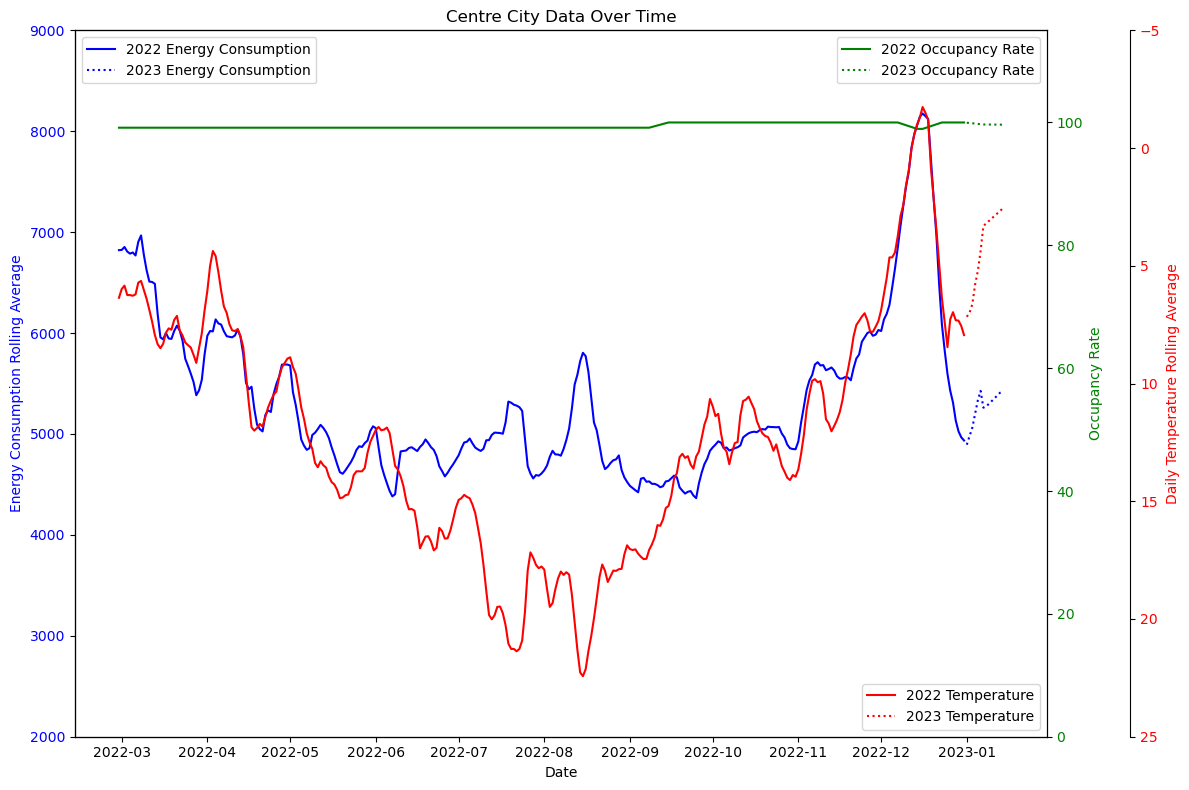

In [194]:
#Defining function to plot historical and predicted levels for CC

def plot_dataset(data, title):
    #Create a copy of the input DataFrame to prevent changes to the original
    data_copy = data.copy()

    #Convert 'Date' column to datetime if it's not already
    data_copy['Date'] = pd.to_datetime(data_copy['Date'])

    #Set 'Date' column as the index
    data_copy.set_index('Date', inplace=True)

    #Extracting relevant data and calculating rolling averages
    energy_consumption = data_copy['EnergyConsumption'].resample('D').sum().rolling(window=7).mean()
    occupancy_rate = data_copy['OccupancyPercentage'].resample('D').mean().rolling(window=7).mean()
    daily_temp_rolling_avg = data_copy['Average Temperature'].resample('D').mean().rolling(window=7).mean()


    #Separate the data for 2022 and 2023
    split_index = '2023-01-01'
    energy_2022, energy_2023 = energy_consumption[energy_consumption.index < split_index], energy_consumption[energy_consumption.index >= split_index]
    occupancy_2022, occupancy_2023 = occupancy_rate[occupancy_rate.index < split_index], occupancy_rate[occupancy_rate.index >= split_index]
    temp_2022, temp_2023 = daily_temp_rolling_avg[daily_temp_rolling_avg.index < split_index], daily_temp_rolling_avg[daily_temp_rolling_avg.index >= split_index]


    #Create the main plot with a larger figure size
    fig, ax1 = plt.subplots(figsize=(12, 8)) # Increase the size of the figure

    #Adjust the position of the axes to make room for the labels
    plt.subplots_adjust(right=0.75)

    #Plotting Energy Consumption Rolling Average
    ax1.plot(energy_2022.index, energy_2022, color='b', label='2022 Energy Consumption')
    ax1.plot(energy_2023.index, energy_2023, color='b', linestyle='dotted', label='2023 Energy Consumption')
    ax1.set_ylabel('Energy Consumption Rolling Average', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(2000, 9000)

    ax1.set_xlabel('Date')
    ax1.set_title(title)
    ax1.legend(loc='upper left')

    #Plotting Occupancy Rate
    ax2 = ax1.twinx()
    ax2.plot(occupancy_2022.index, occupancy_2022, color='g', label='2022 Occupancy Rate')
    ax2.plot(occupancy_2023.index, occupancy_2023, color='g', linestyle='dotted', label='2023 Occupancy Rate')
    ax2.set_ylabel('Occupancy Rate', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylim(0, 115)
    ax2.legend(loc='upper right')


    #Plotting Daily Temperature (7-day rolling average)
    ax3 = ax1.twinx()
    #Offset the third axis to prevent overlap
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(temp_2022.index, temp_2022, color='r', label='2022 Temperature')
    ax3.plot(temp_2023.index, temp_2023, color='r', linestyle='dotted', label='2023 Temperature')
    ax3.set_ylabel('Daily Temperature Rolling Average', color='r')
    ax3.tick_params(axis='y', labelcolor='r')
    ax3.set_ylim(-5, 25)

    ax3.invert_yaxis()
    ax3.legend(loc='lower right')

    plt.tight_layout()
    plt.savefig('53.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_dataset(CentreCity2023Data, 'Centre City Data Over Time')



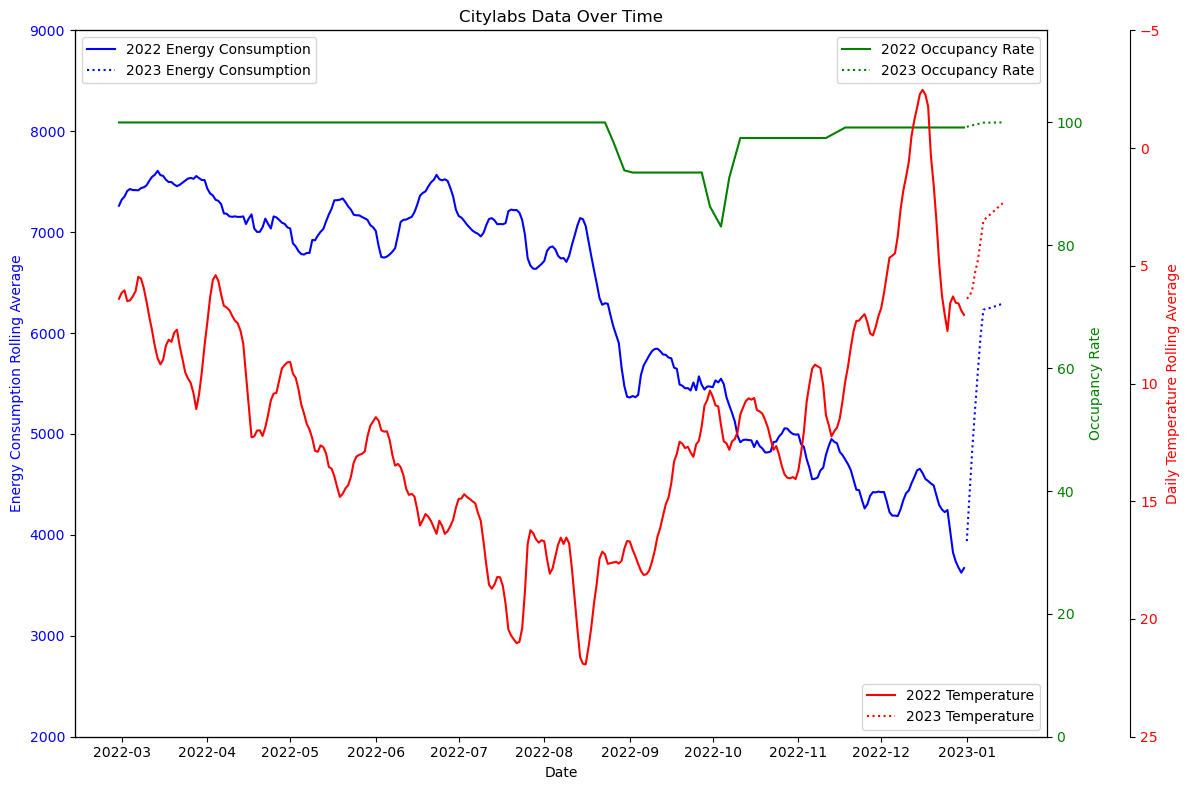

In [195]:
#Now for Cl

def plot_dataset(data, title):
    #Create a copy of the input DataFrame to prevent changes to the original
    data_copy = data.copy()

    #Convert 'Date' column to datetime if it's not already
    data_copy['Date'] = pd.to_datetime(data_copy['Date'])

    #Set 'Date' column as the index
    data_copy.set_index('Date', inplace=True)

    #Extracting relevant data and calculating rolling averages
    energy_consumption = data_copy['EnergyConsumption'].resample('D').sum().rolling(window=7).mean()
    occupancy_rate = data_copy['OccupancyPercentage'].resample('D').mean().rolling(window=7).mean()
    daily_temp_rolling_avg = data_copy['Average Temperature'].resample('D').mean().rolling(window=7).mean()


    #Separate the data for 2022 and 2023
    split_index = '2023-01-01'
    energy_2022, energy_2023 = energy_consumption[energy_consumption.index < split_index], energy_consumption[energy_consumption.index >= split_index]
    occupancy_2022, occupancy_2023 = occupancy_rate[occupancy_rate.index < split_index], occupancy_rate[occupancy_rate.index >= split_index]
    temp_2022, temp_2023 = daily_temp_rolling_avg[daily_temp_rolling_avg.index < split_index], daily_temp_rolling_avg[daily_temp_rolling_avg.index >= split_index]


    #Create the main plot with a larger figure size
    fig, ax1 = plt.subplots(figsize=(12, 8)) # Increase the size of the figure

    #Adjust the position of the axes to make room for the labels
    plt.subplots_adjust(right=0.75)

    #Plotting Energy Consumption Rolling Average
    ax1.plot(energy_2022.index, energy_2022, color='b', label='2022 Energy Consumption')
    ax1.plot(energy_2023.index, energy_2023, color='b', linestyle='dotted', label='2023 Energy Consumption')
    ax1.set_ylabel('Energy Consumption Rolling Average', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(2000, 9000)

    ax1.set_xlabel('Date')
    ax1.set_title(title)
    ax1.legend(loc='upper left')

    #Plotting Occupancy Rate
    ax2 = ax1.twinx()
    ax2.plot(occupancy_2022.index, occupancy_2022, color='g', label='2022 Occupancy Rate')
    ax2.plot(occupancy_2023.index, occupancy_2023, color='g', linestyle='dotted', label='2023 Occupancy Rate')
    ax2.set_ylabel('Occupancy Rate', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylim(0, 115)
    ax2.legend(loc='upper right')


    #Plotting Daily Temperature (7-day rolling average)
    ax3 = ax1.twinx()
    #Offset the third axis to prevent overlap
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(temp_2022.index, temp_2022, color='r', label='2022 Temperature')
    ax3.plot(temp_2023.index, temp_2023, color='r', linestyle='dotted', label='2023 Temperature')
    ax3.set_ylabel('Daily Temperature Rolling Average', color='r')
    ax3.tick_params(axis='y', labelcolor='r')
    ax3.set_ylim(-5, 25)

    ax3.invert_yaxis()
    ax3.legend(loc='lower right')

    plt.tight_layout()
    plt.savefig('54.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_dataset(Citylabs2023Data, 'Citylabs Data Over Time')

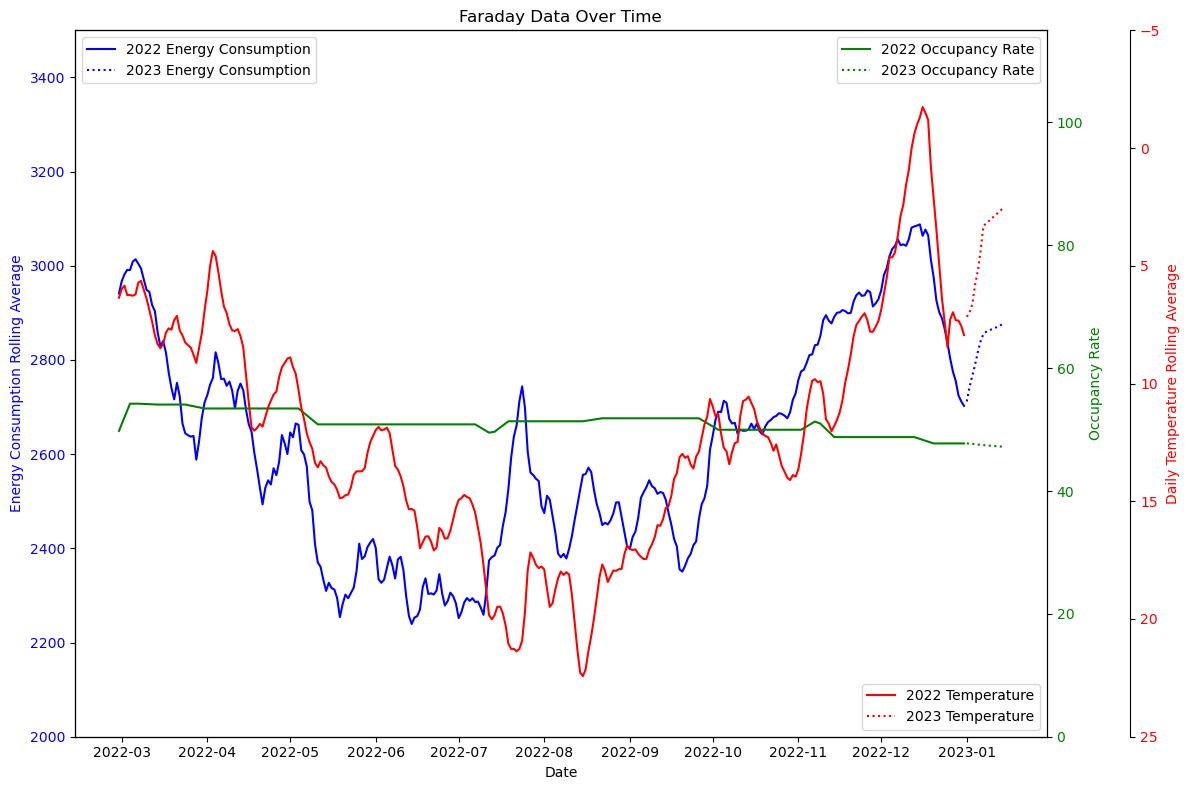

In [196]:
#Now for F

def plot_dataset(data, title):
    #Create a copy of the input DataFrame to prevent changes to the original
    data_copy = data.copy()

    #Convert 'Date' column to datetime if it's not already
    data_copy['Date'] = pd.to_datetime(data_copy['Date'])

    #Set 'Date' column as the index
    data_copy.set_index('Date', inplace=True)

    #Extracting relevant data and calculating rolling averages
    energy_consumption = data_copy['EnergyConsumption'].resample('D').sum().rolling(window=7).mean()
    occupancy_rate = data_copy['OccupancyPercentage'].resample('D').mean().rolling(window=7).mean()
    daily_temp_rolling_avg = data_copy['Average Temperature'].resample('D').mean().rolling(window=7).mean()


    #Separate the data for 2022 and 2023
    split_index = '2023-01-01'
    energy_2022, energy_2023 = energy_consumption[energy_consumption.index < split_index], energy_consumption[energy_consumption.index >= split_index]
    occupancy_2022, occupancy_2023 = occupancy_rate[occupancy_rate.index < split_index], occupancy_rate[occupancy_rate.index >= split_index]
    temp_2022, temp_2023 = daily_temp_rolling_avg[daily_temp_rolling_avg.index < split_index], daily_temp_rolling_avg[daily_temp_rolling_avg.index >= split_index]


    #Create the main plot with a larger figure size
    fig, ax1 = plt.subplots(figsize=(12, 8)) # Increase the size of the figure

    #Adjust the position of the axes to make room for the labels
    plt.subplots_adjust(right=0.75)

    #Plotting Energy Consumption Rolling Average
    ax1.plot(energy_2022.index, energy_2022, color='b', label='2022 Energy Consumption')
    ax1.plot(energy_2023.index, energy_2023, color='b', linestyle='dotted', label='2023 Energy Consumption')
    ax1.set_ylabel('Energy Consumption Rolling Average', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(2000, 3500)

    ax1.set_xlabel('Date')
    ax1.set_title(title)
    ax1.legend(loc='upper left')

    #Plotting Occupancy Rate
    ax2 = ax1.twinx()
    ax2.plot(occupancy_2022.index, occupancy_2022, color='g', label='2022 Occupancy Rate')
    ax2.plot(occupancy_2023.index, occupancy_2023, color='g', linestyle='dotted', label='2023 Occupancy Rate')
    ax2.set_ylabel('Occupancy Rate', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylim(0, 115)
    ax2.legend(loc='upper right')


    #Plotting Daily Temperature (7-day rolling average)
    ax3 = ax1.twinx()
    #Offset the third axis to prevent overlap
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(temp_2022.index, temp_2022, color='r', label='2022 Temperature')
    ax3.plot(temp_2023.index, temp_2023, color='r', linestyle='dotted', label='2023 Temperature')
    ax3.set_ylabel('Daily Temperature Rolling Average', color='r')
    ax3.tick_params(axis='y', labelcolor='r')
    ax3.set_ylim(-5, 25)

    ax3.invert_yaxis()
    ax3.legend(loc='lower right')

    plt.tight_layout()
    plt.savefig('55.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_dataset(Faraday2023Data, 'Faraday Data Over Time')

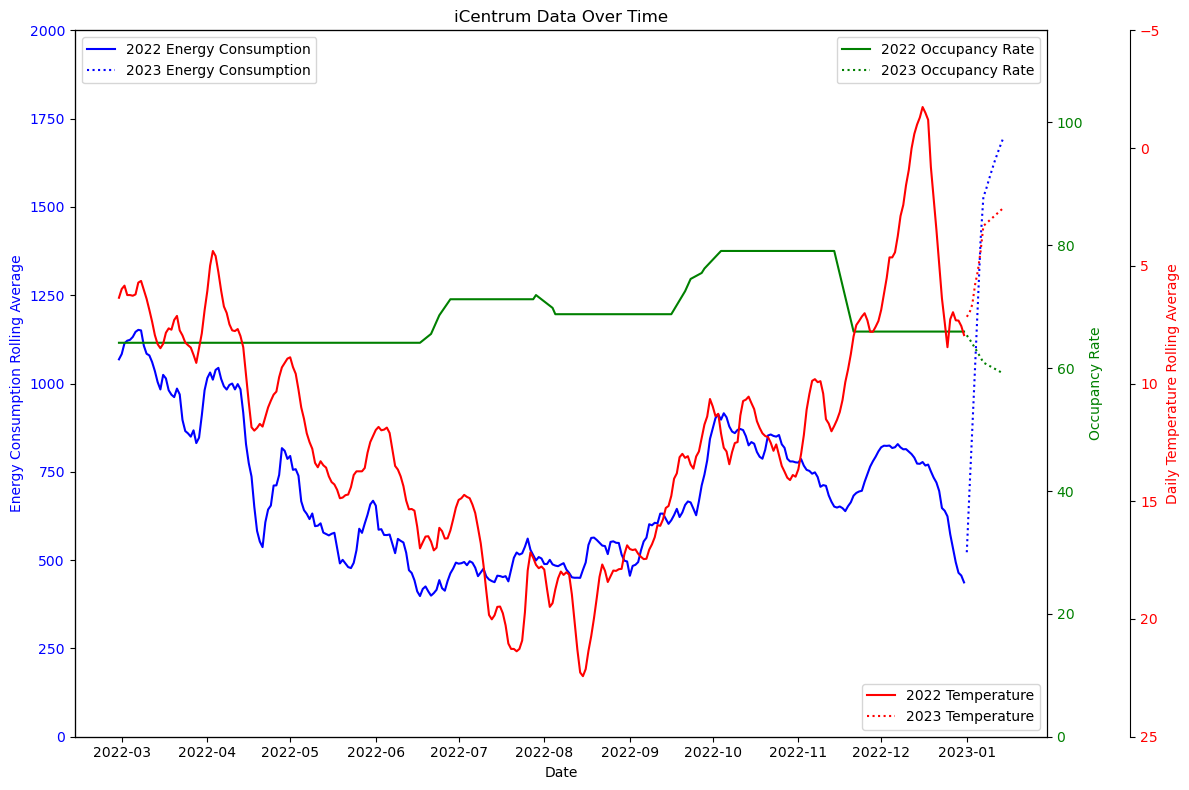

In [197]:
#Now for iC

def plot_dataset(data, title):
    #Create a copy of the input DataFrame to prevent changes to the original
    data_copy = data.copy()

    #Convert 'Date' column to datetime if it's not already
    data_copy['Date'] = pd.to_datetime(data_copy['Date'])

    #Set 'Date' column as the index
    data_copy.set_index('Date', inplace=True)

    #Extracting relevant data and calculating rolling averages
    energy_consumption = data_copy['EnergyConsumption'].resample('D').sum().rolling(window=7).mean()
    occupancy_rate = data_copy['OccupancyPercentage'].resample('D').mean().rolling(window=7).mean()
    daily_temp_rolling_avg = data_copy['Average Temperature'].resample('D').mean().rolling(window=7).mean()


    #Separate the data for 2022 and 2023
    split_index = '2023-01-01'
    energy_2022, energy_2023 = energy_consumption[energy_consumption.index < split_index], energy_consumption[energy_consumption.index >= split_index]
    occupancy_2022, occupancy_2023 = occupancy_rate[occupancy_rate.index < split_index], occupancy_rate[occupancy_rate.index >= split_index]
    temp_2022, temp_2023 = daily_temp_rolling_avg[daily_temp_rolling_avg.index < split_index], daily_temp_rolling_avg[daily_temp_rolling_avg.index >= split_index]


    #Create the main plot with a larger figure size
    fig, ax1 = plt.subplots(figsize=(12, 8)) # Increase the size of the figure

    #Adjust the position of the axes to make room for the labels
    plt.subplots_adjust(right=0.75)

    #Plotting Energy Consumption Rolling Average
    ax1.plot(energy_2022.index, energy_2022, color='b', label='2022 Energy Consumption')
    ax1.plot(energy_2023.index, energy_2023, color='b', linestyle='dotted', label='2023 Energy Consumption')
    ax1.set_ylabel('Energy Consumption Rolling Average', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(0, 2000)

    ax1.set_xlabel('Date')
    ax1.set_title(title)
    ax1.legend(loc='upper left')

    #Plotting Occupancy Rate
    ax2 = ax1.twinx()
    ax2.plot(occupancy_2022.index, occupancy_2022, color='g', label='2022 Occupancy Rate')
    ax2.plot(occupancy_2023.index, occupancy_2023, color='g', linestyle='dotted', label='2023 Occupancy Rate')
    ax2.set_ylabel('Occupancy Rate', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylim(0, 115)
    ax2.legend(loc='upper right')


    #Plotting Daily Temperature (7-day rolling average)
    ax3 = ax1.twinx()
    #Offset the third axis to prevent overlap
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(temp_2022.index, temp_2022, color='r', label='2022 Temperature')
    ax3.plot(temp_2023.index, temp_2023, color='r', linestyle='dotted', label='2023 Temperature')
    ax3.set_ylabel('Daily Temperature Rolling Average', color='r')
    ax3.tick_params(axis='y', labelcolor='r')
    ax3.set_ylim(-5, 25)

    ax3.invert_yaxis()
    ax3.legend(loc='lower right')

    plt.tight_layout()
    plt.savefig('56.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_dataset(iCentrum2023Data, 'iCentrum Data Over Time')

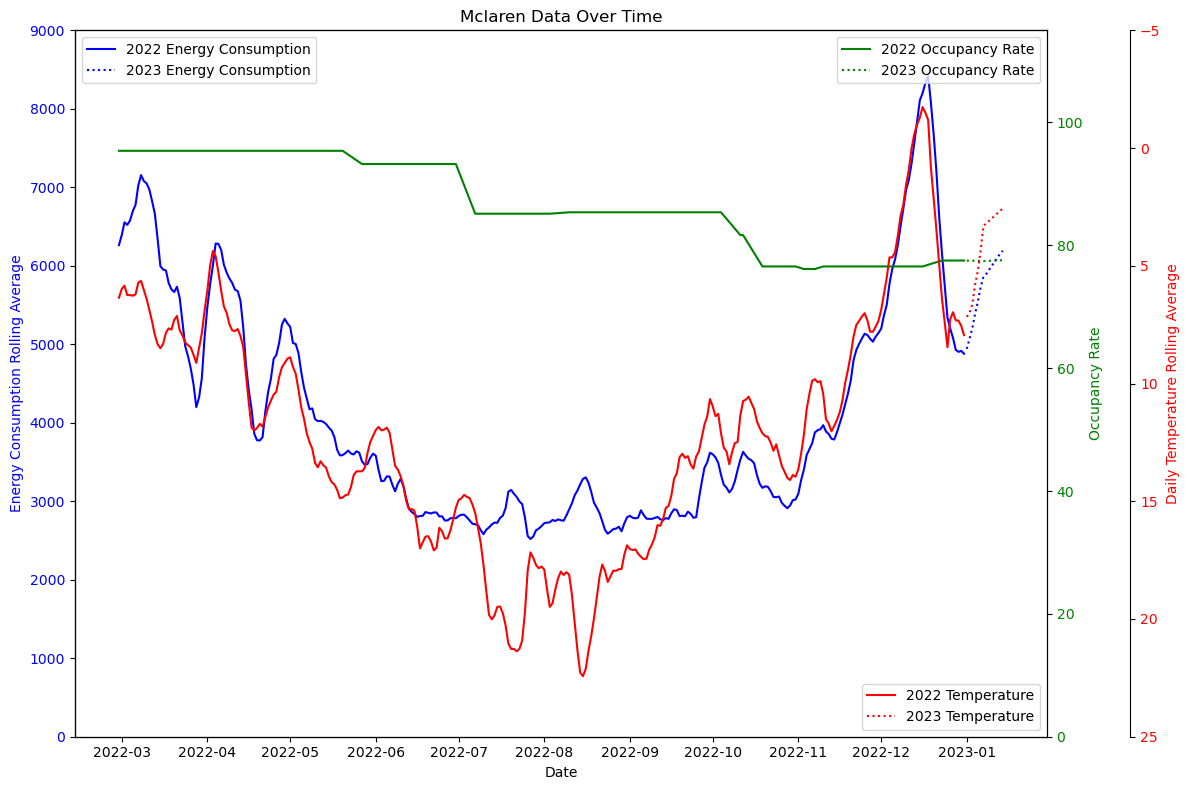

In [198]:
#Finally for Mc

def plot_dataset(data, title):
    #Create a copy of the input DataFrame to prevent changes to the original
    data_copy = data.copy()

    #Convert 'Date' column to datetime if it's not already
    data_copy['Date'] = pd.to_datetime(data_copy['Date'])

    #Set 'Date' column as the index
    data_copy.set_index('Date', inplace=True)

    #Extracting relevant data and calculating rolling averages
    energy_consumption = data_copy['EnergyConsumption'].resample('D').sum().rolling(window=7).mean()
    occupancy_rate = data_copy['OccupancyPercentage'].resample('D').mean().rolling(window=7).mean()
    daily_temp_rolling_avg = data_copy['Average Temperature'].resample('D').mean().rolling(window=7).mean()


    #Separate the data for 2022 and 2023
    split_index = '2023-01-01'
    energy_2022, energy_2023 = energy_consumption[energy_consumption.index < split_index], energy_consumption[energy_consumption.index >= split_index]
    occupancy_2022, occupancy_2023 = occupancy_rate[occupancy_rate.index < split_index], occupancy_rate[occupancy_rate.index >= split_index]
    temp_2022, temp_2023 = daily_temp_rolling_avg[daily_temp_rolling_avg.index < split_index], daily_temp_rolling_avg[daily_temp_rolling_avg.index >= split_index]


    #Create the main plot with a larger figure size
    fig, ax1 = plt.subplots(figsize=(12, 8)) # Increase the size of the figure

    #Adjust the position of the axes to make room for the labels
    plt.subplots_adjust(right=0.75)

    #Plotting Energy Consumption Rolling Average
    ax1.plot(energy_2022.index, energy_2022, color='b', label='2022 Energy Consumption')
    ax1.plot(energy_2023.index, energy_2023, color='b', linestyle='dotted', label='2023 Energy Consumption')
    ax1.set_ylabel('Energy Consumption Rolling Average', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(0, 9000)

    ax1.set_xlabel('Date')
    ax1.set_title(title)
    ax1.legend(loc='upper left')

    #Plotting Occupancy Rate
    ax2 = ax1.twinx()
    ax2.plot(occupancy_2022.index, occupancy_2022, color='g', label='2022 Occupancy Rate')
    ax2.plot(occupancy_2023.index, occupancy_2023, color='g', linestyle='dotted', label='2023 Occupancy Rate')
    ax2.set_ylabel('Occupancy Rate', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylim(0, 115)
    ax2.legend(loc='upper right')


    #Plotting Daily Temperature (7-day rolling average)
    ax3 = ax1.twinx()
    #Offset the third axis to prevent overlap
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(temp_2022.index, temp_2022, color='r', label='2022 Temperature')
    ax3.plot(temp_2023.index, temp_2023, color='r', linestyle='dotted', label='2023 Temperature')
    ax3.set_ylabel('Daily Temperature Rolling Average', color='r')
    ax3.tick_params(axis='y', labelcolor='r')
    ax3.set_ylim(-5, 25)

    ax3.invert_yaxis()
    ax3.legend(loc='lower right')

    plt.tight_layout()
    plt.savefig('57.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_dataset(Mclaren2023Data, 'Mclaren Data Over Time')

In [199]:
#Define a function to filter data for 2023, so we have just our predictions
def filter_2023(data):
    data['Date'] = pd.to_datetime(data['Date'])
    return data[data['Date'].dt.year == 2023]

#Apply the filter to each DataFrame
CentreCityONLY2023Data = filter_2023(CentreCity2023Data)
CitylabsONLY2023Data = filter_2023(Citylabs2023Data)
FaradayONLY2023Data = filter_2023(Faraday2023Data)
iCentrumONLY2023Data = filter_2023(iCentrum2023Data)
MclarenONLY2023Data = filter_2023(Mclaren2023Data)


# Calculating Energy Prices

In [200]:
#Reshape the data for easier calculation of the total energy used

def reshape_dataframe(df):
    #Melt the dataframe
    df_melted = pd.melt(df, 
                        id_vars=['Site', 'Date', 'DayOfWeek', 'Total', 'TotalOfficeSize', 'TotalOccupiedOfficeSize', 'OccupancyPercentage', 'tavg'], 
                        value_vars=[f'{hour:02}:{minute:02}' for hour in range(24) for minute in [0, 30]], 
                        var_name='Time', 
                        value_name='EnergyConsumption')

    #Sorting by date and time
    df_melted['Date'] = pd.to_datetime(df_melted['Date'])
    df_melted['Time'] = pd.to_datetime(df_melted['Time'], format='%H:%M').dt.time
    df_melted = df_melted.sort_values(by=['Date', 'Time']).reset_index(drop=True)

    return df_melted

dataframe_names_2022 = ['CentreCity2022Data', 'Citylabs2022Data', 'Faraday2022Data', 'iCentrum2022Data', 'Mclaren2022Data']

#Apply the reshape function to each dataframe
for name in dataframe_names_2022:
    globals()[name] = reshape_dataframe(globals()[name])

#Initialize variable to hold the total consumption for 2022
Total2022Consumption = 0

#Loop through each dataframe and sum the EnergyConsumption column
for name in dataframe_names_2022:
    Total2022Consumption += globals()[name]['EnergyConsumption'].sum()

#Print the total consumption for 2022
print("2022 Consumption:", Total2022Consumption)


2022 Consumption: 7202377.161452299


In [201]:
#Calculate 2022TotalCost using the given formula
Total2022Cost = (0.8 * 365 * 5) + (0.38 * Total2022Consumption)

#Print the result
print("2022 Total Cost:", Total2022Cost)

2022 Total Cost: 2738363.3213518737


In [202]:
#Calculate the static price
StaticPricePerkWh = Total2022Cost/Total2022Consumption
print("Static: The Price per kWh:", StaticPricePerkWh)

Static: The Price per kWh: 0.3802027108504973


In [203]:
#Finding the maximum of the EnergyConsumption column for each dataframe
max_centre_city = CentreCity2022Data['EnergyConsumption'].max()
max_citylabs = Citylabs2022Data['EnergyConsumption'].max()
max_faraday = Faraday2022Data['EnergyConsumption'].max()
max_icentrum = iCentrum2022Data['EnergyConsumption'].max()
max_mclaren = Mclaren2022Data['EnergyConsumption'].max()

#Calculating the average of the maximum values
AveragePeakLoad = (max_centre_city + max_citylabs + max_faraday + max_icentrum + max_mclaren) / 5

print("Average Peak Load:", AveragePeakLoad)


Average Peak Load: 199.08


In [204]:
#Calculating the General plan prices
GeneralPricePerkWh = Total2022Cost / ((11497*12*5)+(6393*199.08*5)+Total2022Consumption)

CostPerMonth = 11497*GeneralPricePerkWh
MultiplyByPeakUsage = 6393*GeneralPricePerkWh
GeneralPricePerkWh = GeneralPricePerkWh

print("General: Cost for each Month:", CostPerMonth)
print("General: To Multiply by Peak Usage:", MultiplyByPeakUsage)
print("General: The Price per kWh:", GeneralPricePerkWh)

General: Cost for each Month: 2208.433521802204
General: To Multiply by Peak Usage: 1228.0173527773757
General: The Price per kWh: 0.19208780741082054


In [205]:
from datetime import time

#Initialize variables to hold the total off-peak and on-peak consumption
OffPeakConsumption2022 = 0
PeakConsumption2022 = 0

#Loop through each dataframe
for name in dataframe_names_2022:
    df = globals()[name]
    
    #Filter off-peak times (21:00 to 6:30)
    off_peak_consumption = df[(df['Time'] >= time(21, 0)) | (df['Time'] <= time(6, 30))]['EnergyConsumption'].sum()
    OffPeakConsumption2022 += off_peak_consumption

    #Filter on-peak times (7:00 to 20:30)
    on_peak_consumption = df[(df['Time'] >= time(7, 0)) & (df['Time'] <= time(20, 30))]['EnergyConsumption'].sum()
    PeakConsumption2022 += on_peak_consumption

#Print the total off-peak and on-peak consumption
print("Off-Peak Consumption:", OffPeakConsumption2022)
print("On-Peak Consumption:", PeakConsumption2022)


Off-Peak Consumption: 2523692.935294118
On-Peak Consumption: 4678684.226158181


In [206]:
#Calculate PeakPrice using the given formula
PeakPrice = Total2022Cost / ((365*5) + (0.25 * OffPeakConsumption2022) + PeakConsumption2022)

OffPeakPrice = 0.25*PeakPrice

#Print the results
print("Peak Price:", PeakPrice)
print("Off Peak Price:", OffPeakPrice)





Peak Price: 0.5155602263577127
Off Peak Price: 0.12889005658942818


In [207]:
#Calculating the cost of the first 2 weeks in 2023 with the Current plan

def CurrentPlan2023Cost(ONLY2023Data, building_name):
    #Calculate the sum of the EnergyConsumption column for the first 14 days
    energy_consumption_sum = ONLY2023Data['EnergyConsumption'].sum()

    #Calculate the cost using the given formula
    total_cost = (energy_consumption_sum * 0.38) + (14 * 0.8)

    print(f"The total cost for the first 14 days of 2023 with the current plan is {total_cost} for {building_name}.")

CurrentPlan2023Cost(CentreCityONLY2023Data, 'CentreCity')
CurrentPlan2023Cost(CitylabsONLY2023Data, 'Citylabs')
CurrentPlan2023Cost(FaradayONLY2023Data, 'Faraday')
CurrentPlan2023Cost(iCentrumONLY2023Data, 'iCentrum')
CurrentPlan2023Cost(MclarenONLY2023Data, 'Mclaren')

The total cost for the first 14 days of 2023 with the current plan is 28422.41859163182 for CentreCity.
The total cost for the first 14 days of 2023 with the current plan is 33328.955599298184 for Citylabs.
The total cost for the first 14 days of 2023 with the current plan is 15259.05538231298 for Faraday.
The total cost for the first 14 days of 2023 with the current plan is 8572.971758279306 for iCentrum.
The total cost for the first 14 days of 2023 with the current plan is 32054.54156593016 for Mclaren.


In [208]:
#This for the Static plan

def StaticPlan2023Cost(ONLY2023Data, building_name):
    #Calculate the sum of the EnergyConsumption column for the first 14 days
    energy_consumption_sum = ONLY2023Data['EnergyConsumption'].sum()

    #Multiply by the given value
    total_cost = energy_consumption_sum * 0.3802027108504973

    print(f"The total cost for the first 14 days of 2023 with the static plan is {total_cost} for {building_name}.")


StaticPlan2023Cost(CentreCityONLY2023Data, 'CentreCity')
StaticPlan2023Cost(CitylabsONLY2023Data, 'Citylabs')
StaticPlan2023Cost(FaradayONLY2023Data, 'Faraday')
StaticPlan2023Cost(iCentrumONLY2023Data, 'iCentrum')
StaticPlan2023Cost(MclarenONLY2023Data, 'Mclaren')


The total cost for the first 14 days of 2023 with the static plan is 28426.37454501175 for CentreCity.
The total cost for the first 14 days of 2023 with the static plan is 33335.52894291449 for Citylabs.
The total cost for the first 14 days of 2023 with the static plan is 15255.989344767737 for Faraday.
The total cost for the first 14 days of 2023 with the static plan is 8566.339032055317 for iCentrum.
The total cost for the first 14 days of 2023 with the static plan is 32060.435073881752 for Mclaren.


In [209]:
#This for the General plan

def GeneralLoadPlan2023Cost(ONLY2023Data, building_name):
    #Get the maximum value in the EnergyConsumption column
    max_energy_consumption = ONLY2023Data['EnergyConsumption'].max()

    #Get the total sum of the EnergyConsumption column
    total_energy_consumption = ONLY2023Data['EnergyConsumption'].sum()

    #Calculate the cost using the given formula
    total_cost = ((14 / 31) * 2208.433521802204) + (1228.0173527773757 * max_energy_consumption*14/365) + (0.19208780741082054 * total_energy_consumption)

    #Print the result and the maximum value
    print(f"The maximum energy consumption for {building_name} is {max_energy_consumption}.")
    print(f"The total cost for the first 14 days of 2023 with the peak load plan is {total_cost} for {building_name}.")

GeneralLoadPlan2023Cost(CentreCityONLY2023Data, 'CentreCity')
GeneralLoadPlan2023Cost(CitylabsONLY2023Data, 'Citylabs')
GeneralLoadPlan2023Cost(FaradayONLY2023Data, 'Faraday')
GeneralLoadPlan2023Cost(iCentrumONLY2023Data, 'iCentrum')
GeneralLoadPlan2023Cost(MclarenONLY2023Data, 'Mclaren')

#We do 14/365 because this is assumed to be a yearly cost, and we are absorbing it in only 2 weeks. This may also be why it is cheaper, since it has only had 2 weeks to get a peak load


The maximum energy consumption for CentreCity is 210.854133308185.
The total cost for the first 14 days of 2023 with the peak load plan is 25290.723002159208 for CentreCity.
The maximum energy consumption for Citylabs is 174.08303646488406.
The total cost for the first 14 days of 2023 with the peak load plan is 26038.955641944136 for Citylabs.
The maximum energy consumption for Faraday is 72.75025143708321.
The total cost for the first 14 days of 2023 with the peak load plan is 12131.744912542934 for Faraday.
The maximum energy consumption for iCentrum is 49.59058031296473.
The total cost for the first 14 days of 2023 with the peak load plan is 7661.100568830736 for iCentrum.
The maximum energy consumption for Mclaren is 204.63620952051667.
The total cost for the first 14 days of 2023 with the peak load plan is 26833.863341754975 for Mclaren.


In [210]:
#Finally, for the Peak/Off-Peak plan

def PeakTimesPlan2023Cost(dataframe, location_description):
    #Define peak time columns
    peak_time_columns = [
        'TimeOfDay_07:00', 'TimeOfDay_07:30', 'TimeOfDay_08:00', 'TimeOfDay_08:30',
        'TimeOfDay_09:00', 'TimeOfDay_09:30', 'TimeOfDay_10:00', 'TimeOfDay_10:30',
        'TimeOfDay_11:00', 'TimeOfDay_11:30', 'TimeOfDay_12:00', 'TimeOfDay_12:30',
        'TimeOfDay_13:00', 'TimeOfDay_13:30', 'TimeOfDay_14:00', 'TimeOfDay_14:30',
        'TimeOfDay_15:00', 'TimeOfDay_15:30', 'TimeOfDay_16:00', 'TimeOfDay_16:30',
        'TimeOfDay_17:00', 'TimeOfDay_17:30', 'TimeOfDay_18:00', 'TimeOfDay_18:30',
        'TimeOfDay_19:00', 'TimeOfDay_19:30', 'TimeOfDay_20:00', 'TimeOfDay_20:30'
    ]

     #Initialize variables to hold the total off-peak and on-peak consumption
    OffPeakConsumption2023 = 0
    PeakConsumption2023 = 0

    #Iterate through the rows of the dataframe
    for index, row in dataframe.iterrows():
        if any(row[col] == 1 for col in peak_time_columns):
            PeakConsumption2023 += row['EnergyConsumption']
        else:
            OffPeakConsumption2023 += row['EnergyConsumption']

    #Calculate the cost
    OffPeakCost = OffPeakConsumption2023 * OffPeakPrice
    PeakCost = PeakConsumption2023 * PeakPrice
    TotalCost = OffPeakCost + PeakCost

    print(f"The total cost for the first 14 days of 2023 with the peak times plan is {TotalCost} for {location_description}.")


#Call the function with appropriate descriptions
PeakTimesPlan2023Cost(CentreCityONLY2023Data, "CentreCity")
PeakTimesPlan2023Cost(CitylabsONLY2023Data, "Citylabs")
PeakTimesPlan2023Cost(FaradayONLY2023Data, "Faraday")
PeakTimesPlan2023Cost(iCentrumONLY2023Data, "iCentrum")
PeakTimesPlan2023Cost(MclarenONLY2023Data, "Mclaren")

The total cost for the first 14 days of 2023 with the peak times plan is 30002.19058236254 for CentreCity.
The total cost for the first 14 days of 2023 with the peak times plan is 32874.97564628869 for Citylabs.
The total cost for the first 14 days of 2023 with the peak times plan is 14708.147629750552 for Faraday.
The total cost for the first 14 days of 2023 with the peak times plan is 8287.373370418458 for iCentrum.
The total cost for the first 14 days of 2023 with the peak times plan is 32486.760712395502 for Mclaren.
